In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
%matplotlib inline

In [88]:
train = pd.read_csv("data/train_NIR5Yl1.csv")

In [89]:
test = pd.read_csv("data/test_8i3B3FC.csv")

In [90]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [91]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [93]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [94]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [95]:
[train.ID.unique().size, 
train.Tag.unique().size, 
train.Reputation.unique().size, 
train.Answers.unique().size, 
train.Username.unique().size,
train.Views.unique().size]

[330045, 10, 16527, 63, 141802, 82137]

In [96]:
train['Upvotes'].values

array([  42., 1175.,   60., ...,   15.,    3.,   37.])

In [97]:
test['Upvotes'] = 0

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
test.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,141448.000000,1.414480e+05,141448.000000,141448.000000,1.414480e+05,141448.0
mean,235743.073497,7.920927e+03,3.914873,81348.231117,2.984633e+04,0.0
std,136269.867118,2.791072e+04,3.577460,49046.098215,8.034374e+04,0.0
min,7.000000,0.000000e+00,0.000000,4.000000,9.000000e+00,0.0
25%,117797.000000,2.860000e+02,2.000000,40222.750000,2.608000e+03,0.0
50%,235830.000000,1.245000e+03,3.000000,78795.500000,8.977000e+03,0.0
75%,353616.000000,5.123000e+03,5.000000,122149.000000,2.698925e+04,0.0
max,471488.000000,1.042428e+06,73.000000,175737.000000,5.004669e+06,0.0


In [100]:
[test.ID.unique().size, 
test.Tag.unique().size, 
test.Reputation.unique().size, 
test.Answers.unique().size, 
test.Username.unique().size,
test.Views.unique().size]

[141448, 10, 14098, 58, 79351, 52807]

In [101]:
train['type'] = "train"
test["Upvotes"] = 0
test["type"] = "test"
final_df = pd.concat([train,test],axis=0)

In [102]:
# count of Questions posted by user
calc_usercount = final_df.groupby(['Username'], axis=0).agg({"ID":"count"}).reset_index()
calc_usercount.columns = ['Username', 'Count_occ']
final_df = final_df.merge(calc_usercount,on='Username',how='left')

In [104]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.50)

def q3(x):
    return x.quantile(0.75)

def q4(x):
    return x.quantile(0.95)

In [107]:
tag_counts = final_df.groupby(['Tag'], axis=0).agg({"ID":"count", "Username":pd.Series.nunique}).reset_index()
tag_counts.columns = ['Tag', 'Questions_count', 'User_count' ]
final_df = final_df.merge(tag_counts,on='Tag',how='left')

In [109]:
tag_counts

,Tag,Questions_count,User_count
0,a,45253,28814
1,c,103251,54282
2,h,29346,20805
3,i,46500,22639
4,j,103043,56717
5,o,20842,11316
6,p,62120,36731
7,r,17755,8662
8,s,33411,22207
9,x,9972,8291


In [119]:
final_df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,type,Count_occ,Questions_count,User_count,Views_mean,Views_std,Views_25,Views_50,Views_75,Views_95,Reputation_mean,Reputation_std,Reputation_25,Reputation_50,Reputation_75,Reputation_95,Answers_mean,Answers_std,Answers_25,Answers_50,Answers_75,Answers_95
0,52664,a,3942.0,2.0,155623,7855.0,42.0,train,27,45253,28814,31039.037037,50226.243992,3265.5,9822.0,24341.50,159059.50,3942.0,0.0,3942.0,3942.0,3942.0,3942.0,3.740741,1.913366,2.0,3.0,5.50,7.00
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,train,3,45253,28814,40739.333333,26085.839882,33208.5,55799.0,55800.00,55800.80,26046.0,0.0,26046.0,26046.0,26046.0,26046.0,8.666667,5.773503,7.0,12.0,12.00,12.00
2,468453,c,1358.0,4.0,56177,8067.0,60.0,train,1,103251,54282,8067.000000,NaN,8067.0,8067.0,8067.00,8067.00,1358.0,NaN,1358.0,1358.0,1358.0,1358.0,4.000000,NaN,4.0,4.0,4.00,4.00
3,96996,a,264.0,3.0,168793,27064.0,9.0,train,3,45253,28814,19551.333333,13012.320367,15795.0,27064.0,27064.00,27064.00,264.0,0.0,264.0,264.0,264.0,264.0,2.666667,0.577350,2.5,3.0,3.00,3.00
4,131465,c,4271.0,4.0,112223,13986.0,83.0,train,4,103251,54282,16794.250000,17492.991385,5457.5,9734.5,21071.25,38075.85,4271.0,0.0,4271.0,4271.0,4271.0,4271.0,2.750000,2.061553,1.0,2.5,4.25,4.85


In [112]:
f = {'Views': ['mean', 'std', q1, q2, q3, q4] }
Views_metric = final_df.groupby('Username').agg(f)
Views_metric = Views_metric.Views.rename_axis([None], axis=1).reset_index()
Views_metric.columns = ['Username','Views_mean', 'Views_std', 'Views_25', 'Views_50', 'Views_75', 'Views_95']

In [113]:
Views_metric.head()

,Username,Views_mean,Views_std,Views_25,Views_50,Views_75,Views_95
0,0,37491.0,NaN,37491.0,37491.0,37491.0,37491.0
1,1,1215345.0,NaN,1215345.0,1215345.0,1215345.0,1215345.0
2,2,27153.0,NaN,27153.0,27153.0,27153.0,27153.0
3,3,23464.0,NaN,23464.0,23464.0,23464.0,23464.0
4,4,1061.0,NaN,1061.0,1061.0,1061.0,1061.0


In [114]:
g = {'Reputation': ['mean', 'std', q1, q2, q3, q4] }
Reputation_metric = final_df.groupby('Username').agg(g)
Reputation_metric = Reputation_metric.Reputation.rename_axis([None], axis=1).reset_index()
Reputation_metric.columns = ['Username','Reputation_mean', 'Reputation_std', 'Reputation_25', 'Reputation_50', 'Reputation_75', 'Reputation_95']

In [115]:
h = {'Answers': ['mean', 'std', q1, q2, q3, q4] }
Answers_metric = final_df.groupby('Username').agg(h)
Answers_metric = Answers_metric.Answers.rename_axis([None], axis=1).reset_index()
Answers_metric.columns = ['Username','Answers_mean', 'Answers_std', 'Answers_25', 'Answers_50', 'Answers_75', 'Answers_95']

In [116]:
final_df = final_df.merge(Views_metric,on=['Username'],how='left')
final_df = final_df.merge(Reputation_metric,on=['Username'],how='left')
final_df = final_df.merge(Answers_metric,on=['Username'],how='left')

In [117]:
a = {'Views': ['mean', 'std', q1, q2, q3, q4] }
Views_metric_tag = final_df.groupby('Tag').agg(a)
Views_metric_tag = Views_metric_tag.Views.rename_axis([None], axis=1).reset_index()
Views_metric_tag.columns = ['Tag','Views_mean_tag', 'Views_std_tag', 'Views_25_tag', 'Views_50_tag', 'Views_75_tag', 'Views_95_tag']

In [120]:
b = {'Reputation': ['mean', 'std', q1, q2, q3, q4] }
Reputation_metric_tag = final_df.groupby('Tag').agg(b)
Reputation_metric_tag = Reputation_metric_tag.Reputation.rename_axis([None], axis=1).reset_index()
Reputation_metric_tag.columns = ['Tag','Reputation_mean_tag', 'Reputation_std_tag', 'Reputation_25_tag', 'Reputation_50_tag', 'Reputation_75_tag', 'Reputation_95_tag']

In [121]:
c = {'Answers': ['mean', 'std', q1, q2, q3, q4] }
Answers_metric_tag = final_df.groupby('Tag').agg(c)
Answers_metric_tag = Answers_metric_tag.Answers.rename_axis([None], axis=1).reset_index()
Answers_metric_tag.columns = ['Tag','Answers_mean_tag', 'Answers_std_tag', 'Answers_25_tag', 'Answers_50_tag', 'Answers_75_tag', 'Answers_95_tag']

In [122]:
final_df = final_df.merge(Views_metric_tag,on=['Tag'],how='left')
final_df = final_df.merge(Reputation_metric_tag,on=['Tag'],how='left')
final_df = final_df.merge(Answers_metric_tag,on=['Tag'],how='left')

In [123]:
final_df = final_df.fillna(value=0)

In [124]:
final_df['Is_Old_User'] = final_df.apply(lambda row: 1 if row['Count_occ'] > 1 else 0, axis=1)

In [134]:
lbl = LabelEncoder()
fitted = lbl.fit(final_df['Tag']) 
final_df['Tag'] = fitted.transform(final_df['Tag'])

In [135]:
final_df['Tag'] = final_df['Tag'].astype('category')

In [176]:
final_df = pd.get_dummies(final_df, columns=['Tag'], drop_first=True)

In [177]:
final_df.head()

,ID,Reputation,Answers,Username,Views,Upvotes,type,Count_occ,Questions_count,User_count,Views_mean,Views_std,Views_25,Views_50,Views_75,Views_95,Reputation_mean,Reputation_std,Reputation_25,Reputation_50,Reputation_75,Reputation_95,Answers_mean,Answers_std,Answers_25,Answers_50,Answers_75,Answers_95,Views_mean_tag,Views_std_tag,Views_25_tag,Views_50_tag,Views_75_tag,Views_95_tag,Reputation_mean_tag,Reputation_std_tag,Reputation_25_tag,Reputation_50_tag,Reputation_75_tag,Reputation_95_tag,Answers_mean_tag,Answers_std_tag,Answers_25_tag,Answers_50_tag,Answers_75_tag,Answers_95_tag,Is_Old_User,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9
0,52664,3942.0,2.0,155623,7855.0,42.0,train,27,45253,28814,31039.037037,50226.243992,3265.5,9822.0,24341.50,159059.50,3942.0,0.0,3942.0,3942.0,3942.0,3942.0,3.740741,1.913366,2.0,3.0,5.50,7.00,32155.024683,76836.852547,4416.0,12862.0,32535.0,118584.0,6127.332133,24703.548188,273.0,1100.0,4081.0,24319.2,4.273043,4.016474,2.0,3.0,5.0,11.0,1,0,0,0,0,0,0,0,0,0
1,327662,26046.0,12.0,21781,55801.0,1175.0,train,3,45253,28814,40739.333333,26085.839882,33208.5,55799.0,55800.00,55800.80,26046.0,0.0,26046.0,26046.0,26046.0,26046.0,8.666667,5.773503,7.0,12.0,12.00,12.00,32155.024683,76836.852547,4416.0,12862.0,32535.0,118584.0,6127.332133,24703.548188,273.0,1100.0,4081.0,24319.2,4.273043,4.016474,2.0,3.0,5.0,11.0,1,0,0,0,0,0,0,0,0,0
2,468453,1358.0,4.0,56177,8067.0,60.0,train,1,103251,54282,8067.000000,0.000000,8067.0,8067.0,8067.00,8067.00,1358.0,0.0,1358.0,1358.0,1358.0,1358.0,4.000000,0.000000,4.0,4.0,4.00,4.00,26946.857135,65359.815517,2298.0,8391.0,25512.0,108991.5,10584.870849,34579.134623,344.0,1637.0,6872.0,45016.0,4.056222,3.424708,2.0,3.0,5.0,10.0,0,1,0,0,0,0,0,0,0,0
3,96996,264.0,3.0,168793,27064.0,9.0,train,3,45253,28814,19551.333333,13012.320367,15795.0,27064.0,27064.00,27064.00,264.0,0.0,264.0,264.0,264.0,264.0,2.666667,0.577350,2.5,3.0,3.00,3.00,32155.024683,76836.852547,4416.0,12862.0,32535.0,118584.0,6127.332133,24703.548188,273.0,1100.0,4081.0,24319.2,4.273043,4.016474,2.0,3.0,5.0,11.0,1,0,0,0,0,0,0,0,0,0
4,131465,4271.0,4.0,112223,13986.0,83.0,train,4,103251,54282,16794.250000,17492.991385,5457.5,9734.5,21071.25,38075.85,4271.0,0.0,4271.0,4271.0,4271.0,4271.0,2.750000,2.061553,1.0,2.5,4.25,4.85,26946.857135,65359.815517,2298.0,8391.0,25512.0,108991.5,10584.870849,34579.134623,344.0,1637.0,6872.0,45016.0,4.056222,3.424708,2.0,3.0,5.0,10.0,1,1,0,0,0,0,0,0,0,0


In [32]:
final_corr_df = final_df

In [31]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [33]:
correlation(final_corr_df, 0.7)

In [86]:
final_corr_df.head()

,ID,Reputation,Answers,Username,Views,Upvotes,type,Count_occ,Views_mean,Views_std,Reputation_std,Answers_mean,Answers_std,Is_Old_User,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9
0,52664,3942.0,2.0,155623,7855.0,42.0,train,27,31039.037037,50226.243992,0.0,3.740741,1.913366,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,327662,26046.0,12.0,21781,55801.0,1175.0,train,3,40739.333333,26085.839882,0.0,8.666667,5.773503,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,468453,1358.0,4.0,56177,8067.0,60.0,train,1,8067.000000,0.000000,0.0,4.000000,0.000000,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,96996,264.0,3.0,168793,27064.0,9.0,train,3,19551.333333,13012.320367,0.0,2.666667,0.577350,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,131465,4271.0,4.0,112223,13986.0,83.0,train,4,16794.250000,17492.991385,0.0,2.750000,2.061553,0.9,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [35]:
final_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471493 entries, 0 to 471492
Data columns (total 15 columns):
ID                471493 non-null int64
Tag               471493 non-null object
Reputation        471493 non-null float64
Answers           471493 non-null float64
Username          471493 non-null int64
Views             471493 non-null float64
Upvotes           471493 non-null float64
type              471493 non-null object
Count_occ         471493 non-null int64
Views_mean        471493 non-null float64
Views_std         471493 non-null float64
Reputation_std    471493 non-null float64
Answers_mean      471493 non-null float64
Answers_std       471493 non-null float64
Is_Old_User       471493 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 57.6+ MB


In [36]:
final_corr_df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes,Count_occ,Views_mean,Views_std,Reputation_std,Answers_mean,Answers_std,Is_Old_User
count,471493.000000,4.714930e+05,471493.000000,471493.000000,4.714930e+05,471493.000000,471493.000000,4.714930e+05,4.714930e+05,471493.000000,471493.000000,471493.000000,471493.000000
mean,235747.000000,7.817481e+03,3.916832,81414.491477,2.970545e+04,236.253679,30.734520,2.970545e+04,3.281113e+04,1293.171185,3.916832,1.957013,0.783312
std,136108.449573,2.731903e+04,3.578895,49164.428081,8.077310e+04,3009.626804,100.691447,4.797789e+04,6.115243e+04,6375.277532,2.403955,2.096348,0.411989
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000,1.000000,9.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,117874.000000,2.830000e+02,2.000000,39948.000000,2.599000e+03,0.000000,2.000000,6.864000e+03,0.000000e+00,0.000000,2.400000,0.000000,1.000000
50%,235747.000000,1.238000e+03,3.000000,78891.000000,8.961000e+03,10.000000,4.000000,1.858771e+04,1.246499e+04,0.000000,3.666667,1.616422,1.000000
75%,353620.000000,5.120000e+03,5.000000,122455.000000,2.689900e+04,57.000000,15.000000,3.573200e+04,4.249481e+04,0.000000,4.818182,3.095696,1.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000,1133.000000,3.711788e+06,1.958066e+06,284555.779239,76.000000,37.476659,1.000000


In [37]:
from sklearn.preprocessing import LabelEncoder

In [62]:
final_corr_df.columns

Index(['ID', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes', 'type',
       'Count_occ', 'Views_mean', 'Views_std', 'Reputation_std',
       'Answers_mean', 'Answers_std', 'Is_Old_User', 'Tag_1', 'Tag_2', 'Tag_3',
       'Tag_4', 'Tag_5', 'Tag_6', 'Tag_7', 'Tag_8', 'Tag_9'],
      dtype='object')

In [65]:
onehot_columns = ['Is_Old_User', 'Tag_1', 'Tag_2', 'Tag_3','Tag_4', 'Tag_5', 'Tag_6', 'Tag_7', 'Tag_8', 'Tag_9']

for i in onehot_columns:
    final_corr_df[i] = final_corr_df.apply(lambda x: 0.1 if x[i] == 0 else 0.9, axis = 1)

In [87]:
final_corr_df.head()

,ID,Reputation,Answers,Username,Views,Upvotes,type,Count_occ,Views_mean,Views_std,Reputation_std,Answers_mean,Answers_std,Is_Old_User,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9
0,52664,3942.0,2.0,155623,7855.0,42.0,train,27,31039.037037,50226.243992,0.0,3.740741,1.913366,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,327662,26046.0,12.0,21781,55801.0,1175.0,train,3,40739.333333,26085.839882,0.0,8.666667,5.773503,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,468453,1358.0,4.0,56177,8067.0,60.0,train,1,8067.000000,0.000000,0.0,4.000000,0.000000,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,96996,264.0,3.0,168793,27064.0,9.0,train,3,19551.333333,13012.320367,0.0,2.666667,0.577350,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,131465,4271.0,4.0,112223,13986.0,83.0,train,4,16794.250000,17492.991385,0.0,2.750000,2.061553,0.9,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
final_corr_df = final_corr_df.drop([], axis=1)
final_corr_df = final_corr_df.drop([], axis=1)
final_corr_df = final_corr_df.drop([], axis=1)

In [178]:
test = final_df[final_corr_df["type"]=="test"]
test = test.drop(['type'],axis=1)
train = final_df[final_corr_df["type"]=="train"]
train = train.drop(['type'],axis=1)

In [179]:
X = train.drop(['ID','Username','Upvotes'], axis=1)
feature_set = X.columns
X = X.values
y = train['Upvotes'].values

In [180]:
X2_ID = test['ID'].values
X2 = test.drop(['ID','Username','Upvotes'], axis=1)
X2 = X2.values

In [181]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [141]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X2_test = sc.transform(X2)

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnin

In [221]:
len(X_train[0])

52

In [348]:
cluster_train = train[['Reputation', 'Answers', 'Views','Count_occ', 'Tag_1', 'Tag_2', 'Tag_3', 'Tag_4', 'Tag_5', 'Tag_6','Tag_7', 'Tag_8', 'Tag_9']]

In [143]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [144]:
try:
    for k in range (1, 11):
        # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
        kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X_train) #fit(cluster_train.iloc[:,:])

        # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
        labels = kmeans_model.labels_
 
        # Sum of distances of samples to their closest cluster center
        interia = kmeans_model.inertia_
        print("k:,{},  cost: {}".format(k,interia))
except:
    print("Process Stopped")

k:,1,  cost: 11617584.000000928
k:,2,  cost: 9253003.371804457
k:,3,  cost: 8253140.355741924
k:,4,  cost: 7342821.116632707
k:,5,  cost: 6457506.1583592445
k:,6,  cost: 5828918.4348871205
k:,7,  cost: 5117030.177353956
k:,8,  cost: 4807463.080238069
k:,9,  cost: 4517346.377124335
k:,10,  cost: 4271896.651278896


In [351]:
model3=KMeans(n_clusters=7)

In [354]:
model3.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [355]:
clusassign=model3.predict(cluster_train)

In [398]:
train['cluster_no'] =  clusassign

In [399]:
cluster_test = test[['Reputation', 'Answers', 'Views','Count_occ', 'Tag_1', 'Tag_2', 'Tag_3', 'Tag_4', 'Tag_5', 'Tag_6','Tag_7', 'Tag_8', 'Tag_9']]

In [358]:
clusassign_test=model3.predict(cluster_test)

In [400]:
test['cluster_no'] =  clusassign_test

In [414]:
cluster_mark = train.groupby(['cluster_no'], axis=0).agg({"Upvotes":"mean"}).reset_index()

In [415]:
cluster_mark.columns = ['cluster_no','Upvotes_mean']

In [416]:
cluster_median = train.groupby(['cluster_no'], axis=0).agg({"Upvotes":np.median}).reset_index()

In [417]:
cluster_median.columns = ['cluster_no','Upvotes_median']

In [418]:
train = train.merge(cluster_mark, on=['cluster_no'], how='inner')

In [419]:
train = train.merge(cluster_median, on=['cluster_no'], how='inner')

In [420]:
test = test.merge(cluster_mark, on=['cluster_no'], how='inner')

In [421]:
test = test.merge(cluster_median, on=['cluster_no'], how='inner')

In [422]:
train.head()

,ID,Reputation,Answers,Username,Views,Upvotes,Count_occ,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9,cluster_no,Upvotes_mean,Upvotes_median
0,52664,3942.0,2.0,155623,7855.0,42.0,27,0,0,0,0,0,0,0,0,0,0,75.24571,19.0
1,468453,1358.0,4.0,56177,8067.0,60.0,1,1,0,0,0,0,0,0,0,0,0,75.24571,19.0
2,96996,264.0,3.0,168793,27064.0,9.0,3,0,0,0,0,0,0,0,0,0,0,75.24571,19.0
3,131465,4271.0,4.0,112223,13986.0,83.0,4,1,0,0,0,0,0,0,0,0,0,75.24571,19.0
4,345568,440.0,1.0,23866,5577.0,4.0,11,0,0,0,0,0,0,1,0,0,0,75.24571,19.0


In [423]:
X = train.drop(['ID','Username','Upvotes'], axis=1)
feature_set = X.columns
X = X.values
y = train['Upvotes'].values

In [424]:
X2_ID = test['ID'].values
X2 = test.drop(['ID','Username','Upvotes'], axis=1)
X2 = X2.values

In [425]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [428]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X2_test = sc.transform(X2)

In [44]:
len(X_train[0])

19

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

In [146]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [195]:
len(X_train[0])

52

In [204]:
with tf.device('/device:GPU:0'):
    # Initialising the ANN
    Regressior = Sequential()
    
    # Adding the input layer and the first hidden layer
    Regressior.add(Dense(units=52, kernel_initializer='uniform', activation='relu', input_dim=52))
    
    # Adding the second hidden layer
    Regressior.add(Dense(units=52, kernel_initializer='uniform', activation='relu'))
    
    # Adding the third hidden layer
    Regressior.add(Dense(units=52, kernel_initializer='uniform', activation='relu'))
    
    # Adding the output layer
    Regressior.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
    
    # Compiling the ANN
    Regressior.compile(loss='mse', optimizer='adam', metrics=[rmse])
    
    # Fitting the ANN to the Training set
    Regressior.fit(X_train, y_train, batch_size=1000, epochs=500, validation_split=0.1)

Train on 237632 samples, validate on 26404 samples
Epoch 1/500
237632/237632 [==============================] - 1s 5us/sample - loss: 10480672.8263 - rmse: 361.3573 - val_loss: 4000311.8460 - val_rmse: 237.6988
Epoch 2/500
237632/237632 [==============================] - 1s 4us/sample - loss: 4997735.1503 - rmse: 309.0705 - val_loss: 3364030.1443 - val_rmse: 287.0048
Epoch 3/500
237632/237632 [==============================] - 1s 4us/sample - loss: 2997434.2681 - rmse: 281.3682 - val_loss: 2875544.7264 - val_rmse: 257.7984
Epoch 4/500
237632/237632 [==============================] - 1s 4us/sample - loss: 3550964.5112 - rmse: 294.0784 - val_loss: 3811304.6525 - val_rmse: 339.3504
Epoch 5/500
237632/237632 [==============================] - 1s 4us/sample - loss: 3057433.3175 - rmse: 235.2361 - val_loss: 2830683.7260 - val_rmse: 235.1783
Epoch 6/500
237632/237632 [==============================] - 1s 4us/sample - loss: 2769904.9306 - rmse: 225.9661 - val_loss: 2837126.6131 - val_rmse: 248

237632/237632 [==============================] - 1s 4us/sample - loss: 1049621.5330 - rmse: 148.4566 - val_loss: 1805920.0637 - val_rmse: 181.9429
Epoch 103/500
237632/237632 [==============================] - 1s 4us/sample - loss: 1357896.7465 - rmse: 157.2690 - val_loss: 2073309.4695 - val_rmse: 163.4660
Epoch 104/500
237632/237632 [==============================] - 1s 4us/sample - loss: 996883.5040 - rmse: 147.5135 - val_loss: 1873101.9197 - val_rmse: 150.6707
Epoch 105/500
237632/237632 [==============================] - 1s 5us/sample - loss: 908224.4823 - rmse: 140.9208 - val_loss: 1522578.5979 - val_rmse: 159.1041
Epoch 106/500
237632/237632 [==============================] - 1s 4us/sample - loss: 1306087.3406 - rmse: 153.5555 - val_loss: 2215378.2198 - val_rmse: 157.9220
Epoch 107/500
237632/237632 [==============================] - 1s 4us/sample - loss: 1009379.0669 - rmse: 149.4311 - val_loss: 1698978.6889 - val_rmse: 154.8151
Epoch 108/500
237632/237632 [=====================

237632/237632 [==============================] - 1s 4us/sample - loss: 655954.6097 - rmse: 128.2095 - val_loss: 1680857.1596 - val_rmse: 145.2929
Epoch 205/500
237632/237632 [==============================] - 1s 4us/sample - loss: 616239.3116 - rmse: 128.3858 - val_loss: 1608660.5572 - val_rmse: 142.0807
Epoch 206/500
237632/237632 [==============================] - 1s 4us/sample - loss: 689631.4849 - rmse: 132.9816 - val_loss: 1830608.8888 - val_rmse: 142.6607
Epoch 207/500
237632/237632 [==============================] - 1s 4us/sample - loss: 618316.2533 - rmse: 129.4232 - val_loss: 1493255.3608 - val_rmse: 158.9828
Epoch 208/500
237632/237632 [==============================] - 1s 4us/sample - loss: 915122.4787 - rmse: 140.3020 - val_loss: 1920060.2405 - val_rmse: 152.3361
Epoch 209/500
237632/237632 [==============================] - 1s 5us/sample - loss: 791302.8208 - rmse: 137.4027 - val_loss: 1424096.8719 - val_rmse: 139.7829
Epoch 210/500
237632/237632 [=========================

Epoch 255/500
237632/237632 [==============================] - 1s 4us/sample - loss: 753266.4990 - rmse: 135.1804 - val_loss: 1522555.9255 - val_rmse: 142.9801
Epoch 256/500
237632/237632 [==============================] - 1s 4us/sample - loss: 573843.8718 - rmse: 130.8409 - val_loss: 1867375.7252 - val_rmse: 144.6022
Epoch 257/500
237632/237632 [==============================] - 1s 4us/sample - loss: 551776.4300 - rmse: 131.3127 - val_loss: 1902433.5736 - val_rmse: 148.4326
Epoch 258/500
237632/237632 [==============================] - 1s 4us/sample - loss: 639149.4370 - rmse: 132.0018 - val_loss: 2382747.2249 - val_rmse: 148.8034
Epoch 259/500
237632/237632 [==============================] - 1s 4us/sample - loss: 611063.6466 - rmse: 136.1460 - val_loss: 1307018.4046 - val_rmse: 146.2345
Epoch 260/500
237632/237632 [==============================] - 1s 4us/sample - loss: 576925.7667 - rmse: 130.6600 - val_loss: 2054852.3217 - val_rmse: 146.4507
Epoch 261/500
237632/237632 [===========

Epoch 357/500
 53000/237632 [=====>........................] - ETA: 1s - loss: 354308.8054 - rmse: 120.9029

KeyboardInterrupt: 

In [205]:
y_pred= Regressior.predict(X_test)

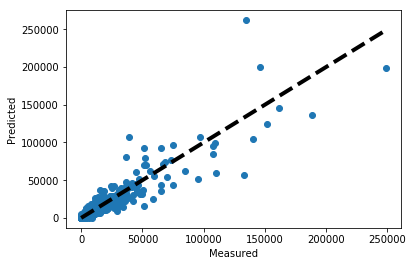

In [206]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [207]:
Submit = Regressior.predict(X2)

In [208]:
Submit.shape

(141448, 1)

In [209]:
X2_ID.shape

(141448,)

In [210]:
Submission = pd.DataFrame({'ID':X2_ID,'Upvotes':Submit.reshape(141448,)})

In [211]:
Submission.head()

,ID,Upvotes
0,366953,111.115944
1,71864,37.135246
2,141692,37.135246
3,316833,37.135246
4,440445,265.492584


In [212]:
from datetime import datetime

In [213]:
Submission.to_csv('data/sub_{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

In [82]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from datetime import datetime
from catboost import CatBoostRegressor
import numpy as np
from sklearn.model_selection import KFold

In [158]:
nrounds = 4000

params = {'metric': 'rmse', 'learning_rate': 0.02, 'max_depth': 6, 'objective': 'regression',"n_estimators": 10000,
          'feature_fraction': 0.9, 'bagging_fraction': 1, 'lambda_l1': 2, 'lambda_l2': 4, 'num_leaves': 600,
          'min_gain_to_split': .1}

xgb_params = {'eta': 0.02, 'max_depth': 6, 'subsample':0.8, 'colsample_bytree': 0.9,
          'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True}

sub = pd.DataFrame({'ID':X2_ID})
sub['Upvotes'] = 0
valid = 0
count = 0
kfold = 5

skf = KFold(n_splits=kfold)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    count = count + 1
    print(' lgb kfold: {}  of  {}'.format(count, 5))
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    lgb_model = lgb.train(params, lgb.Dataset(X_train, label=Y_train), nrounds,
                          lgb.Dataset(X_test, label=Y_test), verbose_eval=50, early_stopping_rounds=50)

    sub['Upvotes'] += lgb_model.predict(test[feature_set].values,
                                                num_iteration=lgb_model.best_iteration)

    d_train = xgb.DMatrix(X_train, Y_train)
    d_valid = xgb.DMatrix(X_test, Y_test)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    xgb_model = xgb.train(xgb_params, d_train, nrounds, watchlist, early_stopping_rounds=50,
                          maximize=False, verbose_eval=50)

    sub['Upvotes'] += xgb_model.predict(xgb.DMatrix(test[feature_set].values),
                                                                   ntree_limit=xgb_model.best_ntree_limit)

    model = CatBoostRegressor(learning_rate=0.02, depth=6, iterations=5000,
                              eval_metric="RMSE", verbose=True,bootstrap_type="Bernoulli")

    fit_model = model.fit(X_train, Y_train, eval_set=(X_test, Y_test), use_best_model=True)

    sub['Upvotes'] += fit_model.predict(test[feature_set].values)

 lgb kfold: 1  of  5


C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's rmse: 3193.17
[100]	valid_0's rmse: 2730.46
[150]	valid_0's rmse: 2523.86
[200]	valid_0's rmse: 2443.9
[250]	valid_0's rmse: 2407.55
[300]	valid_0's rmse: 2385.61
[350]	valid_0's rmse: 2362.24
[400]	valid_0's rmse: 2336.63
[450]	valid_0's rmse: 2314.03
[500]	valid_0's rmse: 2291.39
[550]	valid_0's rmse: 2273.87
[600]	valid_0's rmse: 2259.4
[650]	valid_0's rmse: 2247.43
[700]	valid_0's rmse: 2227.97
[750]	valid_0's rmse: 2211.73
[800]	valid_0's rmse: 2189.7
[850]	valid_0's rmse: 2174.83
[900]	valid_0's rmse: 2160.68
[950]	valid_0's rmse: 2150.34
[1000]	valid_0's rmse: 2138.71
[1050]	valid_0's rmse: 2128.3
[1100]	valid_0's rmse: 2119.15
[1150]	valid_0's rmse: 2107.93
[1200]	valid_0's rmse: 2098.82
[1250]	valid_0's rmse: 2093.18
[1300]	valid_0's rmse: 2090.49
[1350]	valid_0's rmse: 2084.82
[1400]	valid_0's rmse: 2083
[1450]	valid_0's rmse: 2080.82
[1500]	valid_0's rmse: 2078.3
[1550]	valid_0's rmse: 2077.7
[1600]

69:	learn: 1902.6824133	test: 2948.0108225	best: 2948.0108225 (69)	total: 3.38s	remaining: 3m 57s
70:	learn: 1893.0727742	test: 2938.2239953	best: 2938.2239953 (70)	total: 3.42s	remaining: 3m 57s
71:	learn: 1881.9830856	test: 2926.9726278	best: 2926.9726278 (71)	total: 3.47s	remaining: 3m 57s
72:	learn: 1872.2865864	test: 2918.1408644	best: 2918.1408644 (72)	total: 3.52s	remaining: 3m 57s
73:	learn: 1864.2134416	test: 2909.0822433	best: 2909.0822433 (73)	total: 3.57s	remaining: 3m 57s
74:	learn: 1854.0645773	test: 2899.8670506	best: 2899.8670506 (74)	total: 3.62s	remaining: 3m 57s
75:	learn: 1847.4945428	test: 2895.0056091	best: 2895.0056091 (75)	total: 3.67s	remaining: 3m 57s
76:	learn: 1838.3687329	test: 2884.9647908	best: 2884.9647908 (76)	total: 3.71s	remaining: 3m 57s
77:	learn: 1829.5619947	test: 2876.2884415	best: 2876.2884415 (77)	total: 3.76s	remaining: 3m 57s
78:	learn: 1821.7083827	test: 2870.6999767	best: 2870.6999767 (78)	total: 3.81s	remaining: 3m 57s
79:	learn: 1814.7551

153:	learn: 1420.5052282	test: 2543.5910480	best: 2543.5910480 (153)	total: 7.35s	remaining: 3m 51s
154:	learn: 1417.2035060	test: 2541.4778289	best: 2541.4778289 (154)	total: 7.39s	remaining: 3m 51s
155:	learn: 1414.6250475	test: 2540.1178476	best: 2540.1178476 (155)	total: 7.44s	remaining: 3m 50s
156:	learn: 1410.9319458	test: 2536.2646025	best: 2536.2646025 (156)	total: 7.48s	remaining: 3m 50s
157:	learn: 1408.2853930	test: 2534.8102444	best: 2534.8102444 (157)	total: 7.53s	remaining: 3m 50s
158:	learn: 1408.0287459	test: 2534.7944991	best: 2534.7944991 (158)	total: 7.57s	remaining: 3m 50s
159:	learn: 1405.3124135	test: 2532.7732927	best: 2532.7732927 (159)	total: 7.62s	remaining: 3m 50s
160:	learn: 1402.9663296	test: 2531.2124093	best: 2531.2124093 (160)	total: 7.67s	remaining: 3m 50s
161:	learn: 1398.9222664	test: 2529.2465179	best: 2529.2465179 (161)	total: 7.72s	remaining: 3m 50s
162:	learn: 1395.1784055	test: 2522.9240449	best: 2522.9240449 (162)	total: 7.76s	remaining: 3m 50s


237:	learn: 1241.4812696	test: 2420.5676276	best: 2420.5676276 (237)	total: 11.2s	remaining: 3m 43s
238:	learn: 1240.2855078	test: 2420.6686563	best: 2420.5676276 (237)	total: 11.2s	remaining: 3m 43s
239:	learn: 1239.4006080	test: 2420.6259338	best: 2420.5676276 (237)	total: 11.3s	remaining: 3m 43s
240:	learn: 1237.2942099	test: 2420.1486903	best: 2420.1486903 (240)	total: 11.3s	remaining: 3m 43s
241:	learn: 1237.2494618	test: 2420.1482117	best: 2420.1482117 (241)	total: 11.4s	remaining: 3m 43s
242:	learn: 1236.1941883	test: 2418.6050639	best: 2418.6050639 (242)	total: 11.4s	remaining: 3m 43s
243:	learn: 1235.9924672	test: 2418.4730814	best: 2418.4730814 (243)	total: 11.4s	remaining: 3m 43s
244:	learn: 1234.6993826	test: 2416.1492387	best: 2416.1492387 (244)	total: 11.5s	remaining: 3m 43s
245:	learn: 1232.8330086	test: 2413.9398646	best: 2413.9398646 (245)	total: 11.5s	remaining: 3m 42s
246:	learn: 1230.5757596	test: 2413.1800822	best: 2413.1800822 (246)	total: 11.6s	remaining: 3m 42s


320:	learn: 1138.6509956	test: 2343.0134970	best: 2343.0134970 (320)	total: 15s	remaining: 3m 38s
321:	learn: 1136.9633495	test: 2341.6110544	best: 2341.6110544 (321)	total: 15s	remaining: 3m 38s
322:	learn: 1135.5880358	test: 2340.0901586	best: 2340.0901586 (322)	total: 15.1s	remaining: 3m 38s
323:	learn: 1134.2067967	test: 2338.6177479	best: 2338.6177479 (323)	total: 15.1s	remaining: 3m 38s
324:	learn: 1133.8259888	test: 2338.5109855	best: 2338.5109855 (324)	total: 15.2s	remaining: 3m 38s
325:	learn: 1132.4341500	test: 2335.7057668	best: 2335.7057668 (325)	total: 15.2s	remaining: 3m 38s
326:	learn: 1131.7019902	test: 2335.1151397	best: 2335.1151397 (326)	total: 15.3s	remaining: 3m 38s
327:	learn: 1130.3820742	test: 2333.7136296	best: 2333.7136296 (327)	total: 15.3s	remaining: 3m 38s
328:	learn: 1129.7629649	test: 2333.6588488	best: 2333.6588488 (328)	total: 15.4s	remaining: 3m 38s
329:	learn: 1128.5542510	test: 2332.8427542	best: 2332.8427542 (329)	total: 15.4s	remaining: 3m 38s
330:

404:	learn: 1066.1216748	test: 2296.0314987	best: 2296.0314987 (404)	total: 18.9s	remaining: 3m 34s
405:	learn: 1065.2751448	test: 2296.0348086	best: 2296.0314987 (404)	total: 19s	remaining: 3m 34s
406:	learn: 1064.8962096	test: 2295.4237560	best: 2295.4237560 (406)	total: 19s	remaining: 3m 34s
407:	learn: 1063.7288806	test: 2294.8053214	best: 2294.8053214 (407)	total: 19.1s	remaining: 3m 34s
408:	learn: 1063.1576283	test: 2294.7891583	best: 2294.7891583 (408)	total: 19.1s	remaining: 3m 34s
409:	learn: 1062.6165205	test: 2294.9188861	best: 2294.7891583 (408)	total: 19.2s	remaining: 3m 34s
410:	learn: 1062.4438831	test: 2294.9173607	best: 2294.7891583 (408)	total: 19.2s	remaining: 3m 34s
411:	learn: 1062.4017645	test: 2294.9168818	best: 2294.7891583 (408)	total: 19.2s	remaining: 3m 34s
412:	learn: 1061.9172711	test: 2294.8031989	best: 2294.7891583 (408)	total: 19.3s	remaining: 3m 34s
413:	learn: 1060.9133928	test: 2293.0571411	best: 2293.0571411 (413)	total: 19.3s	remaining: 3m 34s
414:

487:	learn: 1013.9497866	test: 2267.8543653	best: 2267.8543653 (487)	total: 22.8s	remaining: 3m 30s
488:	learn: 1013.3803036	test: 2267.2673170	best: 2267.2673170 (488)	total: 22.8s	remaining: 3m 30s
489:	learn: 1012.7245613	test: 2266.4329800	best: 2266.4329800 (489)	total: 22.9s	remaining: 3m 30s
490:	learn: 1012.4868434	test: 2266.3660005	best: 2266.3660005 (490)	total: 22.9s	remaining: 3m 30s
491:	learn: 1011.5484295	test: 2266.1365690	best: 2266.1365690 (491)	total: 23s	remaining: 3m 30s
492:	learn: 1010.9509398	test: 2265.8382467	best: 2265.8382467 (492)	total: 23s	remaining: 3m 30s
493:	learn: 1010.6472535	test: 2265.7144696	best: 2265.7144696 (493)	total: 23.1s	remaining: 3m 30s
494:	learn: 1010.6113572	test: 2265.7135517	best: 2265.7135517 (494)	total: 23.1s	remaining: 3m 30s
495:	learn: 1009.9013198	test: 2265.9803454	best: 2265.7135517 (494)	total: 23.1s	remaining: 3m 30s
496:	learn: 1009.5286252	test: 2265.4862476	best: 2265.4862476 (496)	total: 23.2s	remaining: 3m 30s
497:

573:	learn: 977.0419882	test: 2249.2284646	best: 2249.2284646 (573)	total: 26.8s	remaining: 3m 26s
574:	learn: 977.0008415	test: 2249.2894926	best: 2249.2284646 (573)	total: 26.8s	remaining: 3m 26s
575:	learn: 976.6331179	test: 2249.0946111	best: 2249.0946111 (575)	total: 26.9s	remaining: 3m 26s
576:	learn: 976.3990443	test: 2248.9492538	best: 2248.9492538 (576)	total: 26.9s	remaining: 3m 26s
577:	learn: 975.2491285	test: 2247.2150022	best: 2247.2150022 (577)	total: 27s	remaining: 3m 26s
578:	learn: 974.0821636	test: 2246.3836581	best: 2246.3836581 (578)	total: 27s	remaining: 3m 26s
579:	learn: 973.5325177	test: 2246.1715600	best: 2246.1715600 (579)	total: 27.1s	remaining: 3m 26s
580:	learn: 972.9372081	test: 2246.1843944	best: 2246.1715600 (579)	total: 27.1s	remaining: 3m 26s
581:	learn: 972.4893169	test: 2245.8711630	best: 2245.8711630 (581)	total: 27.2s	remaining: 3m 26s
582:	learn: 972.1917841	test: 2245.7660235	best: 2245.7660235 (582)	total: 27.2s	remaining: 3m 26s
583:	learn: 97

656:	learn: 942.1520009	test: 2229.9569177	best: 2229.7018710 (651)	total: 30.7s	remaining: 3m 22s
657:	learn: 940.8168966	test: 2230.5483554	best: 2229.7018710 (651)	total: 30.7s	remaining: 3m 22s
658:	learn: 940.7707920	test: 2230.5453282	best: 2229.7018710 (651)	total: 30.8s	remaining: 3m 22s
659:	learn: 940.0905529	test: 2230.2995146	best: 2229.7018710 (651)	total: 30.8s	remaining: 3m 22s
660:	learn: 940.0325672	test: 2230.4996410	best: 2229.7018710 (651)	total: 30.9s	remaining: 3m 22s
661:	learn: 939.7410123	test: 2230.7002158	best: 2229.7018710 (651)	total: 30.9s	remaining: 3m 22s
662:	learn: 939.2051562	test: 2230.5786677	best: 2229.7018710 (651)	total: 31s	remaining: 3m 22s
663:	learn: 939.1707542	test: 2230.5807467	best: 2229.7018710 (651)	total: 31s	remaining: 3m 22s
664:	learn: 938.9489932	test: 2230.5163936	best: 2229.7018710 (651)	total: 31.1s	remaining: 3m 22s
665:	learn: 938.4253109	test: 2230.8752936	best: 2229.7018710 (651)	total: 31.1s	remaining: 3m 22s
666:	learn: 93

741:	learn: 906.9455388	test: 2216.2233582	best: 2216.2233582 (741)	total: 34.6s	remaining: 3m 18s
742:	learn: 906.5174725	test: 2216.3384656	best: 2216.2233582 (741)	total: 34.7s	remaining: 3m 18s
743:	learn: 906.2960421	test: 2216.1675255	best: 2216.1675255 (743)	total: 34.7s	remaining: 3m 18s
744:	learn: 905.9574803	test: 2216.0012164	best: 2216.0012164 (744)	total: 34.8s	remaining: 3m 18s
745:	learn: 905.3187132	test: 2215.1843052	best: 2215.1843052 (745)	total: 34.8s	remaining: 3m 18s
746:	learn: 905.0549540	test: 2215.1977396	best: 2215.1843052 (745)	total: 34.9s	remaining: 3m 18s
747:	learn: 904.8623959	test: 2215.3047020	best: 2215.1843052 (745)	total: 34.9s	remaining: 3m 18s
748:	learn: 904.7842210	test: 2215.2738633	best: 2215.1843052 (745)	total: 35s	remaining: 3m 18s
749:	learn: 904.7658774	test: 2215.2744518	best: 2215.1843052 (745)	total: 35s	remaining: 3m 18s
750:	learn: 904.5365752	test: 2215.2972807	best: 2215.1843052 (745)	total: 35s	remaining: 3m 18s
751:	learn: 904.

824:	learn: 880.2934122	test: 2203.9165132	best: 2203.9165132 (824)	total: 38.5s	remaining: 3m 14s
825:	learn: 879.4888184	test: 2203.5016717	best: 2203.5016717 (825)	total: 38.5s	remaining: 3m 14s
826:	learn: 879.3637546	test: 2203.5196825	best: 2203.5016717 (825)	total: 38.6s	remaining: 3m 14s
827:	learn: 877.9529902	test: 2202.8583279	best: 2202.8583279 (827)	total: 38.6s	remaining: 3m 14s
828:	learn: 877.7181669	test: 2202.9211341	best: 2202.8583279 (827)	total: 38.7s	remaining: 3m 14s
829:	learn: 877.6384763	test: 2202.7531462	best: 2202.7531462 (829)	total: 38.7s	remaining: 3m 14s
830:	learn: 877.4402880	test: 2202.7956740	best: 2202.7531462 (829)	total: 38.8s	remaining: 3m 14s
831:	learn: 877.3714410	test: 2202.9306169	best: 2202.7531462 (829)	total: 38.8s	remaining: 3m 14s
832:	learn: 876.3845806	test: 2202.8852420	best: 2202.7531462 (829)	total: 38.9s	remaining: 3m 14s
833:	learn: 876.2177907	test: 2202.9031082	best: 2202.7531462 (829)	total: 38.9s	remaining: 3m 14s
834:	learn

910:	learn: 854.6992288	test: 2198.6001572	best: 2198.5369340 (909)	total: 42.5s	remaining: 3m 10s
911:	learn: 854.2198797	test: 2198.6425970	best: 2198.5369340 (909)	total: 42.5s	remaining: 3m 10s
912:	learn: 853.8959399	test: 2198.2590054	best: 2198.2590054 (912)	total: 42.6s	remaining: 3m 10s
913:	learn: 853.2204753	test: 2197.5943954	best: 2197.5943954 (913)	total: 42.6s	remaining: 3m 10s
914:	learn: 852.9084792	test: 2197.4633319	best: 2197.4633319 (914)	total: 42.7s	remaining: 3m 10s
915:	learn: 852.7424893	test: 2197.7424590	best: 2197.4633319 (914)	total: 42.7s	remaining: 3m 10s
916:	learn: 852.7162631	test: 2197.7469930	best: 2197.4633319 (914)	total: 42.8s	remaining: 3m 10s
917:	learn: 852.7072139	test: 2197.7454530	best: 2197.4633319 (914)	total: 42.8s	remaining: 3m 10s
918:	learn: 852.6883649	test: 2197.7450539	best: 2197.4633319 (914)	total: 42.9s	remaining: 3m 10s
919:	learn: 851.8731434	test: 2197.4447938	best: 2197.4447938 (919)	total: 42.9s	remaining: 3m 10s
920:	learn

997:	learn: 832.2012866	test: 2191.5640135	best: 2191.3639686 (974)	total: 46.5s	remaining: 3m 6s
998:	learn: 831.8823641	test: 2191.9780665	best: 2191.3639686 (974)	total: 46.6s	remaining: 3m 6s
999:	learn: 831.7089361	test: 2191.7081485	best: 2191.3639686 (974)	total: 46.6s	remaining: 3m 6s
1000:	learn: 831.4637375	test: 2191.3401568	best: 2191.3401568 (1000)	total: 46.7s	remaining: 3m 6s
1001:	learn: 831.4132527	test: 2191.4951019	best: 2191.3401568 (1000)	total: 46.7s	remaining: 3m 6s
1002:	learn: 831.3102637	test: 2191.5615642	best: 2191.3401568 (1000)	total: 46.8s	remaining: 3m 6s
1003:	learn: 831.2261715	test: 2191.5219149	best: 2191.3401568 (1000)	total: 46.8s	remaining: 3m 6s
1004:	learn: 830.4161427	test: 2191.0694224	best: 2191.0694224 (1004)	total: 46.9s	remaining: 3m 6s
1005:	learn: 830.2819023	test: 2191.2915968	best: 2191.0694224 (1004)	total: 46.9s	remaining: 3m 6s
1006:	learn: 830.1826083	test: 2191.2916073	best: 2191.0694224 (1004)	total: 47s	remaining: 3m 6s
1007:	le

1081:	learn: 810.2001028	test: 2184.2518508	best: 2184.2201995 (1079)	total: 50.5s	remaining: 3m 2s
1082:	learn: 809.9717300	test: 2183.7535884	best: 2183.7535884 (1082)	total: 50.5s	remaining: 3m 2s
1083:	learn: 809.6672034	test: 2183.6117608	best: 2183.6117608 (1083)	total: 50.6s	remaining: 3m 2s
1084:	learn: 808.4866144	test: 2183.4488203	best: 2183.4488203 (1084)	total: 50.6s	remaining: 3m 2s
1085:	learn: 808.2391242	test: 2183.5361926	best: 2183.4488203 (1084)	total: 50.7s	remaining: 3m 2s
1086:	learn: 808.1113808	test: 2183.3675791	best: 2183.3675791 (1086)	total: 50.7s	remaining: 3m 2s
1087:	learn: 807.9896015	test: 2183.4715608	best: 2183.3675791 (1086)	total: 50.8s	remaining: 3m 2s
1088:	learn: 807.8424973	test: 2183.3730361	best: 2183.3675791 (1086)	total: 50.8s	remaining: 3m 2s
1089:	learn: 807.6208717	test: 2183.4517725	best: 2183.3675791 (1086)	total: 50.9s	remaining: 3m 2s
1090:	learn: 807.5308591	test: 2183.5713661	best: 2183.3675791 (1086)	total: 50.9s	remaining: 3m 2s


1164:	learn: 790.7434195	test: 2182.4107279	best: 2181.7886036 (1151)	total: 54.3s	remaining: 2m 58s
1165:	learn: 790.6438939	test: 2182.6065987	best: 2181.7886036 (1151)	total: 54.4s	remaining: 2m 58s
1166:	learn: 790.3973968	test: 2182.5777440	best: 2181.7886036 (1151)	total: 54.4s	remaining: 2m 58s
1167:	learn: 790.3753957	test: 2182.5872048	best: 2181.7886036 (1151)	total: 54.5s	remaining: 2m 58s
1168:	learn: 790.0324794	test: 2182.6434203	best: 2181.7886036 (1151)	total: 54.5s	remaining: 2m 58s
1169:	learn: 789.3297971	test: 2182.4241823	best: 2181.7886036 (1151)	total: 54.6s	remaining: 2m 58s
1170:	learn: 789.1695539	test: 2182.2980766	best: 2181.7886036 (1151)	total: 54.6s	remaining: 2m 58s
1171:	learn: 788.9027470	test: 2182.5617531	best: 2181.7886036 (1151)	total: 54.7s	remaining: 2m 58s
1172:	learn: 788.5007524	test: 2182.6367075	best: 2181.7886036 (1151)	total: 54.7s	remaining: 2m 58s
1173:	learn: 788.2406249	test: 2182.7695247	best: 2181.7886036 (1151)	total: 54.8s	remainin

1249:	learn: 770.4950124	test: 2179.6082370	best: 2179.0282201 (1245)	total: 58.3s	remaining: 2m 54s
1250:	learn: 769.9351793	test: 2179.4385043	best: 2179.0282201 (1245)	total: 58.3s	remaining: 2m 54s
1251:	learn: 769.0876694	test: 2179.4311706	best: 2179.0282201 (1245)	total: 58.4s	remaining: 2m 54s
1252:	learn: 769.0832558	test: 2179.4320540	best: 2179.0282201 (1245)	total: 58.4s	remaining: 2m 54s
1253:	learn: 768.7787395	test: 2179.5562265	best: 2179.0282201 (1245)	total: 58.5s	remaining: 2m 54s
1254:	learn: 768.5898470	test: 2179.8355568	best: 2179.0282201 (1245)	total: 58.5s	remaining: 2m 54s
1255:	learn: 768.2554209	test: 2179.7526742	best: 2179.0282201 (1245)	total: 58.5s	remaining: 2m 54s
1256:	learn: 767.8955140	test: 2179.8376961	best: 2179.0282201 (1245)	total: 58.6s	remaining: 2m 54s
1257:	learn: 767.5651843	test: 2179.5205300	best: 2179.0282201 (1245)	total: 58.6s	remaining: 2m 54s
1258:	learn: 767.0884398	test: 2179.2985401	best: 2179.0282201 (1245)	total: 58.7s	remainin

1334:	learn: 751.4177269	test: 2173.9436318	best: 2173.5347596 (1320)	total: 1m 2s	remaining: 2m 50s
1335:	learn: 750.8922085	test: 2173.5345752	best: 2173.5345752 (1335)	total: 1m 2s	remaining: 2m 50s
1336:	learn: 750.8041818	test: 2173.3951065	best: 2173.3951065 (1336)	total: 1m 2s	remaining: 2m 50s
1337:	learn: 750.5927443	test: 2173.3678789	best: 2173.3678789 (1337)	total: 1m 2s	remaining: 2m 50s
1338:	learn: 750.2830878	test: 2172.8502113	best: 2172.8502113 (1338)	total: 1m 2s	remaining: 2m 50s
1339:	learn: 750.2743018	test: 2172.8498229	best: 2172.8498229 (1339)	total: 1m 2s	remaining: 2m 50s
1340:	learn: 750.2086230	test: 2172.8672089	best: 2172.8498229 (1339)	total: 1m 2s	remaining: 2m 50s
1341:	learn: 750.0952281	test: 2172.7783890	best: 2172.7783890 (1341)	total: 1m 2s	remaining: 2m 50s
1342:	learn: 749.8890839	test: 2172.7859022	best: 2172.7783890 (1341)	total: 1m 2s	remaining: 2m 50s
1343:	learn: 749.4806799	test: 2172.6686809	best: 2172.6686809 (1343)	total: 1m 2s	remainin

1420:	learn: 735.5262209	test: 2172.8555731	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1421:	learn: 735.0614775	test: 2172.3832770	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1422:	learn: 734.8532017	test: 2172.6477040	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1423:	learn: 734.5518720	test: 2172.6749446	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1424:	learn: 734.4151352	test: 2172.7110002	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1425:	learn: 734.3855477	test: 2172.7471929	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1426:	learn: 733.8142533	test: 2172.4734094	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1427:	learn: 733.6965637	test: 2172.5000940	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1428:	learn: 733.4351084	test: 2172.4665106	best: 2172.0145399 (1406)	total: 1m 6s	remaining: 2m 46s
1429:	learn: 733.3672400	test: 2172.4797609	best: 2172.0145399 (1406)	total: 1m 6s	remainin

1504:	learn: 717.3257843	test: 2170.9604694	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1505:	learn: 717.0596454	test: 2171.4253069	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1506:	learn: 716.9283516	test: 2171.4436116	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1507:	learn: 716.7664041	test: 2171.4286431	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1508:	learn: 716.6596235	test: 2171.2429750	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1509:	learn: 716.5754781	test: 2171.3138580	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1510:	learn: 716.4940699	test: 2171.2650821	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1511:	learn: 716.3199912	test: 2171.3067651	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1512:	learn: 716.0386415	test: 2171.2959768	best: 2170.5987555 (1463)	total: 1m 10s	remaining: 2m 42s
1513:	learn: 715.9267161	test: 2171.4030238	best: 2170.5987555 (1463)	total: 1m 10

1586:	learn: 702.6004457	test: 2169.3211890	best: 2169.0788949 (1584)	total: 1m 14s	remaining: 2m 39s
1587:	learn: 702.3277386	test: 2169.4858144	best: 2169.0788949 (1584)	total: 1m 14s	remaining: 2m 39s
1588:	learn: 702.0402899	test: 2169.3123963	best: 2169.0788949 (1584)	total: 1m 14s	remaining: 2m 39s
1589:	learn: 701.8101538	test: 2168.9663659	best: 2168.9663659 (1589)	total: 1m 14s	remaining: 2m 39s
1590:	learn: 701.5991038	test: 2168.9989828	best: 2168.9663659 (1589)	total: 1m 14s	remaining: 2m 39s
1591:	learn: 701.4742253	test: 2169.2389194	best: 2168.9663659 (1589)	total: 1m 14s	remaining: 2m 39s
1592:	learn: 701.1835967	test: 2168.4867004	best: 2168.4867004 (1592)	total: 1m 14s	remaining: 2m 38s
1593:	learn: 700.9424973	test: 2168.6539658	best: 2168.4867004 (1592)	total: 1m 14s	remaining: 2m 38s
1594:	learn: 700.7472858	test: 2167.9266659	best: 2167.9266659 (1594)	total: 1m 14s	remaining: 2m 38s
1595:	learn: 700.6289464	test: 2167.9301068	best: 2167.9266659 (1594)	total: 1m 14

1671:	learn: 686.4438819	test: 2168.9344917	best: 2167.3783648 (1613)	total: 1m 17s	remaining: 2m 35s
1672:	learn: 686.2178519	test: 2168.9538138	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 35s
1673:	learn: 686.1631595	test: 2168.9546258	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 35s
1674:	learn: 686.1543645	test: 2168.9858911	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 35s
1675:	learn: 685.8871764	test: 2169.0137228	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 35s
1676:	learn: 685.7271258	test: 2169.1737045	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 34s
1677:	learn: 685.4530668	test: 2169.2097397	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 34s
1678:	learn: 685.2642513	test: 2169.1670843	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 34s
1679:	learn: 685.2485554	test: 2169.1856504	best: 2167.3783648 (1613)	total: 1m 18s	remaining: 2m 34s
1680:	learn: 685.2456707	test: 2169.1859707	best: 2167.3783648 (1613)	total: 1m 18

1753:	learn: 675.5884634	test: 2167.9155563	best: 2167.3783648 (1613)	total: 1m 21s	remaining: 2m 31s
1754:	learn: 675.5566805	test: 2168.0433314	best: 2167.3783648 (1613)	total: 1m 21s	remaining: 2m 31s
1755:	learn: 675.4370999	test: 2168.3265719	best: 2167.3783648 (1613)	total: 1m 21s	remaining: 2m 31s
1756:	learn: 675.1342867	test: 2167.5690436	best: 2167.3783648 (1613)	total: 1m 21s	remaining: 2m 31s
1757:	learn: 674.9003771	test: 2167.6376675	best: 2167.3783648 (1613)	total: 1m 21s	remaining: 2m 31s
1758:	learn: 674.7006437	test: 2167.3550261	best: 2167.3550261 (1758)	total: 1m 22s	remaining: 2m 31s
1759:	learn: 674.5472032	test: 2167.5385097	best: 2167.3550261 (1758)	total: 1m 22s	remaining: 2m 31s
1760:	learn: 674.3740210	test: 2167.5419936	best: 2167.3550261 (1758)	total: 1m 22s	remaining: 2m 31s
1761:	learn: 674.2923778	test: 2167.3470577	best: 2167.3470577 (1761)	total: 1m 22s	remaining: 2m 31s
1762:	learn: 674.0609799	test: 2167.2602551	best: 2167.2602551 (1762)	total: 1m 22

1835:	learn: 662.0839869	test: 2166.2529694	best: 2166.1146096 (1832)	total: 1m 25s	remaining: 2m 27s
1836:	learn: 662.0145943	test: 2166.2883663	best: 2166.1146096 (1832)	total: 1m 25s	remaining: 2m 27s
1837:	learn: 661.7096517	test: 2166.0844269	best: 2166.0844269 (1837)	total: 1m 25s	remaining: 2m 27s
1838:	learn: 661.6091410	test: 2166.0035753	best: 2166.0035753 (1838)	total: 1m 25s	remaining: 2m 27s
1839:	learn: 661.4206964	test: 2166.1031202	best: 2166.0035753 (1838)	total: 1m 25s	remaining: 2m 27s
1840:	learn: 661.3123322	test: 2166.3568470	best: 2166.0035753 (1838)	total: 1m 25s	remaining: 2m 27s
1841:	learn: 661.2277245	test: 2166.3515041	best: 2166.0035753 (1838)	total: 1m 26s	remaining: 2m 27s
1842:	learn: 661.1743112	test: 2166.3108618	best: 2166.0035753 (1838)	total: 1m 26s	remaining: 2m 27s
1843:	learn: 660.9055553	test: 2166.4129411	best: 2166.0035753 (1838)	total: 1m 26s	remaining: 2m 27s
1844:	learn: 660.7265161	test: 2166.1113869	best: 2166.0035753 (1838)	total: 1m 26

1918:	learn: 649.1338208	test: 2167.6636081	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1919:	learn: 649.0273928	test: 2167.5882689	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1920:	learn: 648.8923963	test: 2167.6687636	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1921:	learn: 648.5399427	test: 2167.6919555	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1922:	learn: 648.3519849	test: 2167.5997045	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1923:	learn: 648.2769041	test: 2167.4257982	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1924:	learn: 648.1508336	test: 2167.5091274	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1925:	learn: 648.0541610	test: 2167.6795739	best: 2165.4218515 (1862)	total: 1m 29s	remaining: 2m 23s
1926:	learn: 647.9136627	test: 2167.4815378	best: 2165.4218515 (1862)	total: 1m 30s	remaining: 2m 23s
1927:	learn: 647.7816859	test: 2167.4676950	best: 2165.4218515 (1862)	total: 1m 30

2003:	learn: 638.2576058	test: 2167.4094104	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 20s
2004:	learn: 638.1226192	test: 2167.0036579	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 20s
2005:	learn: 637.8078637	test: 2166.8603579	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 19s
2006:	learn: 637.5175793	test: 2166.8526782	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 19s
2007:	learn: 637.5000806	test: 2166.8653569	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 19s
2008:	learn: 637.4675842	test: 2166.8691327	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 19s
2009:	learn: 637.2475034	test: 2166.8521510	best: 2165.4218515 (1862)	total: 1m 33s	remaining: 2m 19s
2010:	learn: 637.1099812	test: 2166.7876693	best: 2165.4218515 (1862)	total: 1m 34s	remaining: 2m 19s
2011:	learn: 637.0605931	test: 2166.7769670	best: 2165.4218515 (1862)	total: 1m 34s	remaining: 2m 19s
2012:	learn: 636.9341472	test: 2166.6875921	best: 2165.4218515 (1862)	total: 1m 34

2086:	learn: 627.6191370	test: 2167.5798601	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2087:	learn: 627.5717000	test: 2167.5624049	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2088:	learn: 627.4879477	test: 2167.4611498	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2089:	learn: 627.4446057	test: 2167.4631607	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2090:	learn: 627.3695803	test: 2167.3525584	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2091:	learn: 627.2665325	test: 2167.2366952	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2092:	learn: 627.1361837	test: 2167.2847114	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 16s
2093:	learn: 627.0446858	test: 2167.4493421	best: 2165.4218515 (1862)	total: 1m 37s	remaining: 2m 15s
2094:	learn: 626.9067749	test: 2167.5712720	best: 2165.4218515 (1862)	total: 1m 38s	remaining: 2m 15s
2095:	learn: 626.7300630	test: 2167.7136204	best: 2165.4218515 (1862)	total: 1m 38

2170:	learn: 616.3579138	test: 2165.4814808	best: 2165.4037206 (2163)	total: 1m 41s	remaining: 2m 12s
2171:	learn: 616.2400461	test: 2165.5483595	best: 2165.4037206 (2163)	total: 1m 41s	remaining: 2m 12s
2172:	learn: 616.2376359	test: 2165.5491680	best: 2165.4037206 (2163)	total: 1m 41s	remaining: 2m 12s
2173:	learn: 616.0711128	test: 2165.5101153	best: 2165.4037206 (2163)	total: 1m 41s	remaining: 2m 12s
2174:	learn: 615.9618412	test: 2165.4924588	best: 2165.4037206 (2163)	total: 1m 41s	remaining: 2m 12s
2175:	learn: 615.9100512	test: 2165.6375852	best: 2165.4037206 (2163)	total: 1m 41s	remaining: 2m 12s
2176:	learn: 615.7338061	test: 2165.3099155	best: 2165.3099155 (2176)	total: 1m 41s	remaining: 2m 12s
2177:	learn: 615.6525928	test: 2165.3076636	best: 2165.3076636 (2177)	total: 1m 41s	remaining: 2m 12s
2178:	learn: 615.5016488	test: 2165.4521473	best: 2165.3076636 (2177)	total: 1m 41s	remaining: 2m 12s
2179:	learn: 615.3848261	test: 2165.2985369	best: 2165.2985369 (2179)	total: 1m 42

2253:	learn: 607.5221481	test: 2164.8951221	best: 2164.8548314 (2252)	total: 1m 45s	remaining: 2m 8s
2254:	learn: 607.4663093	test: 2164.9232453	best: 2164.8548314 (2252)	total: 1m 45s	remaining: 2m 8s
2255:	learn: 607.3469502	test: 2164.9492895	best: 2164.8548314 (2252)	total: 1m 45s	remaining: 2m 8s
2256:	learn: 607.3164550	test: 2164.9435301	best: 2164.8548314 (2252)	total: 1m 45s	remaining: 2m 8s
2257:	learn: 607.1933405	test: 2164.9884636	best: 2164.8548314 (2252)	total: 1m 45s	remaining: 2m 8s
2258:	learn: 607.0088327	test: 2164.6463802	best: 2164.6463802 (2258)	total: 1m 45s	remaining: 2m 8s
2259:	learn: 606.7574869	test: 2164.6677355	best: 2164.6463802 (2258)	total: 1m 45s	remaining: 2m 8s
2260:	learn: 606.7553095	test: 2164.6681776	best: 2164.6463802 (2258)	total: 1m 45s	remaining: 2m 8s
2261:	learn: 606.7044192	test: 2164.7614521	best: 2164.6463802 (2258)	total: 1m 45s	remaining: 2m 8s
2262:	learn: 606.7033283	test: 2164.7614295	best: 2164.6463802 (2258)	total: 1m 45s	remaini

2337:	learn: 598.3790507	test: 2164.2466032	best: 2164.2466032 (2337)	total: 1m 49s	remaining: 2m 4s
2338:	learn: 598.3045638	test: 2164.3068433	best: 2164.2466032 (2337)	total: 1m 49s	remaining: 2m 4s
2339:	learn: 598.2336376	test: 2164.2289131	best: 2164.2289131 (2339)	total: 1m 49s	remaining: 2m 4s
2340:	learn: 598.1273507	test: 2164.0691147	best: 2164.0691147 (2340)	total: 1m 49s	remaining: 2m 4s
2341:	learn: 598.0425607	test: 2164.0555364	best: 2164.0555364 (2341)	total: 1m 49s	remaining: 2m 4s
2342:	learn: 597.9141425	test: 2164.0549368	best: 2164.0549368 (2342)	total: 1m 49s	remaining: 2m 4s
2343:	learn: 597.5843761	test: 2164.0465691	best: 2164.0465691 (2343)	total: 1m 49s	remaining: 2m 4s
2344:	learn: 597.5355100	test: 2164.1023821	best: 2164.0465691 (2343)	total: 1m 49s	remaining: 2m 4s
2345:	learn: 597.4496129	test: 2163.9733956	best: 2163.9733956 (2345)	total: 1m 49s	remaining: 2m 4s
2346:	learn: 597.3831812	test: 2164.0672537	best: 2163.9733956 (2345)	total: 1m 49s	remaini

2419:	learn: 589.7519917	test: 2164.1160614	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2420:	learn: 589.5968862	test: 2163.9564484	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2421:	learn: 589.5222711	test: 2164.1750306	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2422:	learn: 589.3603907	test: 2164.3152846	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2423:	learn: 589.3171123	test: 2164.2556952	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2424:	learn: 589.1908113	test: 2164.1588658	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2425:	learn: 589.1762597	test: 2164.1573246	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2426:	learn: 589.0748826	test: 2164.3756785	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2427:	learn: 588.9570272	test: 2164.3874752	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2428:	learn: 588.9005143	test: 2164.3334194	best: 2163.3064222 (2373)	total: 1m 53s	remaining: 2m
2429:	learn: 588.819

2501:	learn: 582.0419835	test: 2162.8680568	best: 2162.7720145 (2497)	total: 1m 57s	remaining: 1m 56s
2502:	learn: 581.9431007	test: 2162.9877767	best: 2162.7720145 (2497)	total: 1m 57s	remaining: 1m 56s
2503:	learn: 581.8914236	test: 2162.9710408	best: 2162.7720145 (2497)	total: 1m 57s	remaining: 1m 56s
2504:	learn: 581.6956591	test: 2162.8354563	best: 2162.7720145 (2497)	total: 1m 57s	remaining: 1m 56s
2505:	learn: 581.5155452	test: 2162.8810848	best: 2162.7720145 (2497)	total: 1m 57s	remaining: 1m 56s
2506:	learn: 581.3628052	test: 2162.7687060	best: 2162.7687060 (2506)	total: 1m 57s	remaining: 1m 56s
2507:	learn: 581.3065491	test: 2162.8696985	best: 2162.7687060 (2506)	total: 1m 57s	remaining: 1m 56s
2508:	learn: 581.1407463	test: 2162.9423551	best: 2162.7687060 (2506)	total: 1m 57s	remaining: 1m 56s
2509:	learn: 581.0278928	test: 2163.0409979	best: 2162.7687060 (2506)	total: 1m 57s	remaining: 1m 56s
2510:	learn: 580.9077113	test: 2162.9542806	best: 2162.7687060 (2506)	total: 1m 57

2583:	learn: 573.9781258	test: 2163.6403408	best: 2162.6682654 (2515)	total: 2m	remaining: 1m 52s
2584:	learn: 573.9355477	test: 2163.6880814	best: 2162.6682654 (2515)	total: 2m	remaining: 1m 52s
2585:	learn: 573.8160344	test: 2163.7282650	best: 2162.6682654 (2515)	total: 2m	remaining: 1m 52s
2586:	learn: 573.7199431	test: 2163.6554034	best: 2162.6682654 (2515)	total: 2m	remaining: 1m 52s
2587:	learn: 573.6551020	test: 2163.7031857	best: 2162.6682654 (2515)	total: 2m	remaining: 1m 52s
2588:	learn: 573.5972787	test: 2163.6570958	best: 2162.6682654 (2515)	total: 2m 1s	remaining: 1m 52s
2589:	learn: 573.4850086	test: 2163.6436831	best: 2162.6682654 (2515)	total: 2m 1s	remaining: 1m 52s
2590:	learn: 573.3526811	test: 2163.6743384	best: 2162.6682654 (2515)	total: 2m 1s	remaining: 1m 52s
2591:	learn: 573.2604588	test: 2163.6190226	best: 2162.6682654 (2515)	total: 2m 1s	remaining: 1m 52s
2592:	learn: 573.0933989	test: 2163.6236240	best: 2162.6682654 (2515)	total: 2m 1s	remaining: 1m 52s
2593:

2666:	learn: 567.4553623	test: 2163.7102234	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 49s
2667:	learn: 567.3802511	test: 2163.7231057	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2668:	learn: 567.3370118	test: 2163.7437363	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2669:	learn: 567.2532860	test: 2163.3544561	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2670:	learn: 567.1493295	test: 2163.2929263	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2671:	learn: 567.0309988	test: 2163.1699789	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2672:	learn: 566.9563684	test: 2163.1963708	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2673:	learn: 566.8132833	test: 2163.1021130	best: 2162.6682654 (2515)	total: 2m 4s	remaining: 1m 48s
2674:	learn: 566.6922145	test: 2163.3160767	best: 2162.6682654 (2515)	total: 2m 5s	remaining: 1m 48s
2675:	learn: 566.6156431	test: 2163.2874032	best: 2162.6682654 (2515)	total: 2m 5s	remainin

2751:	learn: 560.2014559	test: 2163.3199929	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 45s
2752:	learn: 560.1364570	test: 2163.2932365	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 45s
2753:	learn: 560.0373978	test: 2163.3418215	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 44s
2754:	learn: 560.0180056	test: 2163.3549208	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 44s
2755:	learn: 559.9517942	test: 2163.3416501	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 44s
2756:	learn: 559.9351612	test: 2163.3309811	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 44s
2757:	learn: 559.8608549	test: 2163.3119278	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 44s
2758:	learn: 559.7925296	test: 2163.2291949	best: 2162.6682654 (2515)	total: 2m 8s	remaining: 1m 44s
2759:	learn: 559.7033933	test: 2163.2289599	best: 2162.6682654 (2515)	total: 2m 9s	remaining: 1m 44s
2760:	learn: 559.6752441	test: 2163.2243859	best: 2162.6682654 (2515)	total: 2m 9s	remainin

2833:	learn: 553.8328975	test: 2163.5165981	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 41s
2834:	learn: 553.7194708	test: 2163.4498755	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 41s
2835:	learn: 553.6369312	test: 2163.4892590	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 41s
2836:	learn: 553.6045739	test: 2163.6443838	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 41s
2837:	learn: 553.4949272	test: 2163.4312338	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 41s
2838:	learn: 553.4558454	test: 2163.4281637	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 41s
2839:	learn: 553.3405721	test: 2163.4002212	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 40s
2840:	learn: 553.2584316	test: 2163.4479685	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 40s
2841:	learn: 553.0786821	test: 2163.4835899	best: 2162.6682654 (2515)	total: 2m 12s	remaining: 1m 40s
2842:	learn: 552.9941617	test: 2163.6350261	best: 2162.6682654 (2515)	total: 2m 12

2915:	learn: 547.0074291	test: 2164.0706480	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2916:	learn: 546.8811134	test: 2164.0239101	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2917:	learn: 546.8514763	test: 2163.9946804	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2918:	learn: 546.7437232	test: 2164.0398335	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2919:	learn: 546.6730896	test: 2164.0538308	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2920:	learn: 546.6487519	test: 2164.0436908	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2921:	learn: 546.5694378	test: 2163.9973389	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2922:	learn: 546.4655776	test: 2164.0605397	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2923:	learn: 546.4006664	test: 2164.0462435	best: 2162.6682654 (2515)	total: 2m 16s	remaining: 1m 37s
2924:	learn: 546.3847225	test: 2164.0505280	best: 2162.6682654 (2515)	total: 2m 16

2997:	learn: 540.4093710	test: 2163.9016038	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
2998:	learn: 540.3207725	test: 2163.9142874	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
2999:	learn: 540.2746802	test: 2163.9620876	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3000:	learn: 540.1928000	test: 2163.9751791	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3001:	learn: 540.1335130	test: 2164.1113514	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3002:	learn: 540.0257067	test: 2164.0666446	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3003:	learn: 539.9317325	test: 2164.0611738	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3004:	learn: 539.8198302	test: 2164.1044770	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3005:	learn: 539.7080199	test: 2164.1094204	best: 2162.6682654 (2515)	total: 2m 20s	remaining: 1m 33s
3006:	learn: 539.6298973	test: 2164.1609049	best: 2162.6682654 (2515)	total: 2m 20

3082:	learn: 533.4813410	test: 2163.5728375	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3083:	learn: 533.3849971	test: 2163.5556376	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3084:	learn: 533.2816122	test: 2163.5861093	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3085:	learn: 533.1319391	test: 2163.5578179	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3086:	learn: 533.0997643	test: 2163.5689614	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3087:	learn: 533.0178091	test: 2163.5215221	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3088:	learn: 532.9289648	test: 2163.3466218	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3089:	learn: 532.8877426	test: 2163.3388121	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3090:	learn: 532.8658063	test: 2163.3210592	best: 2162.6682654 (2515)	total: 2m 24s	remaining: 1m 29s
3091:	learn: 532.8213427	test: 2163.2989148	best: 2162.6682654 (2515)	total: 2m 24

3165:	learn: 526.3935743	test: 2164.2142694	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3166:	learn: 526.3428112	test: 2164.2164354	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3167:	learn: 526.2267810	test: 2164.1741238	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3168:	learn: 526.1484338	test: 2164.0247276	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3169:	learn: 526.1247785	test: 2163.9981577	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3170:	learn: 526.0180588	test: 2164.0046771	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3171:	learn: 525.9997957	test: 2164.0364003	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3172:	learn: 525.8420024	test: 2164.0445420	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3173:	learn: 525.7883547	test: 2164.1631649	best: 2162.6682654 (2515)	total: 2m 28s	remaining: 1m 25s
3174:	learn: 525.7321385	test: 2164.2245799	best: 2162.6682654 (2515)	total: 2m 28

3248:	learn: 521.0629992	test: 2164.0231515	best: 2162.6682654 (2515)	total: 2m 31s	remaining: 1m 21s
3249:	learn: 521.0322835	test: 2164.0352334	best: 2162.6682654 (2515)	total: 2m 31s	remaining: 1m 21s
3250:	learn: 520.9227028	test: 2164.1001252	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3251:	learn: 520.8102431	test: 2164.0208661	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3252:	learn: 520.7663184	test: 2163.9879025	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3253:	learn: 520.7255459	test: 2163.8777034	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3254:	learn: 520.7146342	test: 2163.8737233	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3255:	learn: 520.6654380	test: 2164.0026944	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3256:	learn: 520.6264823	test: 2163.9195181	best: 2162.6682654 (2515)	total: 2m 32s	remaining: 1m 21s
3257:	learn: 520.5544354	test: 2163.8935228	best: 2162.6682654 (2515)	total: 2m 32

3332:	learn: 514.9277519	test: 2163.1032061	best: 2162.6682654 (2515)	total: 2m 35s	remaining: 1m 17s
3333:	learn: 514.8771130	test: 2163.1269032	best: 2162.6682654 (2515)	total: 2m 35s	remaining: 1m 17s
3334:	learn: 514.6823339	test: 2163.1715304	best: 2162.6682654 (2515)	total: 2m 35s	remaining: 1m 17s
3335:	learn: 514.6731803	test: 2163.1730324	best: 2162.6682654 (2515)	total: 2m 35s	remaining: 1m 17s
3336:	learn: 514.5757729	test: 2163.2141077	best: 2162.6682654 (2515)	total: 2m 36s	remaining: 1m 17s
3337:	learn: 514.5460999	test: 2163.2135868	best: 2162.6682654 (2515)	total: 2m 36s	remaining: 1m 17s
3338:	learn: 514.5142569	test: 2163.1970949	best: 2162.6682654 (2515)	total: 2m 36s	remaining: 1m 17s
3339:	learn: 514.4181379	test: 2163.2192722	best: 2162.6682654 (2515)	total: 2m 36s	remaining: 1m 17s
3340:	learn: 514.3611294	test: 2163.1868957	best: 2162.6682654 (2515)	total: 2m 36s	remaining: 1m 17s
3341:	learn: 514.2647688	test: 2163.1019416	best: 2162.6682654 (2515)	total: 2m 36

3415:	learn: 509.3576875	test: 2163.4605146	best: 2162.6682654 (2515)	total: 2m 39s	remaining: 1m 14s
3416:	learn: 509.3051353	test: 2163.4811225	best: 2162.6682654 (2515)	total: 2m 39s	remaining: 1m 14s
3417:	learn: 509.2242186	test: 2163.6906998	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 14s
3418:	learn: 509.1727607	test: 2163.6792948	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 14s
3419:	learn: 509.1372147	test: 2163.7328253	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 13s
3420:	learn: 509.0754924	test: 2163.7698940	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 13s
3421:	learn: 509.0211584	test: 2163.7567240	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 13s
3422:	learn: 508.8899918	test: 2163.8516710	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 13s
3423:	learn: 508.8237359	test: 2163.8432148	best: 2162.6682654 (2515)	total: 2m 40s	remaining: 1m 13s
3424:	learn: 508.7774948	test: 2163.7775137	best: 2162.6682654 (2515)	total: 2m 40

3499:	learn: 504.4044164	test: 2163.6673641	best: 2162.6682654 (2515)	total: 2m 43s	remaining: 1m 10s
3500:	learn: 504.3943067	test: 2163.7111253	best: 2162.6682654 (2515)	total: 2m 43s	remaining: 1m 10s
3501:	learn: 504.3889791	test: 2163.7168162	best: 2162.6682654 (2515)	total: 2m 43s	remaining: 1m 10s
3502:	learn: 504.3123846	test: 2163.8472521	best: 2162.6682654 (2515)	total: 2m 43s	remaining: 1m 10s
3503:	learn: 504.2565728	test: 2163.9267804	best: 2162.6682654 (2515)	total: 2m 44s	remaining: 1m 10s
3504:	learn: 504.1629376	test: 2163.9236479	best: 2162.6682654 (2515)	total: 2m 44s	remaining: 1m 9s
3505:	learn: 504.0456174	test: 2163.9584211	best: 2162.6682654 (2515)	total: 2m 44s	remaining: 1m 9s
3506:	learn: 504.0257194	test: 2164.0765590	best: 2162.6682654 (2515)	total: 2m 44s	remaining: 1m 9s
3507:	learn: 504.0145160	test: 2164.0766314	best: 2162.6682654 (2515)	total: 2m 44s	remaining: 1m 9s
3508:	learn: 503.9533453	test: 2163.9546008	best: 2162.6682654 (2515)	total: 2m 44s	re

3585:	learn: 499.8526497	test: 2164.2241905	best: 2162.6682654 (2515)	total: 2m 47s	remaining: 1m 6s
3586:	learn: 499.8335359	test: 2164.2328804	best: 2162.6682654 (2515)	total: 2m 47s	remaining: 1m 6s
3587:	learn: 499.7930909	test: 2164.1811261	best: 2162.6682654 (2515)	total: 2m 47s	remaining: 1m 6s
3588:	learn: 499.7645226	test: 2164.1128868	best: 2162.6682654 (2515)	total: 2m 47s	remaining: 1m 6s
3589:	learn: 499.7094074	test: 2164.1285097	best: 2162.6682654 (2515)	total: 2m 47s	remaining: 1m 5s
3590:	learn: 499.6469230	test: 2164.1259279	best: 2162.6682654 (2515)	total: 2m 48s	remaining: 1m 5s
3591:	learn: 499.5955171	test: 2164.0278300	best: 2162.6682654 (2515)	total: 2m 48s	remaining: 1m 5s
3592:	learn: 499.5890875	test: 2164.0577333	best: 2162.6682654 (2515)	total: 2m 48s	remaining: 1m 5s
3593:	learn: 499.5210110	test: 2164.0376960	best: 2162.6682654 (2515)	total: 2m 48s	remaining: 1m 5s
3594:	learn: 499.4746773	test: 2164.0947102	best: 2162.6682654 (2515)	total: 2m 48s	remaini

3668:	learn: 495.4942962	test: 2163.9590897	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 2s
3669:	learn: 495.3834134	test: 2163.9357854	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 2s
3670:	learn: 495.3066039	test: 2163.9366622	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 2s
3671:	learn: 495.2890896	test: 2163.9382156	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 2s
3672:	learn: 495.1986232	test: 2163.7704356	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 2s
3673:	learn: 495.1730181	test: 2163.7913596	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 2s
3674:	learn: 495.1340915	test: 2163.7705778	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 1s
3675:	learn: 495.0700771	test: 2163.7742705	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 1s
3676:	learn: 495.0298044	test: 2163.8262038	best: 2162.6682654 (2515)	total: 2m 51s	remaining: 1m 1s
3677:	learn: 494.9617714	test: 2163.7037231	best: 2162.6682654 (2515)	total: 2m 52s	remaini

3752:	learn: 490.7128938	test: 2163.6009481	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.3s
3753:	learn: 490.6682699	test: 2163.6246177	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.3s
3754:	learn: 490.6121473	test: 2163.6205164	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.2s
3755:	learn: 490.5601407	test: 2163.6559941	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.2s
3756:	learn: 490.4768991	test: 2163.6459491	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.1s
3757:	learn: 490.4431402	test: 2163.6094790	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.1s
3758:	learn: 490.3632178	test: 2163.5785508	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58.1s
3759:	learn: 490.2848259	test: 2163.7392815	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58s
3760:	learn: 490.2649516	test: 2163.7484076	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 58s
3761:	learn: 490.2517757	test: 2163.7960623	best: 2162.6682654 (2515)	total: 2m 55s	remaining: 

3836:	learn: 486.2406089	test: 2164.0928588	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.4s
3837:	learn: 486.2338017	test: 2164.0800779	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.4s
3838:	learn: 486.1938188	test: 2164.0536984	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.3s
3839:	learn: 486.1570852	test: 2164.0184524	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.3s
3840:	learn: 486.1155897	test: 2163.9771350	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.2s
3841:	learn: 486.0519338	test: 2163.8830680	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.2s
3842:	learn: 486.0383801	test: 2163.9060133	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.1s
3843:	learn: 485.9431056	test: 2163.8179533	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54.1s
3844:	learn: 485.9027123	test: 2163.9370700	best: 2162.6682654 (2515)	total: 2m 59s	remaining: 54s
3845:	learn: 485.8420285	test: 2163.9218845	best: 2162.6682654 (2515)	total: 2m 59s	remaining

3921:	learn: 482.0777721	test: 2163.7005599	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.4s
3922:	learn: 481.9618176	test: 2163.7808252	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.4s
3923:	learn: 481.9503251	test: 2163.6840419	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.3s
3924:	learn: 481.9230991	test: 2163.6487184	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.3s
3925:	learn: 481.9047440	test: 2163.6418412	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.3s
3926:	learn: 481.8801261	test: 2163.6597215	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.2s
3927:	learn: 481.8585664	test: 2163.5899714	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.2s
3928:	learn: 481.8170869	test: 2163.5762322	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.1s
3929:	learn: 481.7959945	test: 2163.6429551	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50.1s
3930:	learn: 481.6975741	test: 2163.6744584	best: 2162.6682654 (2515)	total: 3m 3s	remaining: 50s
39

4006:	learn: 478.3996673	test: 2163.2725598	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.5s
4007:	learn: 478.3630476	test: 2163.3224535	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.4s
4008:	learn: 478.3016157	test: 2163.1098707	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.4s
4009:	learn: 478.2172232	test: 2163.0676434	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.3s
4010:	learn: 478.1728102	test: 2163.0498199	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.3s
4011:	learn: 478.1316114	test: 2163.0528123	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.2s
4012:	learn: 478.0826168	test: 2163.1140831	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.2s
4013:	learn: 478.0489556	test: 2163.1026794	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.1s
4014:	learn: 477.9982489	test: 2163.1142110	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46.1s
4015:	learn: 477.9382627	test: 2163.0981741	best: 2162.6682654 (2515)	total: 3m 7s	remaining: 46s
40

4090:	learn: 474.6450143	test: 2163.3226276	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.5s
4091:	learn: 474.5980719	test: 2163.3900037	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.5s
4092:	learn: 474.5110313	test: 2163.4098821	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.4s
4093:	learn: 474.4584291	test: 2163.4571849	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.4s
4094:	learn: 474.4115959	test: 2163.4823407	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.3s
4095:	learn: 474.3610567	test: 2163.4784004	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.3s
4096:	learn: 474.3118925	test: 2163.4724861	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.2s
4097:	learn: 474.2203949	test: 2163.4913688	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.2s
4098:	learn: 474.1608482	test: 2163.5378786	best: 2162.6682654 (2515)	total: 3m 11s	remaining: 42.1s
4099:	learn: 474.0814434	test: 2163.5044060	best: 2162.6682654 (2515)	total: 3m 11s	remaini

4173:	learn: 470.8022600	test: 2162.3765240	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.6s
4174:	learn: 470.7559098	test: 2162.3756560	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.6s
4175:	learn: 470.7062019	test: 2162.3454689	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.5s
4176:	learn: 470.6258798	test: 2162.3715903	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.5s
4177:	learn: 470.5766118	test: 2162.3271373	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.4s
4178:	learn: 470.5487348	test: 2162.3117614	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.4s
4179:	learn: 470.5030960	test: 2162.3033932	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.4s
4180:	learn: 470.4372591	test: 2162.3765600	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.3s
4181:	learn: 470.4357141	test: 2162.3837458	best: 2162.2418155 (4170)	total: 3m 15s	remaining: 38.3s
4182:	learn: 470.3549146	test: 2162.2897406	best: 2162.2418155 (4170)	total: 3m 15s	remaini

4255:	learn: 467.1656666	test: 2162.5194876	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.8s
4256:	learn: 467.0945444	test: 2162.5052090	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.8s
4257:	learn: 467.0939067	test: 2162.5053716	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.7s
4258:	learn: 467.0834045	test: 2162.4735331	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.7s
4259:	learn: 467.0193744	test: 2162.4342975	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.6s
4260:	learn: 466.9680592	test: 2162.4745184	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.6s
4261:	learn: 466.8951460	test: 2162.3780520	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.5s
4262:	learn: 466.8136534	test: 2162.3875712	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.5s
4263:	learn: 466.7954443	test: 2162.4782080	best: 2162.0397016 (4220)	total: 3m 19s	remaining: 34.4s
4264:	learn: 466.7367583	test: 2162.5094404	best: 2162.0397016 (4220)	total: 3m 19s	remaini

4341:	learn: 463.7985357	test: 2162.9315738	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.8s
4342:	learn: 463.7956425	test: 2162.9335927	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.7s
4343:	learn: 463.7191663	test: 2162.9003325	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.7s
4344:	learn: 463.6775936	test: 2162.8388510	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.6s
4345:	learn: 463.6730616	test: 2162.8550229	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.6s
4346:	learn: 463.5941773	test: 2162.8429844	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.5s
4347:	learn: 463.5346144	test: 2162.8360315	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.5s
4348:	learn: 463.4933992	test: 2162.7857158	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.4s
4349:	learn: 463.4714198	test: 2162.7168859	best: 2162.0397016 (4220)	total: 3m 23s	remaining: 30.4s
4350:	learn: 463.4089440	test: 2162.7322501	best: 2162.0397016 (4220)	total: 3m 23s	remaini

4423:	learn: 460.5587216	test: 2162.3069450	best: 2162.0397016 (4220)	total: 3m 26s	remaining: 26.9s
4424:	learn: 460.5265517	test: 2162.3895592	best: 2162.0397016 (4220)	total: 3m 26s	remaining: 26.9s
4425:	learn: 460.4789538	test: 2162.4432276	best: 2162.0397016 (4220)	total: 3m 26s	remaining: 26.8s
4426:	learn: 460.4099051	test: 2162.3017740	best: 2162.0397016 (4220)	total: 3m 27s	remaining: 26.8s
4427:	learn: 460.3915243	test: 2162.2985674	best: 2162.0397016 (4220)	total: 3m 27s	remaining: 26.8s
4428:	learn: 460.3475329	test: 2162.3354293	best: 2162.0397016 (4220)	total: 3m 27s	remaining: 26.7s
4429:	learn: 460.2992482	test: 2162.2977242	best: 2162.0397016 (4220)	total: 3m 27s	remaining: 26.7s
4430:	learn: 460.2471553	test: 2162.2780783	best: 2162.0397016 (4220)	total: 3m 27s	remaining: 26.6s
4431:	learn: 460.1909143	test: 2162.3005150	best: 2162.0397016 (4220)	total: 3m 27s	remaining: 26.6s
4432:	learn: 460.1325455	test: 2162.3090061	best: 2162.0397016 (4220)	total: 3m 27s	remaini

4506:	learn: 457.2590808	test: 2162.6649617	best: 2162.0397016 (4220)	total: 3m 30s	remaining: 23.1s
4507:	learn: 457.1989276	test: 2162.6202236	best: 2162.0397016 (4220)	total: 3m 30s	remaining: 23s
4508:	learn: 457.1384784	test: 2162.6305142	best: 2162.0397016 (4220)	total: 3m 30s	remaining: 23s
4509:	learn: 457.1290659	test: 2162.6281494	best: 2162.0397016 (4220)	total: 3m 30s	remaining: 22.9s
4510:	learn: 457.0875798	test: 2162.6195710	best: 2162.0397016 (4220)	total: 3m 30s	remaining: 22.9s
4511:	learn: 457.0666883	test: 2162.5988710	best: 2162.0397016 (4220)	total: 3m 31s	remaining: 22.8s
4512:	learn: 457.0184197	test: 2162.5869650	best: 2162.0397016 (4220)	total: 3m 31s	remaining: 22.8s
4513:	learn: 456.9401779	test: 2162.5561203	best: 2162.0397016 (4220)	total: 3m 31s	remaining: 22.7s
4514:	learn: 456.9166582	test: 2162.5884052	best: 2162.0397016 (4220)	total: 3m 31s	remaining: 22.7s
4515:	learn: 456.9002123	test: 2162.5858749	best: 2162.0397016 (4220)	total: 3m 31s	remaining: 

4590:	learn: 454.1373880	test: 2162.4599616	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 19.1s
4591:	learn: 454.0998232	test: 2162.4500004	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 19.1s
4592:	learn: 454.0962859	test: 2162.4574606	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 19s
4593:	learn: 454.0753299	test: 2162.4425593	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 19s
4594:	learn: 454.0340648	test: 2162.4588697	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 18.9s
4595:	learn: 454.0233319	test: 2162.4541606	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 18.9s
4596:	learn: 453.9935239	test: 2162.4355648	best: 2162.0397016 (4220)	total: 3m 34s	remaining: 18.8s
4597:	learn: 453.9660183	test: 2162.3990426	best: 2162.0397016 (4220)	total: 3m 35s	remaining: 18.8s
4598:	learn: 453.9299168	test: 2162.3800642	best: 2162.0397016 (4220)	total: 3m 35s	remaining: 18.8s
4599:	learn: 453.8983049	test: 2162.4261713	best: 2162.0397016 (4220)	total: 3m 35s	remaining: 

4674:	learn: 451.2086993	test: 2163.2020890	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 15.2s
4675:	learn: 451.1704798	test: 2163.2418991	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 15.2s
4676:	learn: 451.1612212	test: 2163.2569568	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 15.1s
4677:	learn: 451.1605710	test: 2163.2632611	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 15.1s
4678:	learn: 451.1466381	test: 2163.2711878	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 15s
4679:	learn: 451.0853211	test: 2163.3099793	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 15s
4680:	learn: 451.0717501	test: 2163.3286664	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 14.9s
4681:	learn: 451.0284609	test: 2163.2985860	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 14.9s
4682:	learn: 451.0218420	test: 2163.3008790	best: 2162.0397016 (4220)	total: 3m 38s	remaining: 14.8s
4683:	learn: 451.0024437	test: 2163.3387396	best: 2162.0397016 (4220)	total: 3m 39s	remaining: 

4760:	learn: 448.5060229	test: 2163.2158970	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 11.2s
4761:	learn: 448.4955414	test: 2163.2095875	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 11.1s
4762:	learn: 448.4740748	test: 2163.2600333	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 11.1s
4763:	learn: 448.4687363	test: 2163.2586688	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 11s
4764:	learn: 448.4248284	test: 2163.2785607	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 11s
4765:	learn: 448.3805015	test: 2163.1925073	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 10.9s
4766:	learn: 448.3531116	test: 2163.1932018	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 10.9s
4767:	learn: 448.3190552	test: 2163.1945051	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 10.8s
4768:	learn: 448.2877000	test: 2163.1960787	best: 2162.0397016 (4220)	total: 3m 42s	remaining: 10.8s
4769:	learn: 448.2575544	test: 2163.2340524	best: 2162.0397016 (4220)	total: 3m 43s	remaining: 

4843:	learn: 445.7873489	test: 2163.6569348	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.29s
4844:	learn: 445.7550412	test: 2163.6891756	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.25s
4845:	learn: 445.7260341	test: 2163.7104937	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.2s
4846:	learn: 445.6851114	test: 2163.7114648	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.15s
4847:	learn: 445.6671455	test: 2163.7415075	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.11s
4848:	learn: 445.6401575	test: 2163.7080529	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.06s
4849:	learn: 445.6125366	test: 2163.7553189	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 7.01s
4850:	learn: 445.5485606	test: 2163.7178343	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 6.96s
4851:	learn: 445.4702550	test: 2163.6653136	best: 2162.0397016 (4220)	total: 3m 46s	remaining: 6.92s
4852:	learn: 445.4366099	test: 2163.6724697	best: 2162.0397016 (4220)	total: 3m 46s	remainin

4929:	learn: 442.9977869	test: 2164.3326450	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 3.27s
4930:	learn: 442.9916837	test: 2164.3770252	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 3.23s
4931:	learn: 442.9513089	test: 2164.3241017	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 3.18s
4932:	learn: 442.8793988	test: 2164.3231087	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 3.13s
4933:	learn: 442.8369941	test: 2164.4094241	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 3.08s
4934:	learn: 442.8224996	test: 2164.4890694	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 3.04s
4935:	learn: 442.7881484	test: 2164.5192261	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 2.99s
4936:	learn: 442.7702772	test: 2164.5071535	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 2.94s
4937:	learn: 442.7566657	test: 2164.5206902	best: 2162.0397016 (4220)	total: 3m 50s	remaining: 2.9s
4938:	learn: 442.7501545	test: 2164.5189316	best: 2162.0397016 (4220)	total: 3m 50s	remainin

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's rmse: 2401.33
[100]	valid_0's rmse: 2156.29
[150]	valid_0's rmse: 2147.23
[200]	valid_0's rmse: 2092.87
[250]	valid_0's rmse: 2028.35
[300]	valid_0's rmse: 1958.28
[350]	valid_0's rmse: 1905.3
[400]	valid_0's rmse: 1881.99
[450]	valid_0's rmse: 1857.12
[500]	valid_0's rmse: 1824.22
[550]	valid_0's rmse: 1792.82
[600]	valid_0's rmse: 1769.32
[650]	valid_0's rmse: 1748.39
[700]	valid_0's rmse: 1736.49
[750]	valid_0's rmse: 1726.86
[800]	valid_0's rmse: 1728.74
[850]	valid_0's rmse: 1718.23
[900]	valid_0's rmse: 1711.26
[950]	valid_0's rmse: 1707.97
[1000]	valid_0's rmse: 1712.04
Early stopping, best iteration is:
[958]	valid_0's rmse: 1707.06
[0]	train-rmse:3571.15	valid-rmse:3483.58
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[50]	train-rmse:1760.72	valid-rmse:2282.21
[100]	train-rmse:1016.2	valid-rmse:1856.05
[

72:	learn: 1976.7121055	test: 2165.5178031	best: 2165.5178031 (72)	total: 3.4s	remaining: 3m 49s
73:	learn: 1965.4006135	test: 2155.3395913	best: 2155.3395913 (73)	total: 3.44s	remaining: 3m 49s
74:	learn: 1955.0351078	test: 2145.9825748	best: 2145.9825748 (74)	total: 3.49s	remaining: 3m 49s
75:	learn: 1946.6830979	test: 2144.0705569	best: 2144.0705569 (75)	total: 3.54s	remaining: 3m 49s
76:	learn: 1937.5347636	test: 2136.4204431	best: 2136.4204431 (76)	total: 3.58s	remaining: 3m 48s
77:	learn: 1930.0569660	test: 2127.7057954	best: 2127.7057954 (77)	total: 3.62s	remaining: 3m 48s
78:	learn: 1920.7862567	test: 2119.0926887	best: 2119.0926887 (78)	total: 3.67s	remaining: 3m 48s
79:	learn: 1910.9695583	test: 2115.9296684	best: 2115.9296684 (79)	total: 3.72s	remaining: 3m 48s
80:	learn: 1900.3509961	test: 2105.9973808	best: 2105.9973808 (80)	total: 3.76s	remaining: 3m 48s
81:	learn: 1890.2805746	test: 2100.9210020	best: 2100.9210020 (81)	total: 3.81s	remaining: 3m 48s
82:	learn: 1880.42945

155:	learn: 1504.6424016	test: 1832.0640245	best: 1832.0640245 (155)	total: 7.31s	remaining: 3m 47s
156:	learn: 1500.4796580	test: 1828.0567594	best: 1828.0567594 (156)	total: 7.36s	remaining: 3m 47s
157:	learn: 1497.0647540	test: 1824.3495357	best: 1824.3495357 (157)	total: 7.41s	remaining: 3m 47s
158:	learn: 1493.3859443	test: 1820.5444210	best: 1820.5444210 (158)	total: 7.45s	remaining: 3m 46s
159:	learn: 1491.0296181	test: 1819.9198399	best: 1819.9198399 (159)	total: 7.5s	remaining: 3m 46s
160:	learn: 1487.2703889	test: 1820.7027677	best: 1819.9198399 (159)	total: 7.54s	remaining: 3m 46s
161:	learn: 1487.0022754	test: 1820.7524582	best: 1819.9198399 (159)	total: 7.59s	remaining: 3m 46s
162:	learn: 1486.4635735	test: 1820.6053578	best: 1819.9198399 (159)	total: 7.64s	remaining: 3m 46s
163:	learn: 1482.0300950	test: 1816.1697859	best: 1816.1697859 (163)	total: 7.69s	remaining: 3m 46s
164:	learn: 1479.5881920	test: 1816.8949745	best: 1816.1697859 (163)	total: 7.74s	remaining: 3m 46s
1

239:	learn: 1323.4703184	test: 1692.5673970	best: 1692.5673970 (239)	total: 11.3s	remaining: 3m 43s
240:	learn: 1321.9303105	test: 1690.8309618	best: 1690.8309618 (240)	total: 11.3s	remaining: 3m 43s
241:	learn: 1321.6940245	test: 1690.8549246	best: 1690.8309618 (240)	total: 11.4s	remaining: 3m 43s
242:	learn: 1320.9067169	test: 1689.9024071	best: 1689.9024071 (242)	total: 11.4s	remaining: 3m 43s
243:	learn: 1318.5647655	test: 1688.4485210	best: 1688.4485210 (243)	total: 11.5s	remaining: 3m 43s
244:	learn: 1316.2393942	test: 1685.6464453	best: 1685.6464453 (244)	total: 11.5s	remaining: 3m 43s
245:	learn: 1316.0531478	test: 1685.6499477	best: 1685.6464453 (244)	total: 11.6s	remaining: 3m 43s
246:	learn: 1312.5363232	test: 1684.1486037	best: 1684.1486037 (246)	total: 11.6s	remaining: 3m 43s
247:	learn: 1311.7711157	test: 1683.9817360	best: 1683.9817360 (247)	total: 11.7s	remaining: 3m 43s
248:	learn: 1310.3977688	test: 1682.6358118	best: 1682.6358118 (248)	total: 11.7s	remaining: 3m 43s


323:	learn: 1225.2044548	test: 1630.1285114	best: 1630.1285114 (323)	total: 15.3s	remaining: 3m 40s
324:	learn: 1224.3183035	test: 1630.1399660	best: 1630.1285114 (323)	total: 15.3s	remaining: 3m 40s
325:	learn: 1223.1179278	test: 1629.8044788	best: 1629.8044788 (325)	total: 15.4s	remaining: 3m 40s
326:	learn: 1222.0241031	test: 1628.4837135	best: 1628.4837135 (326)	total: 15.4s	remaining: 3m 40s
327:	learn: 1221.9458140	test: 1628.5423260	best: 1628.4837135 (326)	total: 15.5s	remaining: 3m 40s
328:	learn: 1220.5496044	test: 1626.3564101	best: 1626.3564101 (328)	total: 15.5s	remaining: 3m 40s
329:	learn: 1219.3869154	test: 1625.5761065	best: 1625.5761065 (329)	total: 15.6s	remaining: 3m 40s
330:	learn: 1219.0760702	test: 1625.3409858	best: 1625.3409858 (330)	total: 15.6s	remaining: 3m 40s
331:	learn: 1217.8905186	test: 1625.9170113	best: 1625.3409858 (330)	total: 15.7s	remaining: 3m 40s
332:	learn: 1216.2773551	test: 1624.2569053	best: 1624.2569053 (332)	total: 15.7s	remaining: 3m 40s


407:	learn: 1163.7450879	test: 1595.4630136	best: 1595.1030653 (406)	total: 19.3s	remaining: 3m 36s
408:	learn: 1162.6676698	test: 1594.5134291	best: 1594.5134291 (408)	total: 19.3s	remaining: 3m 36s
409:	learn: 1161.6676629	test: 1594.1755112	best: 1594.1755112 (409)	total: 19.4s	remaining: 3m 36s
410:	learn: 1160.4592584	test: 1593.4211105	best: 1593.4211105 (410)	total: 19.4s	remaining: 3m 36s
411:	learn: 1160.1988033	test: 1593.3361987	best: 1593.3361987 (411)	total: 19.4s	remaining: 3m 36s
412:	learn: 1159.7296057	test: 1593.3191489	best: 1593.3191489 (412)	total: 19.5s	remaining: 3m 36s
413:	learn: 1158.7520351	test: 1592.4547923	best: 1592.4547923 (413)	total: 19.5s	remaining: 3m 36s
414:	learn: 1158.1448056	test: 1592.1358618	best: 1592.1358618 (414)	total: 19.6s	remaining: 3m 36s
415:	learn: 1157.2530318	test: 1591.8886774	best: 1591.8886774 (415)	total: 19.6s	remaining: 3m 36s
416:	learn: 1157.1304685	test: 1591.9308050	best: 1591.8886774 (415)	total: 19.7s	remaining: 3m 36s


493:	learn: 1105.2149543	test: 1574.4279436	best: 1574.0283023 (490)	total: 23.3s	remaining: 3m 32s
494:	learn: 1105.0092278	test: 1574.1745502	best: 1574.0283023 (490)	total: 23.4s	remaining: 3m 32s
495:	learn: 1104.9346033	test: 1574.1700880	best: 1574.0283023 (490)	total: 23.4s	remaining: 3m 32s
496:	learn: 1104.6093457	test: 1573.7040369	best: 1573.7040369 (496)	total: 23.4s	remaining: 3m 32s
497:	learn: 1104.0555039	test: 1572.9899845	best: 1572.9899845 (497)	total: 23.5s	remaining: 3m 32s
498:	learn: 1103.9618530	test: 1573.0220877	best: 1572.9899845 (497)	total: 23.5s	remaining: 3m 32s
499:	learn: 1103.3350148	test: 1572.8678833	best: 1572.8678833 (499)	total: 23.6s	remaining: 3m 32s
500:	learn: 1102.6330598	test: 1572.4929947	best: 1572.4929947 (500)	total: 23.6s	remaining: 3m 32s
501:	learn: 1102.5630643	test: 1572.5052006	best: 1572.4929947 (500)	total: 23.7s	remaining: 3m 32s
502:	learn: 1101.4959807	test: 1571.1786582	best: 1571.1786582 (502)	total: 23.7s	remaining: 3m 32s


576:	learn: 1062.1171297	test: 1550.2548575	best: 1550.2548575 (576)	total: 27.2s	remaining: 3m 28s
577:	learn: 1061.8744936	test: 1549.2651050	best: 1549.2651050 (577)	total: 27.3s	remaining: 3m 28s
578:	learn: 1061.5922287	test: 1549.7396726	best: 1549.2651050 (577)	total: 27.3s	remaining: 3m 28s
579:	learn: 1061.3758442	test: 1549.0354329	best: 1549.0354329 (579)	total: 27.4s	remaining: 3m 28s
580:	learn: 1061.1249557	test: 1549.0495662	best: 1549.0354329 (579)	total: 27.4s	remaining: 3m 28s
581:	learn: 1061.1138004	test: 1549.0692401	best: 1549.0354329 (579)	total: 27.4s	remaining: 3m 28s
582:	learn: 1060.8005889	test: 1548.8805028	best: 1548.8805028 (582)	total: 27.5s	remaining: 3m 28s
583:	learn: 1059.5708648	test: 1549.1137487	best: 1548.8805028 (582)	total: 27.6s	remaining: 3m 28s
584:	learn: 1059.0645497	test: 1549.2377169	best: 1548.8805028 (582)	total: 27.6s	remaining: 3m 28s
585:	learn: 1058.6756874	test: 1549.0881537	best: 1548.8805028 (582)	total: 27.6s	remaining: 3m 28s


659:	learn: 1025.5657720	test: 1537.9268634	best: 1537.9268634 (659)	total: 31.3s	remaining: 3m 25s
660:	learn: 1025.4111588	test: 1538.0081096	best: 1537.9268634 (659)	total: 31.3s	remaining: 3m 25s
661:	learn: 1024.8404601	test: 1536.8908248	best: 1536.8908248 (661)	total: 31.4s	remaining: 3m 25s
662:	learn: 1024.6030326	test: 1536.9314623	best: 1536.8908248 (661)	total: 31.4s	remaining: 3m 25s
663:	learn: 1024.2963739	test: 1536.8766322	best: 1536.8766322 (663)	total: 31.5s	remaining: 3m 25s
664:	learn: 1023.8274885	test: 1536.5633765	best: 1536.5633765 (664)	total: 31.5s	remaining: 3m 25s
665:	learn: 1023.6532507	test: 1536.4392961	best: 1536.4392961 (665)	total: 31.6s	remaining: 3m 25s
666:	learn: 1022.5419359	test: 1535.6529292	best: 1535.6529292 (666)	total: 31.6s	remaining: 3m 25s
667:	learn: 1022.4717333	test: 1535.5995756	best: 1535.5995756 (667)	total: 31.7s	remaining: 3m 25s
668:	learn: 1021.6264067	test: 1534.6967512	best: 1534.6967512 (668)	total: 31.7s	remaining: 3m 25s


745:	learn: 991.3655162	test: 1514.9906362	best: 1514.9906362 (745)	total: 35.5s	remaining: 3m 22s
746:	learn: 991.1985574	test: 1515.0269758	best: 1514.9906362 (745)	total: 35.5s	remaining: 3m 22s
747:	learn: 991.0978556	test: 1514.8268691	best: 1514.8268691 (747)	total: 35.6s	remaining: 3m 22s
748:	learn: 989.5175869	test: 1515.1495210	best: 1514.8268691 (747)	total: 35.6s	remaining: 3m 22s
749:	learn: 989.4940704	test: 1515.1494821	best: 1514.8268691 (747)	total: 35.7s	remaining: 3m 22s
750:	learn: 988.7887436	test: 1514.3370797	best: 1514.3370797 (750)	total: 35.7s	remaining: 3m 22s
751:	learn: 988.4036004	test: 1514.0805684	best: 1514.0805684 (751)	total: 35.8s	remaining: 3m 22s
752:	learn: 987.9824732	test: 1513.8919879	best: 1513.8919879 (752)	total: 35.8s	remaining: 3m 22s
753:	learn: 987.9200668	test: 1513.9224014	best: 1513.8919879 (752)	total: 35.9s	remaining: 3m 21s
754:	learn: 987.0155377	test: 1514.0378041	best: 1513.8919879 (752)	total: 35.9s	remaining: 3m 21s
755:	learn

831:	learn: 953.0586357	test: 1502.2614288	best: 1501.5321089 (827)	total: 39.6s	remaining: 3m 18s
832:	learn: 952.7002890	test: 1502.2736716	best: 1501.5321089 (827)	total: 39.7s	remaining: 3m 18s
833:	learn: 952.3121665	test: 1502.1708799	best: 1501.5321089 (827)	total: 39.7s	remaining: 3m 18s
834:	learn: 950.8662245	test: 1502.2705920	best: 1501.5321089 (827)	total: 39.8s	remaining: 3m 18s
835:	learn: 950.1708087	test: 1501.0950655	best: 1501.0950655 (835)	total: 39.8s	remaining: 3m 18s
836:	learn: 950.0558879	test: 1501.0791174	best: 1501.0791174 (836)	total: 39.9s	remaining: 3m 18s
837:	learn: 949.7348981	test: 1501.3212888	best: 1501.0791174 (836)	total: 39.9s	remaining: 3m 18s
838:	learn: 949.2322460	test: 1501.5000982	best: 1501.0791174 (836)	total: 40s	remaining: 3m 18s
839:	learn: 949.0612715	test: 1501.5458197	best: 1501.0791174 (836)	total: 40s	remaining: 3m 18s
840:	learn: 947.9727817	test: 1501.6703794	best: 1501.0791174 (836)	total: 40.1s	remaining: 3m 18s
841:	learn: 94

918:	learn: 918.1167503	test: 1492.0219277	best: 1492.0219277 (918)	total: 43.9s	remaining: 3m 15s
919:	learn: 917.8491151	test: 1491.4594556	best: 1491.4594556 (919)	total: 44s	remaining: 3m 15s
920:	learn: 917.5880108	test: 1491.0748251	best: 1491.0748251 (920)	total: 44s	remaining: 3m 14s
921:	learn: 917.2030038	test: 1490.4248913	best: 1490.4248913 (921)	total: 44.1s	remaining: 3m 14s
922:	learn: 916.5319726	test: 1489.5586255	best: 1489.5586255 (922)	total: 44.1s	remaining: 3m 14s
923:	learn: 916.2388770	test: 1489.2215591	best: 1489.2215591 (923)	total: 44.2s	remaining: 3m 14s
924:	learn: 915.3568339	test: 1489.8102571	best: 1489.2215591 (923)	total: 44.2s	remaining: 3m 14s
925:	learn: 914.9608053	test: 1489.2486246	best: 1489.2215591 (923)	total: 44.3s	remaining: 3m 14s
926:	learn: 914.3502651	test: 1490.5160994	best: 1489.2215591 (923)	total: 44.3s	remaining: 3m 14s
927:	learn: 913.6621240	test: 1490.3404937	best: 1489.2215591 (923)	total: 44.4s	remaining: 3m 14s
928:	learn: 91

1003:	learn: 887.4374394	test: 1479.9112543	best: 1479.7047658 (1001)	total: 48.1s	remaining: 3m 11s
1004:	learn: 886.8965233	test: 1479.7387572	best: 1479.7047658 (1001)	total: 48.1s	remaining: 3m 11s
1005:	learn: 886.8525851	test: 1479.7418318	best: 1479.7047658 (1001)	total: 48.2s	remaining: 3m 11s
1006:	learn: 886.4461127	test: 1479.6722766	best: 1479.6722766 (1006)	total: 48.2s	remaining: 3m 11s
1007:	learn: 886.3716828	test: 1479.6633128	best: 1479.6633128 (1007)	total: 48.3s	remaining: 3m 11s
1008:	learn: 886.1886885	test: 1479.7599896	best: 1479.6633128 (1007)	total: 48.3s	remaining: 3m 11s
1009:	learn: 885.8528907	test: 1479.6379228	best: 1479.6379228 (1009)	total: 48.4s	remaining: 3m 11s
1010:	learn: 885.4770909	test: 1479.5354623	best: 1479.5354623 (1010)	total: 48.4s	remaining: 3m 11s
1011:	learn: 885.1913099	test: 1479.4423261	best: 1479.4423261 (1011)	total: 48.5s	remaining: 3m 10s
1012:	learn: 885.1485285	test: 1479.4526925	best: 1479.4423261 (1011)	total: 48.5s	remainin

1085:	learn: 863.2103022	test: 1468.9483599	best: 1468.9483599 (1085)	total: 52.1s	remaining: 3m 7s
1086:	learn: 862.9201432	test: 1469.4161147	best: 1468.9483599 (1085)	total: 52.1s	remaining: 3m 7s
1087:	learn: 862.4687257	test: 1469.4967837	best: 1468.9483599 (1085)	total: 52.2s	remaining: 3m 7s
1088:	learn: 861.9534053	test: 1469.8061586	best: 1468.9483599 (1085)	total: 52.2s	remaining: 3m 7s
1089:	learn: 861.7937432	test: 1469.8051145	best: 1468.9483599 (1085)	total: 52.3s	remaining: 3m 7s
1090:	learn: 861.7413972	test: 1469.7086206	best: 1468.9483599 (1085)	total: 52.3s	remaining: 3m 7s
1091:	learn: 861.5904231	test: 1469.4983272	best: 1468.9483599 (1085)	total: 52.3s	remaining: 3m 7s
1092:	learn: 861.3094016	test: 1469.2563445	best: 1468.9483599 (1085)	total: 52.4s	remaining: 3m 7s
1093:	learn: 861.1697913	test: 1469.0944448	best: 1468.9483599 (1085)	total: 52.5s	remaining: 3m 7s
1094:	learn: 860.9297093	test: 1468.8852882	best: 1468.8852882 (1094)	total: 52.5s	remaining: 3m 7s


1169:	learn: 840.1696988	test: 1461.8394418	best: 1461.8394418 (1169)	total: 56.1s	remaining: 3m 3s
1170:	learn: 839.9133502	test: 1461.7131185	best: 1461.7131185 (1170)	total: 56.2s	remaining: 3m 3s
1171:	learn: 839.6157465	test: 1461.5358697	best: 1461.5358697 (1171)	total: 56.2s	remaining: 3m 3s
1172:	learn: 839.2567267	test: 1461.3273546	best: 1461.3273546 (1172)	total: 56.3s	remaining: 3m 3s
1173:	learn: 839.1130575	test: 1461.3007937	best: 1461.3007937 (1173)	total: 56.3s	remaining: 3m 3s
1174:	learn: 838.1948478	test: 1461.3338335	best: 1461.3007937 (1173)	total: 56.4s	remaining: 3m 3s
1175:	learn: 837.4470611	test: 1461.0805032	best: 1461.0805032 (1175)	total: 56.4s	remaining: 3m 3s
1176:	learn: 836.9261318	test: 1461.2256526	best: 1461.0805032 (1175)	total: 56.5s	remaining: 3m 3s
1177:	learn: 836.8126041	test: 1461.1989704	best: 1461.0805032 (1175)	total: 56.5s	remaining: 3m 3s
1178:	learn: 836.5894662	test: 1461.2881283	best: 1461.0805032 (1175)	total: 56.6s	remaining: 3m 3s


1254:	learn: 816.6562876	test: 1451.7032411	best: 1451.7032411 (1254)	total: 1m	remaining: 2m 59s
1255:	learn: 816.3600656	test: 1450.9302274	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1256:	learn: 816.1948351	test: 1451.2505158	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1257:	learn: 815.5734009	test: 1451.3206391	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1258:	learn: 815.5683352	test: 1451.3144702	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1259:	learn: 815.4177843	test: 1451.2547012	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1260:	learn: 815.2737357	test: 1451.5237070	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1261:	learn: 815.0015560	test: 1451.7316753	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1262:	learn: 814.8855593	test: 1451.8687665	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1263:	learn: 814.8603392	test: 1451.9283237	best: 1450.9302274 (1255)	total: 1m	remaining: 2m 59s
1264:	learn: 814.535

1338:	learn: 796.4214543	test: 1443.7673352	best: 1443.7000913 (1337)	total: 1m 4s	remaining: 2m 55s
1339:	learn: 796.2882461	test: 1443.8341740	best: 1443.7000913 (1337)	total: 1m 4s	remaining: 2m 55s
1340:	learn: 795.9461257	test: 1443.6292835	best: 1443.6292835 (1340)	total: 1m 4s	remaining: 2m 55s
1341:	learn: 795.8074056	test: 1443.5952054	best: 1443.5952054 (1341)	total: 1m 4s	remaining: 2m 55s
1342:	learn: 795.4113123	test: 1443.7767666	best: 1443.5952054 (1341)	total: 1m 4s	remaining: 2m 55s
1343:	learn: 795.3193577	test: 1443.8795465	best: 1443.5952054 (1341)	total: 1m 4s	remaining: 2m 55s
1344:	learn: 795.0212459	test: 1443.7944059	best: 1443.5952054 (1341)	total: 1m 4s	remaining: 2m 55s
1345:	learn: 794.8820506	test: 1443.7727407	best: 1443.5952054 (1341)	total: 1m 4s	remaining: 2m 55s
1346:	learn: 794.7981911	test: 1443.7220299	best: 1443.5952054 (1341)	total: 1m 4s	remaining: 2m 55s
1347:	learn: 794.5748251	test: 1443.8132601	best: 1443.5952054 (1341)	total: 1m 4s	remainin

1422:	learn: 776.6594994	test: 1439.1650009	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1423:	learn: 776.4823585	test: 1439.0362763	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1424:	learn: 776.3196023	test: 1438.8740862	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1425:	learn: 776.1086181	test: 1439.0549840	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1426:	learn: 775.8821178	test: 1439.2190222	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1427:	learn: 775.6848102	test: 1439.2174223	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1428:	learn: 775.4232880	test: 1439.2074790	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1429:	learn: 775.2800839	test: 1438.8549610	best: 1438.6881324 (1421)	total: 1m 8s	remaining: 2m 51s
1430:	learn: 775.0843633	test: 1438.5661608	best: 1438.5661608 (1430)	total: 1m 8s	remaining: 2m 51s
1431:	learn: 774.9312670	test: 1438.4525683	best: 1438.4525683 (1431)	total: 1m 8s	remainin

1507:	learn: 760.8485591	test: 1432.2616197	best: 1432.2616197 (1507)	total: 1m 12s	remaining: 2m 48s
1508:	learn: 760.8200983	test: 1432.1763961	best: 1432.1763961 (1508)	total: 1m 12s	remaining: 2m 47s
1509:	learn: 760.7420706	test: 1432.0622316	best: 1432.0622316 (1509)	total: 1m 12s	remaining: 2m 47s
1510:	learn: 760.4789999	test: 1431.9546335	best: 1431.9546335 (1510)	total: 1m 12s	remaining: 2m 47s
1511:	learn: 760.4655164	test: 1431.8850723	best: 1431.8850723 (1511)	total: 1m 12s	remaining: 2m 47s
1512:	learn: 760.3553101	test: 1432.1253471	best: 1431.8850723 (1511)	total: 1m 12s	remaining: 2m 47s
1513:	learn: 760.1486900	test: 1432.1974589	best: 1431.8850723 (1511)	total: 1m 12s	remaining: 2m 47s
1514:	learn: 759.9476474	test: 1431.6288549	best: 1431.6288549 (1514)	total: 1m 12s	remaining: 2m 47s
1515:	learn: 759.8394332	test: 1431.5666094	best: 1431.5666094 (1515)	total: 1m 12s	remaining: 2m 47s
1516:	learn: 759.4520898	test: 1432.2161229	best: 1431.5666094 (1515)	total: 1m 12

1590:	learn: 746.5077624	test: 1426.9574220	best: 1426.8302624 (1582)	total: 1m 16s	remaining: 2m 44s
1591:	learn: 746.4274179	test: 1426.8795168	best: 1426.8302624 (1582)	total: 1m 16s	remaining: 2m 44s
1592:	learn: 746.1064008	test: 1426.7176835	best: 1426.7176835 (1592)	total: 1m 16s	remaining: 2m 43s
1593:	learn: 746.0728257	test: 1426.7853237	best: 1426.7176835 (1592)	total: 1m 16s	remaining: 2m 43s
1594:	learn: 746.0015866	test: 1426.7673138	best: 1426.7176835 (1592)	total: 1m 16s	remaining: 2m 43s
1595:	learn: 745.6872055	test: 1426.6544135	best: 1426.6544135 (1595)	total: 1m 16s	remaining: 2m 43s
1596:	learn: 745.5604830	test: 1426.4615839	best: 1426.4615839 (1596)	total: 1m 16s	remaining: 2m 43s
1597:	learn: 745.3449130	test: 1426.4249178	best: 1426.4249178 (1597)	total: 1m 16s	remaining: 2m 43s
1598:	learn: 745.2960187	test: 1426.2992100	best: 1426.2992100 (1598)	total: 1m 16s	remaining: 2m 43s
1599:	learn: 745.1174848	test: 1426.5210617	best: 1426.2992100 (1598)	total: 1m 17

1674:	learn: 732.1450194	test: 1420.7051745	best: 1420.7051745 (1674)	total: 1m 20s	remaining: 2m 40s
1675:	learn: 731.8785631	test: 1421.1922657	best: 1420.7051745 (1674)	total: 1m 20s	remaining: 2m 40s
1676:	learn: 731.8049441	test: 1420.9186166	best: 1420.7051745 (1674)	total: 1m 20s	remaining: 2m 40s
1677:	learn: 731.5584324	test: 1420.6424660	best: 1420.6424660 (1677)	total: 1m 20s	remaining: 2m 40s
1678:	learn: 731.0853832	test: 1420.4559886	best: 1420.4559886 (1678)	total: 1m 20s	remaining: 2m 39s
1679:	learn: 731.0591535	test: 1420.4331214	best: 1420.4331214 (1679)	total: 1m 20s	remaining: 2m 39s
1680:	learn: 730.8410434	test: 1420.2243339	best: 1420.2243339 (1680)	total: 1m 20s	remaining: 2m 39s
1681:	learn: 730.6727383	test: 1420.2124823	best: 1420.2124823 (1681)	total: 1m 21s	remaining: 2m 39s
1682:	learn: 730.3220484	test: 1420.4089329	best: 1420.2124823 (1681)	total: 1m 21s	remaining: 2m 39s
1683:	learn: 730.2330851	test: 1420.1980530	best: 1420.1980530 (1683)	total: 1m 21

1757:	learn: 718.7133314	test: 1417.8887421	best: 1417.7135275 (1722)	total: 1m 24s	remaining: 2m 36s
1758:	learn: 718.5808897	test: 1417.7033977	best: 1417.7033977 (1758)	total: 1m 24s	remaining: 2m 36s
1759:	learn: 718.5133134	test: 1417.8288370	best: 1417.7033977 (1758)	total: 1m 24s	remaining: 2m 36s
1760:	learn: 718.5019949	test: 1417.8454617	best: 1417.7033977 (1758)	total: 1m 24s	remaining: 2m 36s
1761:	learn: 718.4530120	test: 1417.8636232	best: 1417.7033977 (1758)	total: 1m 24s	remaining: 2m 35s
1762:	learn: 718.3420610	test: 1417.9507924	best: 1417.7033977 (1758)	total: 1m 24s	remaining: 2m 35s
1763:	learn: 718.2813535	test: 1417.8143151	best: 1417.7033977 (1758)	total: 1m 24s	remaining: 2m 35s
1764:	learn: 718.0570503	test: 1418.0014727	best: 1417.7033977 (1758)	total: 1m 25s	remaining: 2m 35s
1765:	learn: 717.9381727	test: 1418.0653141	best: 1417.7033977 (1758)	total: 1m 25s	remaining: 2m 35s
1766:	learn: 717.7850948	test: 1417.8256423	best: 1417.7033977 (1758)	total: 1m 25

1840:	learn: 708.2254749	test: 1416.2274556	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 32s
1841:	learn: 707.9945676	test: 1415.9894734	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 32s
1842:	learn: 707.9284297	test: 1416.0112279	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 32s
1843:	learn: 707.6766247	test: 1416.0744053	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 32s
1844:	learn: 707.3639326	test: 1416.6929895	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 31s
1845:	learn: 707.2061443	test: 1417.1045909	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 31s
1846:	learn: 706.9930649	test: 1416.9288967	best: 1415.1955144 (1798)	total: 1m 28s	remaining: 2m 31s
1847:	learn: 706.9007658	test: 1416.9477000	best: 1415.1955144 (1798)	total: 1m 29s	remaining: 2m 31s
1848:	learn: 706.5474602	test: 1417.1186874	best: 1415.1955144 (1798)	total: 1m 29s	remaining: 2m 31s
1849:	learn: 706.5386604	test: 1417.1578682	best: 1415.1955144 (1798)	total: 1m 29

1922:	learn: 696.6891966	test: 1416.7042087	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 28s
1923:	learn: 696.6405596	test: 1416.7620518	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 28s
1924:	learn: 696.5694242	test: 1416.8180869	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 28s
1925:	learn: 696.2853797	test: 1416.5560593	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 28s
1926:	learn: 696.2660855	test: 1416.5130472	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 28s
1927:	learn: 696.2553116	test: 1416.5099453	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 28s
1928:	learn: 696.0621383	test: 1416.8022082	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 27s
1929:	learn: 696.0013627	test: 1416.7165488	best: 1415.1955144 (1798)	total: 1m 32s	remaining: 2m 27s
1930:	learn: 695.9283330	test: 1416.6891826	best: 1415.1955144 (1798)	total: 1m 33s	remaining: 2m 27s
1931:	learn: 695.8648064	test: 1416.7008991	best: 1415.1955144 (1798)	total: 1m 33

2006:	learn: 687.0235987	test: 1413.9975537	best: 1413.9138360 (2004)	total: 1m 36s	remaining: 2m 24s
2007:	learn: 686.8191308	test: 1413.8537816	best: 1413.8537816 (2007)	total: 1m 36s	remaining: 2m 24s
2008:	learn: 686.6797773	test: 1413.5591965	best: 1413.5591965 (2008)	total: 1m 36s	remaining: 2m 24s
2009:	learn: 686.6251250	test: 1413.5158111	best: 1413.5158111 (2009)	total: 1m 36s	remaining: 2m 24s
2010:	learn: 686.5297018	test: 1413.4503512	best: 1413.4503512 (2010)	total: 1m 36s	remaining: 2m 23s
2011:	learn: 686.3718048	test: 1413.7288290	best: 1413.4503512 (2010)	total: 1m 36s	remaining: 2m 23s
2012:	learn: 686.3449127	test: 1413.5957164	best: 1413.4503512 (2010)	total: 1m 36s	remaining: 2m 23s
2013:	learn: 686.1538113	test: 1413.7066480	best: 1413.4503512 (2010)	total: 1m 37s	remaining: 2m 23s
2014:	learn: 686.0588071	test: 1413.6056431	best: 1413.4503512 (2010)	total: 1m 37s	remaining: 2m 23s
2015:	learn: 685.9604690	test: 1413.4075098	best: 1413.4075098 (2015)	total: 1m 37

2089:	learn: 676.9631518	test: 1411.1691850	best: 1411.1570662 (2087)	total: 1m 40s	remaining: 2m 20s
2090:	learn: 676.9418288	test: 1411.1825261	best: 1411.1570662 (2087)	total: 1m 40s	remaining: 2m 20s
2091:	learn: 676.8735947	test: 1411.1129005	best: 1411.1129005 (2091)	total: 1m 40s	remaining: 2m 20s
2092:	learn: 676.8624636	test: 1411.0835016	best: 1411.0835016 (2092)	total: 1m 40s	remaining: 2m 20s
2093:	learn: 676.8145726	test: 1410.8853480	best: 1410.8853480 (2093)	total: 1m 40s	remaining: 2m 20s
2094:	learn: 676.7287343	test: 1410.8508983	best: 1410.8508983 (2094)	total: 1m 40s	remaining: 2m 19s
2095:	learn: 676.5919500	test: 1410.9380825	best: 1410.8508983 (2094)	total: 1m 41s	remaining: 2m 19s
2096:	learn: 676.3623395	test: 1410.8774391	best: 1410.8508983 (2094)	total: 1m 41s	remaining: 2m 19s
2097:	learn: 676.2432755	test: 1411.1473575	best: 1410.8508983 (2094)	total: 1m 41s	remaining: 2m 19s
2098:	learn: 676.0746291	test: 1410.8613232	best: 1410.8508983 (2094)	total: 1m 41

2171:	learn: 668.4641326	test: 1408.9969428	best: 1408.7701244 (2168)	total: 1m 44s	remaining: 2m 16s
2172:	learn: 668.1787598	test: 1408.9712789	best: 1408.7701244 (2168)	total: 1m 44s	remaining: 2m 16s
2173:	learn: 668.1428064	test: 1408.9628210	best: 1408.7701244 (2168)	total: 1m 44s	remaining: 2m 16s
2174:	learn: 668.0730127	test: 1408.8399393	best: 1408.7701244 (2168)	total: 1m 44s	remaining: 2m 16s
2175:	learn: 667.9224608	test: 1409.1561285	best: 1408.7701244 (2168)	total: 1m 44s	remaining: 2m 16s
2176:	learn: 667.8775283	test: 1409.0483735	best: 1408.7701244 (2168)	total: 1m 44s	remaining: 2m 16s
2177:	learn: 667.5419432	test: 1409.2157284	best: 1408.7701244 (2168)	total: 1m 45s	remaining: 2m 16s
2178:	learn: 667.2806630	test: 1408.8341511	best: 1408.7701244 (2168)	total: 1m 45s	remaining: 2m 16s
2179:	learn: 667.2359906	test: 1408.8098138	best: 1408.7701244 (2168)	total: 1m 45s	remaining: 2m 15s
2180:	learn: 667.1582610	test: 1408.7980682	best: 1408.7701244 (2168)	total: 1m 45

2252:	learn: 659.6889638	test: 1408.1777952	best: 1408.1479722 (2249)	total: 1m 48s	remaining: 2m 12s
2253:	learn: 659.5608150	test: 1408.2130681	best: 1408.1479722 (2249)	total: 1m 48s	remaining: 2m 12s
2254:	learn: 659.5344667	test: 1408.1450499	best: 1408.1450499 (2254)	total: 1m 48s	remaining: 2m 12s
2255:	learn: 659.3978313	test: 1408.1985350	best: 1408.1450499 (2254)	total: 1m 48s	remaining: 2m 12s
2256:	learn: 659.1671919	test: 1408.1505994	best: 1408.1450499 (2254)	total: 1m 48s	remaining: 2m 12s
2257:	learn: 659.1073160	test: 1407.9546198	best: 1407.9546198 (2257)	total: 1m 48s	remaining: 2m 12s
2258:	learn: 658.9887529	test: 1408.0793155	best: 1407.9546198 (2257)	total: 1m 48s	remaining: 2m 12s
2259:	learn: 658.9408117	test: 1408.0741830	best: 1407.9546198 (2257)	total: 1m 48s	remaining: 2m 12s
2260:	learn: 658.8966045	test: 1408.1028415	best: 1407.9546198 (2257)	total: 1m 49s	remaining: 2m 12s
2261:	learn: 658.7013386	test: 1407.9798090	best: 1407.9546198 (2257)	total: 1m 49

2333:	learn: 651.5030695	test: 1407.1916883	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2334:	learn: 651.4129362	test: 1407.2239391	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2335:	learn: 651.2810018	test: 1406.9504537	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2336:	learn: 651.0634896	test: 1407.1582976	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2337:	learn: 651.0617480	test: 1407.1617162	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2338:	learn: 651.0431019	test: 1407.1087050	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2339:	learn: 650.9293895	test: 1407.1880048	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2340:	learn: 650.8927359	test: 1407.2386574	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2341:	learn: 650.7576210	test: 1407.1429917	best: 1406.8203683 (2307)	total: 1m 52s	remaining: 2m 8s
2342:	learn: 650.6496268	test: 1407.3281103	best: 1406.8203683 (2307)	total: 1m 52s	remaini

2417:	learn: 643.3336923	test: 1406.2326379	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2418:	learn: 643.2778053	test: 1406.2320687	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2419:	learn: 643.2291018	test: 1406.2268509	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2420:	learn: 643.0424033	test: 1406.4897384	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2421:	learn: 642.9997045	test: 1406.4520668	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2422:	learn: 642.8064487	test: 1406.5441647	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2423:	learn: 642.6518053	test: 1406.5375437	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2424:	learn: 642.6267773	test: 1406.5176516	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2425:	learn: 642.4501473	test: 1406.5600349	best: 1405.3275540 (2403)	total: 1m 56s	remaining: 2m 4s
2426:	learn: 642.2704480	test: 1406.6325731	best: 1405.3275540 (2403)	total: 1m 56s	remaini

2500:	learn: 635.8063470	test: 1405.7917130	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2501:	learn: 635.7593476	test: 1405.9558660	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2502:	learn: 635.6920011	test: 1405.7274030	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2503:	learn: 635.6404313	test: 1405.6676344	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2504:	learn: 635.4586795	test: 1405.8682238	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2505:	learn: 635.4525369	test: 1405.8566522	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2506:	learn: 635.3435543	test: 1405.8716424	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2507:	learn: 635.0828202	test: 1405.7723498	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2508:	learn: 635.0766920	test: 1405.7862557	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2509:	learn: 634.9915240	test: 1405.7368677	best: 1405.3275540 (2403)	total: 2m	remaining: 2m
2510:	learn: 634.9020529	test: 1405.7476378	best: 1405.32755

2582:	learn: 627.2390816	test: 1404.8439615	best: 1404.8439615 (2582)	total: 2m 4s	remaining: 1m 56s
2583:	learn: 627.2296111	test: 1404.8383577	best: 1404.8383577 (2583)	total: 2m 4s	remaining: 1m 56s
2584:	learn: 627.2239946	test: 1404.8491636	best: 1404.8383577 (2583)	total: 2m 4s	remaining: 1m 56s
2585:	learn: 627.2090841	test: 1404.8492697	best: 1404.8383577 (2583)	total: 2m 4s	remaining: 1m 56s
2586:	learn: 627.1683834	test: 1404.8280714	best: 1404.8280714 (2586)	total: 2m 4s	remaining: 1m 56s
2587:	learn: 627.1000742	test: 1405.0315470	best: 1404.8280714 (2586)	total: 2m 4s	remaining: 1m 56s
2588:	learn: 627.0823386	test: 1405.0288210	best: 1404.8280714 (2586)	total: 2m 4s	remaining: 1m 56s
2589:	learn: 627.0413597	test: 1404.9772172	best: 1404.8280714 (2586)	total: 2m 4s	remaining: 1m 56s
2590:	learn: 626.9990552	test: 1404.7516732	best: 1404.7516732 (2590)	total: 2m 4s	remaining: 1m 56s
2591:	learn: 626.9333797	test: 1404.5650754	best: 1404.5650754 (2591)	total: 2m 4s	remainin

2664:	learn: 620.9321752	test: 1404.9514140	best: 1403.9758578 (2622)	total: 2m 8s	remaining: 1m 52s
2665:	learn: 620.8586700	test: 1404.8742992	best: 1403.9758578 (2622)	total: 2m 8s	remaining: 1m 52s
2666:	learn: 620.8253305	test: 1404.7822140	best: 1403.9758578 (2622)	total: 2m 8s	remaining: 1m 52s
2667:	learn: 620.6787767	test: 1404.7088594	best: 1403.9758578 (2622)	total: 2m 8s	remaining: 1m 52s
2668:	learn: 620.6691248	test: 1404.7160931	best: 1403.9758578 (2622)	total: 2m 8s	remaining: 1m 52s
2669:	learn: 620.6627402	test: 1404.7294660	best: 1403.9758578 (2622)	total: 2m 9s	remaining: 1m 52s
2670:	learn: 620.5803339	test: 1404.8208974	best: 1403.9758578 (2622)	total: 2m 9s	remaining: 1m 52s
2671:	learn: 620.5696145	test: 1404.8416014	best: 1403.9758578 (2622)	total: 2m 9s	remaining: 1m 52s
2672:	learn: 620.4668911	test: 1404.8360448	best: 1403.9758578 (2622)	total: 2m 9s	remaining: 1m 52s
2673:	learn: 620.4584952	test: 1404.8300346	best: 1403.9758578 (2622)	total: 2m 9s	remainin

2746:	learn: 614.5539540	test: 1404.0633199	best: 1403.9758578 (2622)	total: 2m 12s	remaining: 1m 49s
2747:	learn: 614.5205877	test: 1404.0618094	best: 1403.9758578 (2622)	total: 2m 13s	remaining: 1m 49s
2748:	learn: 614.4667831	test: 1403.9668242	best: 1403.9668242 (2748)	total: 2m 13s	remaining: 1m 48s
2749:	learn: 614.4179851	test: 1404.0377821	best: 1403.9668242 (2748)	total: 2m 13s	remaining: 1m 48s
2750:	learn: 614.3519277	test: 1403.9961538	best: 1403.9668242 (2748)	total: 2m 13s	remaining: 1m 48s
2751:	learn: 614.2558143	test: 1403.9957170	best: 1403.9668242 (2748)	total: 2m 13s	remaining: 1m 48s
2752:	learn: 614.1884154	test: 1404.0349643	best: 1403.9668242 (2748)	total: 2m 13s	remaining: 1m 48s
2753:	learn: 614.1033017	test: 1403.7963034	best: 1403.7963034 (2753)	total: 2m 13s	remaining: 1m 48s
2754:	learn: 613.9395741	test: 1403.7113267	best: 1403.7113267 (2754)	total: 2m 13s	remaining: 1m 48s
2755:	learn: 613.8697805	test: 1403.7216451	best: 1403.7113267 (2754)	total: 2m 13

2830:	learn: 608.8845584	test: 1403.0821656	best: 1403.0203522 (2821)	total: 2m 17s	remaining: 1m 45s
2831:	learn: 608.8744895	test: 1403.0789449	best: 1403.0203522 (2821)	total: 2m 17s	remaining: 1m 45s
2832:	learn: 608.7330051	test: 1403.0284789	best: 1403.0203522 (2821)	total: 2m 17s	remaining: 1m 45s
2833:	learn: 608.7264997	test: 1403.0378365	best: 1403.0203522 (2821)	total: 2m 17s	remaining: 1m 45s
2834:	learn: 608.6578437	test: 1403.0577081	best: 1403.0203522 (2821)	total: 2m 17s	remaining: 1m 45s
2835:	learn: 608.5678633	test: 1403.0253670	best: 1403.0203522 (2821)	total: 2m 17s	remaining: 1m 44s
2836:	learn: 608.5634482	test: 1403.0053495	best: 1403.0053495 (2836)	total: 2m 17s	remaining: 1m 44s
2837:	learn: 608.4161981	test: 1402.9131374	best: 1402.9131374 (2837)	total: 2m 17s	remaining: 1m 44s
2838:	learn: 608.3463802	test: 1402.8061167	best: 1402.8061167 (2838)	total: 2m 17s	remaining: 1m 44s
2839:	learn: 608.2939346	test: 1402.6647316	best: 1402.6647316 (2839)	total: 2m 17

2912:	learn: 603.3096906	test: 1401.8234688	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2913:	learn: 603.2522258	test: 1402.0104700	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2914:	learn: 603.2193393	test: 1402.0215391	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2915:	learn: 603.1973212	test: 1401.9856498	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2916:	learn: 603.1915718	test: 1401.9763561	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2917:	learn: 603.0615610	test: 1401.7408234	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2918:	learn: 603.0425180	test: 1401.7572483	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 41s
2919:	learn: 603.0121455	test: 1401.6609705	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 40s
2920:	learn: 602.9775898	test: 1401.5761945	best: 1401.4670043 (2903)	total: 2m 21s	remaining: 1m 40s
2921:	learn: 602.8224381	test: 1401.7155872	best: 1401.4670043 (2903)	total: 2m 21

2994:	learn: 598.6717138	test: 1400.2403097	best: 1400.0987716 (2967)	total: 2m 25s	remaining: 1m 37s
2995:	learn: 598.5372156	test: 1400.2905993	best: 1400.0987716 (2967)	total: 2m 25s	remaining: 1m 37s
2996:	learn: 598.5324894	test: 1400.2969514	best: 1400.0987716 (2967)	total: 2m 25s	remaining: 1m 37s
2997:	learn: 598.4913797	test: 1400.2005614	best: 1400.0987716 (2967)	total: 2m 25s	remaining: 1m 37s
2998:	learn: 598.4258035	test: 1400.0827381	best: 1400.0827381 (2998)	total: 2m 25s	remaining: 1m 37s
2999:	learn: 598.3641294	test: 1400.1139554	best: 1400.0827381 (2998)	total: 2m 25s	remaining: 1m 37s
3000:	learn: 598.2235369	test: 1400.2689048	best: 1400.0827381 (2998)	total: 2m 25s	remaining: 1m 37s
3001:	learn: 597.9743831	test: 1400.2419411	best: 1400.0827381 (2998)	total: 2m 25s	remaining: 1m 37s
3002:	learn: 597.8448659	test: 1400.3211490	best: 1400.0827381 (2998)	total: 2m 25s	remaining: 1m 37s
3003:	learn: 597.7370723	test: 1400.2506556	best: 1400.0827381 (2998)	total: 2m 25

3075:	learn: 593.5130244	test: 1399.6136424	best: 1399.5079167 (3053)	total: 2m 29s	remaining: 1m 33s
3076:	learn: 593.4959462	test: 1399.5871273	best: 1399.5079167 (3053)	total: 2m 29s	remaining: 1m 33s
3077:	learn: 593.4507298	test: 1399.4420079	best: 1399.4420079 (3077)	total: 2m 29s	remaining: 1m 33s
3078:	learn: 593.3781563	test: 1399.4432330	best: 1399.4420079 (3077)	total: 2m 29s	remaining: 1m 33s
3079:	learn: 593.3170416	test: 1399.4357560	best: 1399.4357560 (3079)	total: 2m 29s	remaining: 1m 33s
3080:	learn: 593.3082834	test: 1399.3995417	best: 1399.3995417 (3080)	total: 2m 29s	remaining: 1m 33s
3081:	learn: 593.1872885	test: 1399.3729775	best: 1399.3729775 (3081)	total: 2m 29s	remaining: 1m 33s
3082:	learn: 593.1518967	test: 1399.3265044	best: 1399.3265044 (3082)	total: 2m 29s	remaining: 1m 33s
3083:	learn: 593.1465412	test: 1399.2959177	best: 1399.2959177 (3083)	total: 2m 29s	remaining: 1m 33s
3084:	learn: 593.1396151	test: 1399.2978990	best: 1399.2959177 (3083)	total: 2m 29

3158:	learn: 588.8509417	test: 1399.2654183	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3159:	learn: 588.7075499	test: 1399.3949378	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3160:	learn: 588.7000197	test: 1399.3973531	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3161:	learn: 588.6416119	test: 1399.3588173	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3162:	learn: 588.5737775	test: 1399.2835106	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3163:	learn: 588.4073670	test: 1399.3604873	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3164:	learn: 588.3854720	test: 1399.2508980	best: 1398.5282165 (3104)	total: 2m 33s	remaining: 1m 29s
3165:	learn: 588.3170353	test: 1399.3542746	best: 1398.5282165 (3104)	total: 2m 34s	remaining: 1m 29s
3166:	learn: 588.3107324	test: 1399.3605753	best: 1398.5282165 (3104)	total: 2m 34s	remaining: 1m 29s
3167:	learn: 588.1517220	test: 1399.3480189	best: 1398.5282165 (3104)	total: 2m 34

3240:	learn: 583.8601418	test: 1399.2025406	best: 1398.5282165 (3104)	total: 2m 37s	remaining: 1m 25s
3241:	learn: 583.7952487	test: 1399.1050264	best: 1398.5282165 (3104)	total: 2m 37s	remaining: 1m 25s
3242:	learn: 583.7180187	test: 1399.0870021	best: 1398.5282165 (3104)	total: 2m 37s	remaining: 1m 25s
3243:	learn: 583.6236765	test: 1398.9399887	best: 1398.5282165 (3104)	total: 2m 37s	remaining: 1m 25s
3244:	learn: 583.6158440	test: 1398.9294666	best: 1398.5282165 (3104)	total: 2m 37s	remaining: 1m 25s
3245:	learn: 583.6151777	test: 1398.9295768	best: 1398.5282165 (3104)	total: 2m 38s	remaining: 1m 25s
3246:	learn: 583.5889941	test: 1398.9371446	best: 1398.5282165 (3104)	total: 2m 38s	remaining: 1m 25s
3247:	learn: 583.5203003	test: 1399.0737015	best: 1398.5282165 (3104)	total: 2m 38s	remaining: 1m 25s
3248:	learn: 583.4729927	test: 1399.1406424	best: 1398.5282165 (3104)	total: 2m 38s	remaining: 1m 25s
3249:	learn: 583.4625686	test: 1399.1259832	best: 1398.5282165 (3104)	total: 2m 38

3322:	learn: 579.9803248	test: 1397.9257479	best: 1397.8740679 (3320)	total: 2m 41s	remaining: 1m 21s
3323:	learn: 579.9581813	test: 1397.9044118	best: 1397.8740679 (3320)	total: 2m 41s	remaining: 1m 21s
3324:	learn: 579.9543607	test: 1397.8761329	best: 1397.8740679 (3320)	total: 2m 42s	remaining: 1m 21s
3325:	learn: 579.8672566	test: 1397.7949659	best: 1397.7949659 (3325)	total: 2m 42s	remaining: 1m 21s
3326:	learn: 579.8586257	test: 1397.8048783	best: 1397.7949659 (3325)	total: 2m 42s	remaining: 1m 21s
3327:	learn: 579.8230204	test: 1397.7464328	best: 1397.7464328 (3327)	total: 2m 42s	remaining: 1m 21s
3328:	learn: 579.8126575	test: 1397.7428428	best: 1397.7428428 (3328)	total: 2m 42s	remaining: 1m 21s
3329:	learn: 579.7380417	test: 1397.8067007	best: 1397.7428428 (3328)	total: 2m 42s	remaining: 1m 21s
3330:	learn: 579.7264031	test: 1397.8026143	best: 1397.7428428 (3328)	total: 2m 42s	remaining: 1m 21s
3331:	learn: 579.6559748	test: 1397.7348120	best: 1397.7348120 (3331)	total: 2m 42

3405:	learn: 576.1252703	test: 1398.3150775	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3406:	learn: 576.0978410	test: 1398.2097995	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3407:	learn: 576.0952707	test: 1398.1940093	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3408:	learn: 576.0879463	test: 1398.1704418	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3409:	learn: 576.0639453	test: 1398.1635038	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3410:	learn: 576.0255558	test: 1398.1246947	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3411:	learn: 576.0156184	test: 1398.0888107	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3412:	learn: 575.9420958	test: 1398.1182134	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3413:	learn: 575.9290344	test: 1398.1351685	best: 1397.6988914 (3339)	total: 2m 46s	remaining: 1m 17s
3414:	learn: 575.9229817	test: 1398.1445367	best: 1397.6988914 (3339)	total: 2m 46

3487:	learn: 573.0063681	test: 1398.1804329	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3488:	learn: 573.0052946	test: 1398.1732360	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3489:	learn: 572.9223273	test: 1398.1629821	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3490:	learn: 572.8964055	test: 1398.0891623	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3491:	learn: 572.8878283	test: 1398.0955348	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3492:	learn: 572.8852401	test: 1398.0926071	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3493:	learn: 572.8507312	test: 1398.0689111	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3494:	learn: 572.8010858	test: 1398.0790511	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3495:	learn: 572.7023840	test: 1398.2587827	best: 1397.6988914 (3339)	total: 2m 50s	remaining: 1m 13s
3496:	learn: 572.6707651	test: 1398.1935435	best: 1397.6988914 (3339)	total: 2m 50

3568:	learn: 569.2712689	test: 1397.8232476	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3569:	learn: 569.1288494	test: 1397.9990645	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3570:	learn: 569.0377145	test: 1397.9803211	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3571:	learn: 569.0368470	test: 1397.9775425	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3572:	learn: 569.0074816	test: 1397.8728961	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3573:	learn: 568.9813446	test: 1397.8728132	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3574:	learn: 568.9064407	test: 1397.8375356	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3575:	learn: 568.8698915	test: 1397.8354562	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3576:	learn: 568.8379496	test: 1397.9147169	best: 1397.5239811 (3556)	total: 2m 54s	remaining: 1m 9s
3577:	learn: 568.8270221	test: 1397.9222202	best: 1397.5239811 (3556)	total: 2m 54s	remaini

3651:	learn: 565.5695036	test: 1397.5757695	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3652:	learn: 565.5449041	test: 1397.5458165	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3653:	learn: 565.5314055	test: 1397.4729501	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3654:	learn: 565.5039487	test: 1397.5296654	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3655:	learn: 565.4407152	test: 1397.4937099	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3656:	learn: 565.3678151	test: 1397.3458280	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3657:	learn: 565.3639109	test: 1397.3468953	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3658:	learn: 565.3134650	test: 1397.3702149	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3659:	learn: 565.1572997	test: 1397.3716106	best: 1397.3081584 (3629)	total: 2m 58s	remaining: 1m 5s
3660:	learn: 565.1349775	test: 1397.4386252	best: 1397.3081584 (3629)	total: 2m 58s	remaini

3734:	learn: 562.0568100	test: 1397.5180437	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3735:	learn: 561.9562853	test: 1397.3819857	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3736:	learn: 561.8984325	test: 1397.3288618	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3737:	learn: 561.8884640	test: 1397.3332554	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3738:	learn: 561.8185898	test: 1397.3788221	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3739:	learn: 561.8167077	test: 1397.3787531	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3740:	learn: 561.8073618	test: 1397.3660476	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3741:	learn: 561.7275063	test: 1397.4198189	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3742:	learn: 561.7066400	test: 1397.3839149	best: 1397.2079033 (3704)	total: 3m 2s	remaining: 1m 1s
3743:	learn: 561.7005173	test: 1397.3756273	best: 1397.2079033 (3704)	total: 3m 3s	remaining: 1m 1s


3818:	learn: 559.3229525	test: 1397.2375257	best: 1397.1826086 (3761)	total: 3m 6s	remaining: 57.8s
3819:	learn: 559.3032342	test: 1397.2369530	best: 1397.1826086 (3761)	total: 3m 6s	remaining: 57.7s
3820:	learn: 559.1927491	test: 1397.5769736	best: 1397.1826086 (3761)	total: 3m 6s	remaining: 57.7s
3821:	learn: 559.1553374	test: 1397.6023661	best: 1397.1826086 (3761)	total: 3m 6s	remaining: 57.6s
3822:	learn: 559.1499094	test: 1397.6043998	best: 1397.1826086 (3761)	total: 3m 7s	remaining: 57.6s
3823:	learn: 559.1349698	test: 1397.6020809	best: 1397.1826086 (3761)	total: 3m 7s	remaining: 57.5s
3824:	learn: 559.0698904	test: 1397.7139879	best: 1397.1826086 (3761)	total: 3m 7s	remaining: 57.5s
3825:	learn: 559.0668553	test: 1397.7100877	best: 1397.1826086 (3761)	total: 3m 7s	remaining: 57.4s
3826:	learn: 559.0535811	test: 1397.6993143	best: 1397.1826086 (3761)	total: 3m 7s	remaining: 57.4s
3827:	learn: 559.0441816	test: 1397.7187876	best: 1397.1826086 (3761)	total: 3m 7s	remaining: 57.3s


3902:	learn: 555.9944242	test: 1397.5410191	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.7s
3903:	learn: 555.9921111	test: 1397.5326842	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.7s
3904:	learn: 555.9628014	test: 1397.2847414	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.6s
3905:	learn: 555.9079243	test: 1397.3420068	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.6s
3906:	learn: 555.9031599	test: 1397.3101724	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.5s
3907:	learn: 555.7647079	test: 1397.3325305	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.5s
3908:	learn: 555.7573530	test: 1397.3045536	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.4s
3909:	learn: 555.7478606	test: 1397.3102270	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.4s
3910:	learn: 555.7216641	test: 1397.2901301	best: 1397.0996311 (3884)	total: 3m 11s	remaining: 53.3s
3911:	learn: 555.6361281	test: 1397.2645749	best: 1397.0996311 (3884)	total: 3m 11s	remaini

3984:	learn: 552.8147803	test: 1397.0143951	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.7s
3985:	learn: 552.8070500	test: 1397.0061350	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.7s
3986:	learn: 552.7686023	test: 1396.9918482	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.6s
3987:	learn: 552.7402229	test: 1397.0772317	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.6s
3988:	learn: 552.7317106	test: 1397.0311431	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.5s
3989:	learn: 552.6437434	test: 1396.9857253	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.5s
3990:	learn: 552.5112967	test: 1397.0252205	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.4s
3991:	learn: 552.5048693	test: 1397.0137183	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.4s
3992:	learn: 552.4852816	test: 1397.0601643	best: 1396.8743189 (3944)	total: 3m 15s	remaining: 49.3s
3993:	learn: 552.4222699	test: 1397.0149861	best: 1396.8743189 (3944)	total: 3m 15s	remaini

4069:	learn: 549.9479163	test: 1397.0239982	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.6s
4070:	learn: 549.8119416	test: 1397.1479364	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.5s
4071:	learn: 549.7568070	test: 1397.0903763	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.5s
4072:	learn: 549.7319214	test: 1397.1070580	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.4s
4073:	learn: 549.6711899	test: 1397.1421168	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.4s
4074:	learn: 549.5659621	test: 1397.1013439	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.3s
4075:	learn: 549.4426808	test: 1397.2504888	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.3s
4076:	learn: 549.4340122	test: 1397.2468496	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.2s
4077:	learn: 549.4321264	test: 1397.2519782	best: 1396.8743189 (3944)	total: 3m 19s	remaining: 45.2s
4078:	learn: 549.4157405	test: 1397.2753551	best: 1396.8743189 (3944)	total: 3m 19s	remaini

4154:	learn: 546.5369861	test: 1397.5778864	best: 1396.8743189 (3944)	total: 3m 23s	remaining: 41.4s
4155:	learn: 546.5327717	test: 1397.5732208	best: 1396.8743189 (3944)	total: 3m 23s	remaining: 41.4s
4156:	learn: 546.4965413	test: 1397.5544357	best: 1396.8743189 (3944)	total: 3m 23s	remaining: 41.3s
4157:	learn: 546.4815945	test: 1397.5920598	best: 1396.8743189 (3944)	total: 3m 23s	remaining: 41.3s
4158:	learn: 546.4485745	test: 1397.4724685	best: 1396.8743189 (3944)	total: 3m 23s	remaining: 41.2s
4159:	learn: 546.3728999	test: 1397.3388576	best: 1396.8743189 (3944)	total: 3m 23s	remaining: 41.2s
4160:	learn: 546.3695771	test: 1397.3273663	best: 1396.8743189 (3944)	total: 3m 24s	remaining: 41.1s
4161:	learn: 546.3464972	test: 1397.3204133	best: 1396.8743189 (3944)	total: 3m 24s	remaining: 41.1s
4162:	learn: 546.3348372	test: 1397.3444894	best: 1396.8743189 (3944)	total: 3m 24s	remaining: 41s
4163:	learn: 546.2342532	test: 1397.3329538	best: 1396.8743189 (3944)	total: 3m 24s	remaining

4236:	learn: 543.2479284	test: 1397.2033433	best: 1396.8743189 (3944)	total: 3m 27s	remaining: 37.4s
4237:	learn: 543.1531216	test: 1397.1484960	best: 1396.8743189 (3944)	total: 3m 27s	remaining: 37.4s
4238:	learn: 543.1243469	test: 1397.1513529	best: 1396.8743189 (3944)	total: 3m 27s	remaining: 37.3s
4239:	learn: 543.1180949	test: 1397.1482651	best: 1396.8743189 (3944)	total: 3m 27s	remaining: 37.3s
4240:	learn: 543.1094184	test: 1397.1565832	best: 1396.8743189 (3944)	total: 3m 28s	remaining: 37.2s
4241:	learn: 543.0957250	test: 1397.0415213	best: 1396.8743189 (3944)	total: 3m 28s	remaining: 37.2s
4242:	learn: 543.0725380	test: 1397.0164496	best: 1396.8743189 (3944)	total: 3m 28s	remaining: 37.1s
4243:	learn: 543.0709041	test: 1397.0201109	best: 1396.8743189 (3944)	total: 3m 28s	remaining: 37.1s
4244:	learn: 542.9687453	test: 1396.9859436	best: 1396.8743189 (3944)	total: 3m 28s	remaining: 37s
4245:	learn: 542.9684065	test: 1396.9820314	best: 1396.8743189 (3944)	total: 3m 28s	remaining

4319:	learn: 540.7421804	test: 1396.7830904	best: 1396.6899816 (4318)	total: 3m 31s	remaining: 33.4s
4320:	learn: 540.7176652	test: 1396.8048718	best: 1396.6899816 (4318)	total: 3m 31s	remaining: 33.3s
4321:	learn: 540.6575273	test: 1396.7844472	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33.3s
4322:	learn: 540.5788424	test: 1396.7488260	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33.2s
4323:	learn: 540.5728620	test: 1396.7379091	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33.2s
4324:	learn: 540.5400199	test: 1396.7042248	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33.1s
4325:	learn: 540.4146269	test: 1396.7277331	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33.1s
4326:	learn: 540.4009757	test: 1396.7361950	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33s
4327:	learn: 540.3853629	test: 1396.7422333	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 33s
4328:	learn: 540.3132013	test: 1396.7220053	best: 1396.6899816 (4318)	total: 3m 32s	remaining: 

4402:	learn: 537.8137890	test: 1396.1574196	best: 1396.1289069 (4400)	total: 3m 35s	remaining: 29.3s
4403:	learn: 537.7929928	test: 1396.1765678	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 29.2s
4404:	learn: 537.7416283	test: 1396.3047051	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 29.2s
4405:	learn: 537.7368774	test: 1396.2884804	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 29.1s
4406:	learn: 537.6690500	test: 1396.2466266	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 29.1s
4407:	learn: 537.6618124	test: 1396.2485093	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 29s
4408:	learn: 537.6161935	test: 1396.2417486	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 29s
4409:	learn: 537.5355850	test: 1396.3102899	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 28.9s
4410:	learn: 537.5263983	test: 1396.3034142	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 28.9s
4411:	learn: 537.4241072	test: 1396.2986806	best: 1396.1289069 (4400)	total: 3m 36s	remaining: 

4488:	learn: 534.9828208	test: 1396.6580091	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 25.1s
4489:	learn: 534.9254599	test: 1396.6497399	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 25s
4490:	learn: 534.8751553	test: 1396.5559936	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 25s
4491:	learn: 534.8328628	test: 1396.6497301	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 24.9s
4492:	learn: 534.7266657	test: 1396.5335015	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 24.9s
4493:	learn: 534.7148919	test: 1396.5263119	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 24.8s
4494:	learn: 534.6243979	test: 1396.5210162	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 24.8s
4495:	learn: 534.6160701	test: 1396.4795074	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 24.7s
4496:	learn: 534.5550194	test: 1396.6401903	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 24.7s
4497:	learn: 534.5500120	test: 1396.6472654	best: 1396.1289069 (4400)	total: 3m 40s	remaining: 

4570:	learn: 532.6740450	test: 1396.2420505	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 21s
4571:	learn: 532.6675688	test: 1396.2395189	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 21s
4572:	learn: 532.6525683	test: 1396.1767821	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.9s
4573:	learn: 532.6320250	test: 1396.1934643	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.9s
4574:	learn: 532.6309164	test: 1396.1898663	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.8s
4575:	learn: 532.5613095	test: 1396.2554782	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.8s
4576:	learn: 532.5313760	test: 1396.2272060	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.7s
4577:	learn: 532.5022636	test: 1396.2633487	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.7s
4578:	learn: 532.4412957	test: 1396.2812734	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 20.6s
4579:	learn: 532.4360496	test: 1396.2766714	best: 1396.1289069 (4400)	total: 3m 44s	remaining: 

4655:	learn: 530.1241207	test: 1397.1244996	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.9s
4656:	learn: 530.1234639	test: 1397.1267812	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.8s
4657:	learn: 530.1201573	test: 1397.1188570	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.8s
4658:	learn: 530.0764838	test: 1397.1193776	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.7s
4659:	learn: 530.0743149	test: 1397.1264819	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.7s
4660:	learn: 530.0586307	test: 1397.1010128	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.6s
4661:	learn: 529.9382592	test: 1397.0844624	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.6s
4662:	learn: 529.8380945	test: 1397.0326602	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.5s
4663:	learn: 529.7764699	test: 1396.9820893	best: 1396.1289069 (4400)	total: 3m 48s	remaining: 16.5s
4664:	learn: 529.7752813	test: 1396.9829140	best: 1396.1289069 (4400)	total: 3m 48s	remaini

4741:	learn: 527.3479994	test: 1396.7157516	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.6s
4742:	learn: 527.3422648	test: 1396.7379288	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.6s
4743:	learn: 527.3380687	test: 1396.7373269	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.6s
4744:	learn: 527.2746177	test: 1396.7940091	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.5s
4745:	learn: 527.2655413	test: 1396.8076568	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.5s
4746:	learn: 527.2297222	test: 1396.8176224	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.4s
4747:	learn: 527.2188489	test: 1396.8128866	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.4s
4748:	learn: 527.1964588	test: 1396.8327248	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.3s
4749:	learn: 527.1944778	test: 1396.8352159	best: 1396.1289069 (4400)	total: 3m 52s	remaining: 12.3s
4750:	learn: 527.1906453	test: 1396.8309140	best: 1396.1289069 (4400)	total: 3m 52s	remaini

4826:	learn: 525.4599846	test: 1397.1796323	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.48s
4827:	learn: 525.4554784	test: 1397.1702208	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.43s
4828:	learn: 525.4484249	test: 1397.1605122	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.38s
4829:	learn: 525.4447290	test: 1397.1426402	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.33s
4830:	learn: 525.4440021	test: 1397.1446748	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.28s
4831:	learn: 525.4410703	test: 1397.1519825	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.23s
4832:	learn: 525.3536085	test: 1397.0626831	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.19s
4833:	learn: 525.3174286	test: 1397.0864742	best: 1396.1289069 (4400)	total: 3m 56s	remaining: 8.14s
4834:	learn: 525.3086449	test: 1397.0852472	best: 1396.1289069 (4400)	total: 3m 57s	remaining: 8.09s
4835:	learn: 525.3055231	test: 1397.0827705	best: 1396.1289069 (4400)	total: 3m 57s	remaini

4909:	learn: 523.5327088	test: 1396.6861482	best: 1396.1289069 (4400)	total: 4m	remaining: 4.41s
4910:	learn: 523.5298519	test: 1396.6833909	best: 1396.1289069 (4400)	total: 4m	remaining: 4.36s
4911:	learn: 523.5281433	test: 1396.6713271	best: 1396.1289069 (4400)	total: 4m	remaining: 4.31s
4912:	learn: 523.5241090	test: 1396.6662738	best: 1396.1289069 (4400)	total: 4m	remaining: 4.26s
4913:	learn: 523.5086437	test: 1396.6281507	best: 1396.1289069 (4400)	total: 4m	remaining: 4.21s
4914:	learn: 523.4853572	test: 1396.5749160	best: 1396.1289069 (4400)	total: 4m	remaining: 4.17s
4915:	learn: 523.4328714	test: 1396.4603221	best: 1396.1289069 (4400)	total: 4m	remaining: 4.12s
4916:	learn: 523.4264234	test: 1396.4707539	best: 1396.1289069 (4400)	total: 4m	remaining: 4.07s
4917:	learn: 523.4196782	test: 1396.4762855	best: 1396.1289069 (4400)	total: 4m 1s	remaining: 4.02s
4918:	learn: 523.4156845	test: 1396.4797957	best: 1396.1289069 (4400)	total: 4m 1s	remaining: 3.97s
4919:	learn: 523.4144500

4994:	learn: 521.2598034	test: 1396.4271279	best: 1396.1289069 (4400)	total: 4m 4s	remaining: 245ms
4995:	learn: 521.2575716	test: 1396.4254600	best: 1396.1289069 (4400)	total: 4m 4s	remaining: 196ms
4996:	learn: 521.2340810	test: 1396.4492365	best: 1396.1289069 (4400)	total: 4m 4s	remaining: 147ms
4997:	learn: 521.2321559	test: 1396.4228738	best: 1396.1289069 (4400)	total: 4m 5s	remaining: 98ms
4998:	learn: 521.1891495	test: 1396.4899367	best: 1396.1289069 (4400)	total: 4m 5s	remaining: 49ms
4999:	learn: 521.1672432	test: 1396.4326841	best: 1396.1289069 (4400)	total: 4m 5s	remaining: 0us

bestTest = 1396.128907
bestIteration = 4400

Shrink model to first 4401 iterations.
 lgb kfold: 3  of  5


C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's rmse: 2131.35
[100]	valid_0's rmse: 1892.94
[150]	valid_0's rmse: 1796.38
[200]	valid_0's rmse: 1747.89
[250]	valid_0's rmse: 1722.85
[300]	valid_0's rmse: 1707.97
[350]	valid_0's rmse: 1704.81
[400]	valid_0's rmse: 1699.27
[450]	valid_0's rmse: 1693.07
[500]	valid_0's rmse: 1683.61
[550]	valid_0's rmse: 1683.06
[600]	valid_0's rmse: 1680.04
[650]	valid_0's rmse: 1680.73
Early stopping, best iteration is:
[615]	valid_0's rmse: 1677.93
[0]	train-rmse:3650.18	valid-rmse:3120.08
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[50]	train-rmse:1811.27	valid-rmse:1928.18
[100]	train-rmse:1033.34	valid-rmse:1520.69
[150]	train-rmse:707.849	valid-rmse:1342.15
[200]	train-rmse:573.671	valid-rmse:1275.13
[250]	train-rmse:517.43	valid-rmse:1245.66
[300]	train-rmse:491.006	valid-rmse:1228.38
[350]	train-rmse:473.868	valid-rmse

74:	learn: 1946.3069394	test: 2052.6288994	best: 2052.6288994 (74)	total: 3.79s	remaining: 4m 9s
75:	learn: 1936.3040971	test: 2046.1877613	best: 2046.1877613 (75)	total: 3.84s	remaining: 4m 8s
76:	learn: 1925.6369537	test: 2035.9321348	best: 2035.9321348 (76)	total: 3.89s	remaining: 4m 8s
77:	learn: 1915.5644102	test: 2032.8191111	best: 2032.8191111 (77)	total: 3.94s	remaining: 4m 8s
78:	learn: 1904.9729044	test: 2028.2445259	best: 2028.2445259 (78)	total: 3.98s	remaining: 4m 8s
79:	learn: 1895.9669983	test: 2023.9205005	best: 2023.9205005 (79)	total: 4.03s	remaining: 4m 8s
80:	learn: 1886.5239689	test: 2020.6286104	best: 2020.6286104 (80)	total: 4.09s	remaining: 4m 8s
81:	learn: 1876.0158152	test: 2012.6718135	best: 2012.6718135 (81)	total: 4.13s	remaining: 4m 8s
82:	learn: 1866.1278719	test: 2007.4749719	best: 2007.4749719 (82)	total: 4.18s	remaining: 4m 7s
83:	learn: 1857.3875865	test: 2004.8204872	best: 2004.8204872 (83)	total: 4.23s	remaining: 4m 7s
84:	learn: 1847.2289024	test: 

160:	learn: 1407.6002930	test: 1803.3839817	best: 1803.3839817 (160)	total: 7.98s	remaining: 3m 59s
161:	learn: 1405.7186456	test: 1803.3144188	best: 1803.3144188 (161)	total: 8.03s	remaining: 3m 59s
162:	learn: 1402.4185608	test: 1802.5173323	best: 1802.5173323 (162)	total: 8.08s	remaining: 3m 59s
163:	learn: 1399.8322748	test: 1802.4133303	best: 1802.4133303 (163)	total: 8.12s	remaining: 3m 59s
164:	learn: 1397.1360687	test: 1800.7368805	best: 1800.7368805 (164)	total: 8.17s	remaining: 3m 59s
165:	learn: 1393.2511137	test: 1800.2940607	best: 1800.2940607 (165)	total: 8.22s	remaining: 3m 59s
166:	learn: 1390.3144644	test: 1801.0106107	best: 1800.2940607 (165)	total: 8.27s	remaining: 3m 59s
167:	learn: 1386.7448528	test: 1799.4856090	best: 1799.4856090 (167)	total: 8.32s	remaining: 3m 59s
168:	learn: 1382.8716085	test: 1797.4486343	best: 1797.4486343 (168)	total: 8.37s	remaining: 3m 59s
169:	learn: 1380.0780108	test: 1795.7206921	best: 1795.7206921 (169)	total: 8.42s	remaining: 3m 59s


243:	learn: 1213.4822340	test: 1743.9378984	best: 1743.1879683 (241)	total: 12.1s	remaining: 3m 56s
244:	learn: 1211.4420097	test: 1742.2416970	best: 1742.2416970 (244)	total: 12.2s	remaining: 3m 56s
245:	learn: 1209.3952099	test: 1741.7497668	best: 1741.7497668 (245)	total: 12.2s	remaining: 3m 56s
246:	learn: 1208.0615638	test: 1741.2758634	best: 1741.2758634 (246)	total: 12.3s	remaining: 3m 56s
247:	learn: 1206.3546852	test: 1741.6410067	best: 1741.2758634 (246)	total: 12.3s	remaining: 3m 56s
248:	learn: 1203.8429948	test: 1740.4335700	best: 1740.4335700 (248)	total: 12.4s	remaining: 3m 56s
249:	learn: 1201.9806767	test: 1739.2093014	best: 1739.2093014 (249)	total: 12.4s	remaining: 3m 56s
250:	learn: 1200.5808895	test: 1738.1407927	best: 1738.1407927 (250)	total: 12.5s	remaining: 3m 56s
251:	learn: 1199.6544408	test: 1738.2406806	best: 1738.1407927 (250)	total: 12.5s	remaining: 3m 56s
252:	learn: 1198.7618735	test: 1738.8799765	best: 1738.1407927 (250)	total: 12.6s	remaining: 3m 56s


328:	learn: 1102.3682736	test: 1701.0226537	best: 1701.0226537 (328)	total: 16.4s	remaining: 3m 52s
329:	learn: 1101.2295107	test: 1701.8581207	best: 1701.0226537 (328)	total: 16.4s	remaining: 3m 52s
330:	learn: 1099.0342983	test: 1701.1151258	best: 1701.0226537 (328)	total: 16.5s	remaining: 3m 52s
331:	learn: 1098.0328009	test: 1701.5321407	best: 1701.0226537 (328)	total: 16.5s	remaining: 3m 52s
332:	learn: 1096.9927114	test: 1701.8652602	best: 1701.0226537 (328)	total: 16.6s	remaining: 3m 52s
333:	learn: 1095.8663064	test: 1701.1136010	best: 1701.0226537 (328)	total: 16.6s	remaining: 3m 52s
334:	learn: 1094.8955620	test: 1700.5453187	best: 1700.5453187 (334)	total: 16.7s	remaining: 3m 52s
335:	learn: 1094.1146214	test: 1699.8069719	best: 1699.8069719 (335)	total: 16.7s	remaining: 3m 52s
336:	learn: 1093.5930323	test: 1699.8559048	best: 1699.8069719 (335)	total: 16.8s	remaining: 3m 52s
337:	learn: 1092.4862331	test: 1698.7445224	best: 1698.7445224 (337)	total: 16.8s	remaining: 3m 52s


411:	learn: 1036.6344024	test: 1681.1999818	best: 1681.1705227 (403)	total: 20.5s	remaining: 3m 48s
412:	learn: 1036.1243473	test: 1680.4760366	best: 1680.4760366 (412)	total: 20.6s	remaining: 3m 48s
413:	learn: 1035.2097636	test: 1680.0003487	best: 1680.0003487 (413)	total: 20.6s	remaining: 3m 48s
414:	learn: 1034.6358921	test: 1679.0455302	best: 1679.0455302 (414)	total: 20.7s	remaining: 3m 48s
415:	learn: 1033.8853423	test: 1678.9220357	best: 1678.9220357 (415)	total: 20.7s	remaining: 3m 48s
416:	learn: 1032.9244802	test: 1678.2316446	best: 1678.2316446 (416)	total: 20.8s	remaining: 3m 48s
417:	learn: 1031.8815848	test: 1677.4946632	best: 1677.4946632 (417)	total: 20.8s	remaining: 3m 48s
418:	learn: 1031.3958415	test: 1676.6303724	best: 1676.6303724 (418)	total: 20.9s	remaining: 3m 48s
419:	learn: 1030.9536243	test: 1676.9592302	best: 1676.6303724 (418)	total: 20.9s	remaining: 3m 48s
420:	learn: 1030.2911607	test: 1676.9691268	best: 1676.6303724 (418)	total: 21s	remaining: 3m 48s
42

496:	learn: 982.8018530	test: 1668.7632209	best: 1668.2881711 (493)	total: 24.7s	remaining: 3m 43s
497:	learn: 982.1736461	test: 1668.2059943	best: 1668.2059943 (497)	total: 24.7s	remaining: 3m 43s
498:	learn: 981.6654089	test: 1668.3570684	best: 1668.2059943 (497)	total: 24.8s	remaining: 3m 43s
499:	learn: 981.1553862	test: 1668.2461351	best: 1668.2059943 (497)	total: 24.8s	remaining: 3m 43s
500:	learn: 980.6069165	test: 1668.2578121	best: 1668.2059943 (497)	total: 24.9s	remaining: 3m 43s
501:	learn: 980.1276454	test: 1668.3457958	best: 1668.2059943 (497)	total: 24.9s	remaining: 3m 43s
502:	learn: 979.5603260	test: 1667.7666697	best: 1667.7666697 (502)	total: 25s	remaining: 3m 43s
503:	learn: 979.0910917	test: 1667.4982529	best: 1667.4982529 (503)	total: 25s	remaining: 3m 43s
504:	learn: 977.9758032	test: 1666.8179475	best: 1666.8179475 (504)	total: 25.1s	remaining: 3m 43s
505:	learn: 977.6136993	test: 1666.9409735	best: 1666.8179475 (504)	total: 25.1s	remaining: 3m 43s
506:	learn: 97

579:	learn: 943.8169342	test: 1660.4555531	best: 1660.4555531 (579)	total: 28.8s	remaining: 3m 39s
580:	learn: 943.3682607	test: 1660.1200152	best: 1660.1200152 (580)	total: 28.9s	remaining: 3m 39s
581:	learn: 943.1975021	test: 1659.9861553	best: 1659.9861553 (581)	total: 28.9s	remaining: 3m 39s
582:	learn: 942.8437971	test: 1659.7389164	best: 1659.7389164 (582)	total: 29s	remaining: 3m 39s
583:	learn: 942.0175108	test: 1659.7297420	best: 1659.7297420 (583)	total: 29s	remaining: 3m 39s
584:	learn: 941.8129297	test: 1659.9613638	best: 1659.7297420 (583)	total: 29.1s	remaining: 3m 39s
585:	learn: 941.4271583	test: 1660.1220790	best: 1659.7297420 (583)	total: 29.1s	remaining: 3m 39s
586:	learn: 941.2810054	test: 1660.4006276	best: 1659.7297420 (583)	total: 29.2s	remaining: 3m 39s
587:	learn: 940.5929242	test: 1661.0497363	best: 1659.7297420 (583)	total: 29.2s	remaining: 3m 39s
588:	learn: 940.1855297	test: 1661.2496168	best: 1659.7297420 (583)	total: 29.3s	remaining: 3m 39s
589:	learn: 93

665:	learn: 912.7986179	test: 1661.6902038	best: 1659.7297420 (583)	total: 33.1s	remaining: 3m 35s
666:	learn: 912.7479286	test: 1661.8636266	best: 1659.7297420 (583)	total: 33.2s	remaining: 3m 35s
667:	learn: 912.5156487	test: 1661.6289369	best: 1659.7297420 (583)	total: 33.2s	remaining: 3m 35s
668:	learn: 912.2398389	test: 1661.2918933	best: 1659.7297420 (583)	total: 33.3s	remaining: 3m 35s
669:	learn: 912.0759750	test: 1661.4142020	best: 1659.7297420 (583)	total: 33.3s	remaining: 3m 35s
670:	learn: 911.8506724	test: 1661.0623319	best: 1659.7297420 (583)	total: 33.4s	remaining: 3m 35s
671:	learn: 911.7242179	test: 1661.2390608	best: 1659.7297420 (583)	total: 33.4s	remaining: 3m 35s
672:	learn: 911.4633544	test: 1661.4676757	best: 1659.7297420 (583)	total: 33.5s	remaining: 3m 35s
673:	learn: 911.3806597	test: 1661.6131125	best: 1659.7297420 (583)	total: 33.5s	remaining: 3m 35s
674:	learn: 911.0147529	test: 1661.3383617	best: 1659.7297420 (583)	total: 33.6s	remaining: 3m 35s
675:	learn

750:	learn: 884.9441316	test: 1656.7355160	best: 1656.7355160 (750)	total: 37.4s	remaining: 3m 31s
751:	learn: 884.7082716	test: 1656.2406184	best: 1656.2406184 (751)	total: 37.5s	remaining: 3m 31s
752:	learn: 884.4949496	test: 1656.4400583	best: 1656.2406184 (751)	total: 37.5s	remaining: 3m 31s
753:	learn: 883.7089701	test: 1656.4420394	best: 1656.2406184 (751)	total: 37.6s	remaining: 3m 31s
754:	learn: 883.6611982	test: 1656.4417092	best: 1656.2406184 (751)	total: 37.6s	remaining: 3m 31s
755:	learn: 883.4531222	test: 1656.5825890	best: 1656.2406184 (751)	total: 37.7s	remaining: 3m 31s
756:	learn: 883.4161668	test: 1656.4503262	best: 1656.2406184 (751)	total: 37.7s	remaining: 3m 31s
757:	learn: 882.8466543	test: 1655.6714545	best: 1655.6714545 (757)	total: 37.8s	remaining: 3m 31s
758:	learn: 882.7379192	test: 1655.6098247	best: 1655.6098247 (758)	total: 37.8s	remaining: 3m 31s
759:	learn: 882.4438304	test: 1655.5977739	best: 1655.5977739 (759)	total: 37.9s	remaining: 3m 31s
760:	learn

833:	learn: 860.7182606	test: 1657.6298855	best: 1655.5549396 (761)	total: 41.5s	remaining: 3m 27s
834:	learn: 860.4812910	test: 1657.4804396	best: 1655.5549396 (761)	total: 41.6s	remaining: 3m 27s
835:	learn: 860.1110349	test: 1657.7418585	best: 1655.5549396 (761)	total: 41.6s	remaining: 3m 27s
836:	learn: 859.8335531	test: 1657.3264181	best: 1655.5549396 (761)	total: 41.7s	remaining: 3m 27s
837:	learn: 859.3084863	test: 1657.2144476	best: 1655.5549396 (761)	total: 41.7s	remaining: 3m 27s
838:	learn: 859.1642042	test: 1657.0582448	best: 1655.5549396 (761)	total: 41.8s	remaining: 3m 27s
839:	learn: 858.8858700	test: 1657.0511480	best: 1655.5549396 (761)	total: 41.8s	remaining: 3m 27s
840:	learn: 858.6896559	test: 1656.9819954	best: 1655.5549396 (761)	total: 41.9s	remaining: 3m 27s
841:	learn: 858.2612888	test: 1656.8110853	best: 1655.5549396 (761)	total: 41.9s	remaining: 3m 27s
842:	learn: 857.9370007	test: 1656.4875525	best: 1655.5549396 (761)	total: 42s	remaining: 3m 27s
843:	learn: 

917:	learn: 837.4561503	test: 1655.5539736	best: 1655.5409400 (915)	total: 45.8s	remaining: 3m 23s
918:	learn: 837.1949504	test: 1655.4087627	best: 1655.4087627 (918)	total: 45.8s	remaining: 3m 23s
919:	learn: 837.0014689	test: 1655.5822366	best: 1655.4087627 (918)	total: 45.9s	remaining: 3m 23s
920:	learn: 836.6252498	test: 1655.5636256	best: 1655.4087627 (918)	total: 45.9s	remaining: 3m 23s
921:	learn: 836.5551520	test: 1655.7404963	best: 1655.4087627 (918)	total: 46s	remaining: 3m 23s
922:	learn: 836.2157033	test: 1656.0887976	best: 1655.4087627 (918)	total: 46s	remaining: 3m 23s
923:	learn: 835.8781248	test: 1656.3939135	best: 1655.4087627 (918)	total: 46.1s	remaining: 3m 23s
924:	learn: 835.7753465	test: 1656.3469354	best: 1655.4087627 (918)	total: 46.1s	remaining: 3m 23s
925:	learn: 835.5234011	test: 1656.1843944	best: 1655.4087627 (918)	total: 46.2s	remaining: 3m 23s
926:	learn: 835.1168194	test: 1656.0557831	best: 1655.4087627 (918)	total: 46.2s	remaining: 3m 23s
927:	learn: 83

1002:	learn: 815.7375970	test: 1653.6777404	best: 1653.6092851 (1001)	total: 50.2s	remaining: 3m 20s
1003:	learn: 815.6082442	test: 1653.6299031	best: 1653.6092851 (1001)	total: 50.3s	remaining: 3m 20s
1004:	learn: 815.4058124	test: 1653.4495664	best: 1653.4495664 (1004)	total: 50.3s	remaining: 3m 20s
1005:	learn: 815.2236915	test: 1653.5768564	best: 1653.4495664 (1004)	total: 50.4s	remaining: 3m 20s
1006:	learn: 815.0520518	test: 1653.4133357	best: 1653.4133357 (1006)	total: 50.4s	remaining: 3m 19s
1007:	learn: 814.6614681	test: 1653.5312800	best: 1653.4133357 (1006)	total: 50.5s	remaining: 3m 19s
1008:	learn: 814.2535282	test: 1653.2333528	best: 1653.2333528 (1008)	total: 50.5s	remaining: 3m 19s
1009:	learn: 814.0677990	test: 1653.1976136	best: 1653.1976136 (1009)	total: 50.6s	remaining: 3m 19s
1010:	learn: 813.9318569	test: 1653.0932065	best: 1653.0932065 (1010)	total: 50.6s	remaining: 3m 19s
1011:	learn: 813.5754568	test: 1653.2206048	best: 1653.0932065 (1010)	total: 50.7s	remainin

1087:	learn: 797.7082651	test: 1651.4874635	best: 1651.4484906 (1074)	total: 54.4s	remaining: 3m 15s
1088:	learn: 797.3446318	test: 1651.2294272	best: 1651.2294272 (1088)	total: 54.5s	remaining: 3m 15s
1089:	learn: 797.0372936	test: 1651.5873385	best: 1651.2294272 (1088)	total: 54.5s	remaining: 3m 15s
1090:	learn: 796.9335383	test: 1651.6460297	best: 1651.2294272 (1088)	total: 54.6s	remaining: 3m 15s
1091:	learn: 796.7630265	test: 1651.5817171	best: 1651.2294272 (1088)	total: 54.7s	remaining: 3m 15s
1092:	learn: 796.7104370	test: 1651.5056520	best: 1651.2294272 (1088)	total: 54.7s	remaining: 3m 15s
1093:	learn: 796.5470398	test: 1651.6810714	best: 1651.2294272 (1088)	total: 54.7s	remaining: 3m 15s
1094:	learn: 796.3251290	test: 1651.8970295	best: 1651.2294272 (1088)	total: 54.8s	remaining: 3m 15s
1095:	learn: 796.1697909	test: 1651.7470632	best: 1651.2294272 (1088)	total: 54.8s	remaining: 3m 15s
1096:	learn: 796.0073635	test: 1651.8579077	best: 1651.2294272 (1088)	total: 54.9s	remainin

1171:	learn: 781.2554169	test: 1652.1972726	best: 1651.2294272 (1088)	total: 58.6s	remaining: 3m 11s
1172:	learn: 781.0551357	test: 1652.3428828	best: 1651.2294272 (1088)	total: 58.6s	remaining: 3m 11s
1173:	learn: 780.7500362	test: 1652.2482665	best: 1651.2294272 (1088)	total: 58.7s	remaining: 3m 11s
1174:	learn: 780.4681667	test: 1651.9865289	best: 1651.2294272 (1088)	total: 58.7s	remaining: 3m 11s
1175:	learn: 780.2040253	test: 1652.1022920	best: 1651.2294272 (1088)	total: 58.8s	remaining: 3m 11s
1176:	learn: 779.9651824	test: 1652.1646320	best: 1651.2294272 (1088)	total: 58.9s	remaining: 3m 11s
1177:	learn: 779.7236830	test: 1652.3092388	best: 1651.2294272 (1088)	total: 58.9s	remaining: 3m 11s
1178:	learn: 779.4426006	test: 1652.3230866	best: 1651.2294272 (1088)	total: 58.9s	remaining: 3m 11s
1179:	learn: 779.1721519	test: 1652.4036350	best: 1651.2294272 (1088)	total: 59s	remaining: 3m 11s
1180:	learn: 779.0374211	test: 1652.2579825	best: 1651.2294272 (1088)	total: 59s	remaining: 3

1254:	learn: 766.3778453	test: 1651.6525279	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1255:	learn: 766.2821025	test: 1651.5373164	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1256:	learn: 766.1486627	test: 1651.5590890	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1257:	learn: 766.1266961	test: 1651.5091107	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1258:	learn: 766.0287098	test: 1651.4250859	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1259:	learn: 765.8265703	test: 1651.4298600	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1260:	learn: 765.7753169	test: 1651.5085459	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1261:	learn: 765.5627098	test: 1651.4961015	best: 1651.2294272 (1088)	total: 1m 2s	remaining: 3m 6s
1262:	learn: 765.3422012	test: 1651.5000127	best: 1651.2294272 (1088)	total: 1m 3s	remaining: 3m 6s
1263:	learn: 765.1224134	test: 1651.5931481	best: 1651.2294272 (1088)	total: 1m 3s	remaining: 3m 6s


1338:	learn: 752.2993849	test: 1651.0131415	best: 1650.5279791 (1325)	total: 1m 6s	remaining: 3m 2s
1339:	learn: 752.1619459	test: 1651.1257972	best: 1650.5279791 (1325)	total: 1m 6s	remaining: 3m 2s
1340:	learn: 751.8399894	test: 1651.2183208	best: 1650.5279791 (1325)	total: 1m 6s	remaining: 3m 2s
1341:	learn: 751.5534584	test: 1651.2216277	best: 1650.5279791 (1325)	total: 1m 6s	remaining: 3m 2s
1342:	learn: 751.4706805	test: 1651.2275494	best: 1650.5279791 (1325)	total: 1m 7s	remaining: 3m 2s
1343:	learn: 751.3519771	test: 1651.1594470	best: 1650.5279791 (1325)	total: 1m 7s	remaining: 3m 2s
1344:	learn: 751.2575740	test: 1651.1629819	best: 1650.5279791 (1325)	total: 1m 7s	remaining: 3m 2s
1345:	learn: 751.1536127	test: 1651.1435885	best: 1650.5279791 (1325)	total: 1m 7s	remaining: 3m 2s
1346:	learn: 751.0908935	test: 1651.0347761	best: 1650.5279791 (1325)	total: 1m 7s	remaining: 3m 2s
1347:	learn: 750.8398472	test: 1650.9757553	best: 1650.5279791 (1325)	total: 1m 7s	remaining: 3m 2s


1423:	learn: 739.0566531	test: 1650.4835897	best: 1650.2884536 (1382)	total: 1m 10s	remaining: 2m 58s
1424:	learn: 738.9445249	test: 1650.4350994	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 58s
1425:	learn: 738.8209086	test: 1650.4507322	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 58s
1426:	learn: 738.7558994	test: 1650.5482848	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 58s
1427:	learn: 738.6800340	test: 1650.6845226	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 58s
1428:	learn: 738.6486321	test: 1650.6177865	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 57s
1429:	learn: 738.4632580	test: 1650.8014941	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 57s
1430:	learn: 738.2952917	test: 1650.8138560	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 57s
1431:	learn: 738.1323762	test: 1650.3776466	best: 1650.2884536 (1382)	total: 1m 11s	remaining: 2m 57s
1432:	learn: 738.0214016	test: 1650.3230008	best: 1650.2884536 (1382)	total: 1m 11

1507:	learn: 727.1068491	test: 1649.6118822	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1508:	learn: 726.9888344	test: 1649.7668923	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1509:	learn: 726.7942688	test: 1649.3509263	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1510:	learn: 726.6858654	test: 1649.3414960	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1511:	learn: 726.5206365	test: 1649.4256686	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1512:	learn: 726.3000040	test: 1649.3410364	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1513:	learn: 726.1777749	test: 1649.4095225	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1514:	learn: 726.1090333	test: 1649.5073738	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1515:	learn: 725.9368838	test: 1649.9052615	best: 1649.2302270 (1463)	total: 1m 15s	remaining: 2m 53s
1516:	learn: 725.9242630	test: 1649.8193199	best: 1649.2302270 (1463)	total: 1m 15

1589:	learn: 714.3598041	test: 1649.6128820	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1590:	learn: 714.3452001	test: 1649.6000674	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1591:	learn: 714.1538930	test: 1649.5826392	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1592:	learn: 714.1130640	test: 1649.5730873	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1593:	learn: 713.9293319	test: 1649.5929654	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1594:	learn: 713.8393781	test: 1649.5009403	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1595:	learn: 713.7002068	test: 1649.5186115	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1596:	learn: 713.6287387	test: 1649.5521455	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1597:	learn: 713.5937947	test: 1649.5777042	best: 1648.5046942 (1561)	total: 1m 19s	remaining: 2m 49s
1598:	learn: 713.5491063	test: 1649.6077449	best: 1648.5046942 (1561)	total: 1m 19

1672:	learn: 704.3976081	test: 1649.3603539	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1673:	learn: 703.9785661	test: 1649.3519098	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1674:	learn: 703.8661817	test: 1649.1114095	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1675:	learn: 703.6981315	test: 1649.1443597	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1676:	learn: 703.5651517	test: 1649.0729623	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1677:	learn: 703.4581032	test: 1649.0255813	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1678:	learn: 703.3454921	test: 1649.1539135	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1679:	learn: 703.2766431	test: 1649.1133443	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1680:	learn: 703.1567381	test: 1649.2657252	best: 1648.5046942 (1561)	total: 1m 23s	remaining: 2m 45s
1681:	learn: 702.9990056	test: 1649.1801192	best: 1648.5046942 (1561)	total: 1m 23

1754:	learn: 694.4959178	test: 1649.5386140	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1755:	learn: 694.4165480	test: 1649.5725196	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1756:	learn: 694.1265967	test: 1649.6840473	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1757:	learn: 693.9743587	test: 1649.6252676	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1758:	learn: 693.8060757	test: 1649.7132243	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1759:	learn: 693.7292306	test: 1649.8078969	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1760:	learn: 693.6529988	test: 1649.7624344	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1761:	learn: 693.5536692	test: 1649.6843789	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1762:	learn: 693.4800293	test: 1649.5689936	best: 1648.5046942 (1561)	total: 1m 27s	remaining: 2m 41s
1763:	learn: 693.3228495	test: 1649.6366746	best: 1648.5046942 (1561)	total: 1m 27

1835:	learn: 685.0764901	test: 1648.7727485	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1836:	learn: 684.8375400	test: 1648.7855710	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1837:	learn: 684.6720941	test: 1648.7219418	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1838:	learn: 684.4615070	test: 1648.6947384	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1839:	learn: 684.4364847	test: 1648.6757422	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1840:	learn: 684.3015238	test: 1648.6597918	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1841:	learn: 684.2821830	test: 1648.6596956	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1842:	learn: 684.1280621	test: 1648.6717717	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1843:	learn: 684.0110692	test: 1648.5790746	best: 1648.4283491 (1817)	total: 1m 32s	remaining: 2m 38s
1844:	learn: 683.8986318	test: 1648.6183733	best: 1648.4283491 (1817)	total: 1m 32

1917:	learn: 677.5035231	test: 1648.6420483	best: 1648.4283491 (1817)	total: 1m 36s	remaining: 2m 35s
1918:	learn: 677.3279047	test: 1648.7861887	best: 1648.4283491 (1817)	total: 1m 36s	remaining: 2m 35s
1919:	learn: 677.2650851	test: 1648.7155728	best: 1648.4283491 (1817)	total: 1m 36s	remaining: 2m 35s
1920:	learn: 677.2641824	test: 1648.7076532	best: 1648.4283491 (1817)	total: 1m 36s	remaining: 2m 35s
1921:	learn: 677.2323377	test: 1648.7620777	best: 1648.4283491 (1817)	total: 1m 36s	remaining: 2m 35s
1922:	learn: 677.1771621	test: 1648.8742939	best: 1648.4283491 (1817)	total: 1m 37s	remaining: 2m 35s
1923:	learn: 677.1304370	test: 1648.8566268	best: 1648.4283491 (1817)	total: 1m 37s	remaining: 2m 35s
1924:	learn: 677.0843744	test: 1648.8739415	best: 1648.4283491 (1817)	total: 1m 37s	remaining: 2m 35s
1925:	learn: 676.9763898	test: 1648.7039385	best: 1648.4283491 (1817)	total: 1m 37s	remaining: 2m 35s
1926:	learn: 676.9666121	test: 1648.7163627	best: 1648.4283491 (1817)	total: 1m 37

2000:	learn: 670.1980597	test: 1649.0328244	best: 1648.4283491 (1817)	total: 1m 40s	remaining: 2m 31s
2001:	learn: 670.1746735	test: 1649.0670602	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 31s
2002:	learn: 670.0619383	test: 1649.0765357	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 31s
2003:	learn: 670.0223764	test: 1649.1149659	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 31s
2004:	learn: 669.8895119	test: 1649.2118210	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 31s
2005:	learn: 669.8107604	test: 1649.1630818	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 31s
2006:	learn: 669.7772364	test: 1649.1447295	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 31s
2007:	learn: 669.6385123	test: 1649.0931964	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 30s
2008:	learn: 669.6248770	test: 1649.1252916	best: 1648.4283491 (1817)	total: 1m 41s	remaining: 2m 30s
2009:	learn: 669.5268351	test: 1649.2782322	best: 1648.4283491 (1817)	total: 1m 41

2082:	learn: 662.1113366	test: 1649.3692754	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 27s
2083:	learn: 661.9765723	test: 1649.3383365	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 27s
2084:	learn: 661.8337425	test: 1649.5965988	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 27s
2085:	learn: 661.6919619	test: 1649.5876872	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 27s
2086:	learn: 661.6898779	test: 1649.6187094	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 27s
2087:	learn: 661.6257841	test: 1649.6634560	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 27s
2088:	learn: 661.5616183	test: 1649.7335064	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 26s
2089:	learn: 661.4440609	test: 1649.7844447	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 26s
2090:	learn: 661.3821601	test: 1649.7351853	best: 1648.4283491 (1817)	total: 1m 45s	remaining: 2m 26s
2091:	learn: 661.2871775	test: 1649.7379290	best: 1648.4283491 (1817)	total: 1m 45

2166:	learn: 654.7484132	test: 1651.0327078	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 23s
2167:	learn: 654.5225954	test: 1651.1636556	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2168:	learn: 654.4277460	test: 1650.9957751	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2169:	learn: 654.3995386	test: 1651.0554662	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2170:	learn: 654.2194165	test: 1650.9558395	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2171:	learn: 654.2184811	test: 1650.9527865	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2172:	learn: 654.0960528	test: 1650.9519469	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2173:	learn: 654.0064300	test: 1650.9900781	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2174:	learn: 653.8553442	test: 1650.9837022	best: 1648.4283491 (1817)	total: 1m 49s	remaining: 2m 22s
2175:	learn: 653.7126005	test: 1650.6865147	best: 1648.4283491 (1817)	total: 1m 49

2248:	learn: 647.6002645	test: 1651.2009553	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2249:	learn: 647.5461272	test: 1651.2153863	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2250:	learn: 647.5379551	test: 1651.1672593	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2251:	learn: 647.4926862	test: 1651.2045977	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2252:	learn: 647.4796234	test: 1651.2075348	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2253:	learn: 647.3794457	test: 1651.1348323	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2254:	learn: 647.3024982	test: 1651.0365438	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2255:	learn: 647.1961133	test: 1650.9921300	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2256:	learn: 647.1407577	test: 1651.0829691	best: 1648.4283491 (1817)	total: 1m 53s	remaining: 2m 18s
2257:	learn: 647.0544979	test: 1651.2664888	best: 1648.4283491 (1817)	total: 1m 53

2330:	learn: 641.0885666	test: 1650.2073423	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2331:	learn: 641.0078101	test: 1650.3123859	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2332:	learn: 640.8488255	test: 1650.2319581	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2333:	learn: 640.7409641	test: 1650.1943050	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2334:	learn: 640.6636461	test: 1650.3276806	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2335:	learn: 640.5457530	test: 1650.4102695	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2336:	learn: 640.3620614	test: 1650.2802520	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2337:	learn: 640.3497361	test: 1650.2999316	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2338:	learn: 640.2958754	test: 1650.4963819	best: 1648.4283491 (1817)	total: 1m 57s	remaining: 2m 14s
2339:	learn: 640.2398067	test: 1650.4588594	best: 1648.4283491 (1817)	total: 1m 58

2415:	learn: 635.0032592	test: 1650.8549486	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2416:	learn: 634.9142911	test: 1650.7915797	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2417:	learn: 634.7915969	test: 1650.8758469	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2418:	learn: 634.7484528	test: 1650.9605788	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2419:	learn: 634.6242955	test: 1650.9853441	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2420:	learn: 634.5944516	test: 1651.0578262	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2421:	learn: 634.5531227	test: 1651.0273528	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2422:	learn: 634.4495900	test: 1650.9366174	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2423:	learn: 634.2808692	test: 1650.8959047	best: 1648.4283491 (1817)	total: 2m 2s	remaining: 2m 10s
2424:	learn: 634.2491806	test: 1650.8505273	best: 1648.4283491 (1817)	total: 2m 2s	remainin

2501:	learn: 628.5649128	test: 1651.6018593	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 6s
2502:	learn: 628.2648770	test: 1651.6686778	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2503:	learn: 628.2405638	test: 1651.7090507	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2504:	learn: 628.0206620	test: 1651.1926725	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2505:	learn: 628.0060572	test: 1651.1695952	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2506:	learn: 627.9014911	test: 1651.2439715	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2507:	learn: 627.6150690	test: 1651.2519699	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2508:	learn: 627.5743875	test: 1651.2328762	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2509:	learn: 627.3788851	test: 1651.2346482	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s
2510:	learn: 627.2563897	test: 1651.2600359	best: 1648.4283491 (1817)	total: 2m 6s	remaining: 2m 5s


2583:	learn: 621.5305314	test: 1651.9889237	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2584:	learn: 621.4921845	test: 1652.0148748	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2585:	learn: 621.4738045	test: 1652.0152479	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2586:	learn: 621.3873320	test: 1652.1584187	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2587:	learn: 621.3470457	test: 1652.1383745	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2588:	learn: 621.2644310	test: 1652.1594274	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2589:	learn: 621.2566651	test: 1652.1215445	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2590:	learn: 621.2327053	test: 1652.0885068	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2591:	learn: 621.2077562	test: 1652.0961381	best: 1648.4283491 (1817)	total: 2m 10s	remaining: 2m 1s
2592:	learn: 621.1372232	test: 1652.0729402	best: 1648.4283491 (1817)	total: 2m 10s	remaini

2665:	learn: 615.7782278	test: 1651.6978746	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2666:	learn: 615.7531019	test: 1651.6565578	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2667:	learn: 615.6557366	test: 1651.6682845	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2668:	learn: 615.5801593	test: 1651.7393728	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2669:	learn: 615.5681402	test: 1651.7458749	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2670:	learn: 615.4724566	test: 1651.7648219	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2671:	learn: 615.4673936	test: 1651.7611733	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2672:	learn: 615.3686757	test: 1651.6408104	best: 1648.4283491 (1817)	total: 2m 14s	remaining: 1m 57s
2673:	learn: 615.3229734	test: 1651.5624100	best: 1648.4283491 (1817)	total: 2m 15s	remaining: 1m 57s
2674:	learn: 615.2824440	test: 1651.5313401	best: 1648.4283491 (1817)	total: 2m 15

2748:	learn: 610.3754247	test: 1652.6843587	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2749:	learn: 610.3129086	test: 1652.6650551	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2750:	learn: 610.2397928	test: 1652.6310000	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2751:	learn: 610.1934220	test: 1652.6533220	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2752:	learn: 610.1163984	test: 1652.6415946	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2753:	learn: 610.0448707	test: 1652.6871175	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2754:	learn: 609.9666190	test: 1652.6816590	best: 1648.4283491 (1817)	total: 2m 18s	remaining: 1m 53s
2755:	learn: 609.8592915	test: 1652.6262423	best: 1648.4283491 (1817)	total: 2m 19s	remaining: 1m 53s
2756:	learn: 609.8500090	test: 1652.6342810	best: 1648.4283491 (1817)	total: 2m 19s	remaining: 1m 53s
2757:	learn: 609.8181534	test: 1652.6041571	best: 1648.4283491 (1817)	total: 2m 19

2831:	learn: 606.0650208	test: 1652.7035664	best: 1648.4283491 (1817)	total: 2m 22s	remaining: 1m 49s
2832:	learn: 605.9720120	test: 1652.6609759	best: 1648.4283491 (1817)	total: 2m 22s	remaining: 1m 49s
2833:	learn: 605.9595351	test: 1652.6829807	best: 1648.4283491 (1817)	total: 2m 22s	remaining: 1m 49s
2834:	learn: 605.8729516	test: 1652.6658167	best: 1648.4283491 (1817)	total: 2m 23s	remaining: 1m 49s
2835:	learn: 605.8463111	test: 1652.6628580	best: 1648.4283491 (1817)	total: 2m 23s	remaining: 1m 49s
2836:	learn: 605.8433114	test: 1652.6672372	best: 1648.4283491 (1817)	total: 2m 23s	remaining: 1m 49s
2837:	learn: 605.8101523	test: 1652.6188955	best: 1648.4283491 (1817)	total: 2m 23s	remaining: 1m 49s
2838:	learn: 605.7708677	test: 1652.5813852	best: 1648.4283491 (1817)	total: 2m 23s	remaining: 1m 49s
2839:	learn: 605.7660707	test: 1652.6203074	best: 1648.4283491 (1817)	total: 2m 23s	remaining: 1m 48s
2840:	learn: 605.7424023	test: 1652.6327888	best: 1648.4283491 (1817)	total: 2m 23

2914:	learn: 601.3181527	test: 1652.7020889	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 45s
2915:	learn: 601.2902894	test: 1652.7268796	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 45s
2916:	learn: 601.2508340	test: 1652.6934335	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 45s
2917:	learn: 601.2075414	test: 1652.7458184	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 45s
2918:	learn: 601.1665595	test: 1652.6814342	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 45s
2919:	learn: 601.1480112	test: 1652.6982725	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 45s
2920:	learn: 601.1380432	test: 1652.7239846	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 44s
2921:	learn: 600.9741163	test: 1652.7123917	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 44s
2922:	learn: 600.9498139	test: 1652.7929973	best: 1648.4283491 (1817)	total: 2m 27s	remaining: 1m 44s
2923:	learn: 600.8961804	test: 1652.8034774	best: 1648.4283491 (1817)	total: 2m 27

2996:	learn: 597.0353147	test: 1652.5814493	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 41s
2997:	learn: 597.0098683	test: 1652.6213430	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 41s
2998:	learn: 596.9271491	test: 1652.5772602	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 41s
2999:	learn: 596.8962369	test: 1652.6750913	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 41s
3000:	learn: 596.7740432	test: 1652.6578661	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 40s
3001:	learn: 596.7120911	test: 1652.7636322	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 40s
3002:	learn: 596.6994591	test: 1652.7817493	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 40s
3003:	learn: 596.6785010	test: 1652.8369327	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 40s
3004:	learn: 596.5790761	test: 1652.7820812	best: 1648.4283491 (1817)	total: 2m 31s	remaining: 1m 40s
3005:	learn: 596.5579974	test: 1652.8217954	best: 1648.4283491 (1817)	total: 2m 31

3077:	learn: 592.9186397	test: 1652.3689363	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 37s
3078:	learn: 592.9112364	test: 1652.3556620	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 37s
3079:	learn: 592.8650545	test: 1652.2975652	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3080:	learn: 592.8316959	test: 1652.2729543	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3081:	learn: 592.7751523	test: 1652.2110242	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3082:	learn: 592.7176512	test: 1652.1692800	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3083:	learn: 592.7052541	test: 1652.2465995	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3084:	learn: 592.6978358	test: 1652.3044825	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3085:	learn: 592.6795146	test: 1652.2994018	best: 1648.4283491 (1817)	total: 2m 35s	remaining: 1m 36s
3086:	learn: 592.6475140	test: 1652.2797544	best: 1648.4283491 (1817)	total: 2m 35

3158:	learn: 588.7576335	test: 1651.4809023	best: 1648.4283491 (1817)	total: 2m 39s	remaining: 1m 33s
3159:	learn: 588.7467948	test: 1651.5186454	best: 1648.4283491 (1817)	total: 2m 39s	remaining: 1m 33s
3160:	learn: 588.7449723	test: 1651.5028061	best: 1648.4283491 (1817)	total: 2m 39s	remaining: 1m 33s
3161:	learn: 588.7187474	test: 1651.4428722	best: 1648.4283491 (1817)	total: 2m 39s	remaining: 1m 32s
3162:	learn: 588.5883493	test: 1651.4236270	best: 1648.4283491 (1817)	total: 2m 40s	remaining: 1m 32s
3163:	learn: 588.5228860	test: 1651.4443802	best: 1648.4283491 (1817)	total: 2m 40s	remaining: 1m 32s
3164:	learn: 588.5106951	test: 1651.4752040	best: 1648.4283491 (1817)	total: 2m 40s	remaining: 1m 32s
3165:	learn: 588.4388981	test: 1651.5002442	best: 1648.4283491 (1817)	total: 2m 40s	remaining: 1m 32s
3166:	learn: 588.4305005	test: 1651.5014671	best: 1648.4283491 (1817)	total: 2m 40s	remaining: 1m 32s
3167:	learn: 588.3743278	test: 1651.5150698	best: 1648.4283491 (1817)	total: 2m 40

3240:	learn: 584.7153343	test: 1651.1451789	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 29s
3241:	learn: 584.6280069	test: 1650.9396352	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 29s
3242:	learn: 584.5792373	test: 1650.9351849	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 29s
3243:	learn: 584.5226487	test: 1650.8196526	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 28s
3244:	learn: 584.5100228	test: 1650.8191593	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 28s
3245:	learn: 584.5030308	test: 1650.7941823	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 28s
3246:	learn: 584.4950378	test: 1650.8021513	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 28s
3247:	learn: 584.4641920	test: 1650.8686803	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 28s
3248:	learn: 584.4147256	test: 1650.8680153	best: 1648.4283491 (1817)	total: 2m 44s	remaining: 1m 28s
3249:	learn: 584.3979121	test: 1650.8737256	best: 1648.4283491 (1817)	total: 2m 44

3321:	learn: 581.6768772	test: 1651.1295756	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 25s
3322:	learn: 581.6464011	test: 1651.1471877	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 25s
3323:	learn: 581.6225252	test: 1651.1606290	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3324:	learn: 581.6164317	test: 1651.1396371	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3325:	learn: 581.4275163	test: 1651.1275060	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3326:	learn: 581.4208080	test: 1651.0667778	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3327:	learn: 581.3952866	test: 1651.0744280	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3328:	learn: 581.3766615	test: 1651.0902653	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3329:	learn: 581.2778478	test: 1651.0246406	best: 1648.4283491 (1817)	total: 2m 48s	remaining: 1m 24s
3330:	learn: 581.2614623	test: 1651.0054776	best: 1648.4283491 (1817)	total: 2m 48

3405:	learn: 577.6375778	test: 1651.0323066	best: 1648.4283491 (1817)	total: 2m 52s	remaining: 1m 20s
3406:	learn: 577.5426325	test: 1650.9038117	best: 1648.4283491 (1817)	total: 2m 52s	remaining: 1m 20s
3407:	learn: 577.4826483	test: 1650.8851659	best: 1648.4283491 (1817)	total: 2m 52s	remaining: 1m 20s
3408:	learn: 577.4565399	test: 1650.9422772	best: 1648.4283491 (1817)	total: 2m 52s	remaining: 1m 20s
3409:	learn: 577.3441649	test: 1650.9885546	best: 1648.4283491 (1817)	total: 2m 53s	remaining: 1m 20s
3410:	learn: 577.2802315	test: 1650.9883640	best: 1648.4283491 (1817)	total: 2m 53s	remaining: 1m 20s
3411:	learn: 577.2516134	test: 1651.0040150	best: 1648.4283491 (1817)	total: 2m 53s	remaining: 1m 20s
3412:	learn: 577.2427717	test: 1651.0292928	best: 1648.4283491 (1817)	total: 2m 53s	remaining: 1m 20s
3413:	learn: 577.2286036	test: 1651.0312852	best: 1648.4283491 (1817)	total: 2m 53s	remaining: 1m 20s
3414:	learn: 577.2160098	test: 1651.0278142	best: 1648.4283491 (1817)	total: 2m 53

3488:	learn: 573.8235403	test: 1651.0631073	best: 1648.4283491 (1817)	total: 2m 56s	remaining: 1m 16s
3489:	learn: 573.7573163	test: 1651.0515777	best: 1648.4283491 (1817)	total: 2m 56s	remaining: 1m 16s
3490:	learn: 573.7440468	test: 1651.0550052	best: 1648.4283491 (1817)	total: 2m 56s	remaining: 1m 16s
3491:	learn: 573.7356171	test: 1651.0630478	best: 1648.4283491 (1817)	total: 2m 57s	remaining: 1m 16s
3492:	learn: 573.6234997	test: 1651.0346683	best: 1648.4283491 (1817)	total: 2m 57s	remaining: 1m 16s
3493:	learn: 573.6035350	test: 1651.0720199	best: 1648.4283491 (1817)	total: 2m 57s	remaining: 1m 16s
3494:	learn: 573.5474283	test: 1651.0209452	best: 1648.4283491 (1817)	total: 2m 57s	remaining: 1m 16s
3495:	learn: 573.4789790	test: 1651.1143073	best: 1648.4283491 (1817)	total: 2m 57s	remaining: 1m 16s
3496:	learn: 573.4295567	test: 1651.1918545	best: 1648.4283491 (1817)	total: 2m 57s	remaining: 1m 16s
3497:	learn: 573.2508147	test: 1651.1883035	best: 1648.4283491 (1817)	total: 2m 57

3572:	learn: 569.9997028	test: 1651.3815100	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3573:	learn: 569.9543933	test: 1651.3579646	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3574:	learn: 569.8991258	test: 1651.3599572	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3575:	learn: 569.8886502	test: 1651.3602110	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3576:	learn: 569.8783148	test: 1651.3650034	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3577:	learn: 569.8678413	test: 1651.3846265	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3578:	learn: 569.8626738	test: 1651.3894646	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 12s
3579:	learn: 569.8113458	test: 1651.3926467	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 11s
3580:	learn: 569.8053532	test: 1651.3799047	best: 1648.4283491 (1817)	total: 3m 1s	remaining: 1m 11s
3581:	learn: 569.6652392	test: 1651.4944283	best: 1648.4283491 (1817)	total: 3m 1s	remainin

3654:	learn: 566.8841983	test: 1651.7047536	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 8s
3655:	learn: 566.8149009	test: 1651.6382475	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 8s
3656:	learn: 566.7725958	test: 1651.6560025	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 8s
3657:	learn: 566.7520754	test: 1651.6556695	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s
3658:	learn: 566.6929091	test: 1651.6295507	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s
3659:	learn: 566.6548745	test: 1651.5657699	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s
3660:	learn: 566.6032620	test: 1651.6267252	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s
3661:	learn: 566.5783633	test: 1651.6471354	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s
3662:	learn: 566.5174721	test: 1651.6499424	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s
3663:	learn: 566.5132093	test: 1651.6678332	best: 1648.4283491 (1817)	total: 3m 5s	remaining: 1m 7s


3737:	learn: 563.9748203	test: 1651.9193093	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3738:	learn: 563.9539309	test: 1651.9264544	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3739:	learn: 563.9337276	test: 1651.9235848	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3740:	learn: 563.9211132	test: 1651.9386970	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3741:	learn: 563.8364574	test: 1652.0402195	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3742:	learn: 563.8194771	test: 1652.0485092	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3743:	learn: 563.8076684	test: 1652.0730851	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3744:	learn: 563.7498534	test: 1652.0086411	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3745:	learn: 563.7428888	test: 1652.0329696	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s
3746:	learn: 563.6974731	test: 1652.0362837	best: 1648.4283491 (1817)	total: 3m 9s	remaining: 1m 3s


3820:	learn: 561.4887798	test: 1652.7713676	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.7s
3821:	learn: 561.4577342	test: 1652.8003954	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.6s
3822:	learn: 561.4302545	test: 1652.8052032	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.6s
3823:	learn: 561.3696872	test: 1652.7246805	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.6s
3824:	learn: 561.3206536	test: 1652.6981319	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.5s
3825:	learn: 561.2806426	test: 1652.6740773	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.5s
3826:	learn: 561.2543734	test: 1652.6706317	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.4s
3827:	learn: 561.2409791	test: 1652.6786099	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.4s
3828:	learn: 561.2344612	test: 1652.6527730	best: 1648.4283491 (1817)	total: 3m 13s	remaining: 59.3s
3829:	learn: 561.2181538	test: 1652.6556119	best: 1648.4283491 (1817)	total: 3m 13s	remaini

3905:	learn: 558.2908187	test: 1652.2670265	best: 1648.4283491 (1817)	total: 3m 17s	remaining: 55.4s
3906:	learn: 558.2743070	test: 1652.2534344	best: 1648.4283491 (1817)	total: 3m 17s	remaining: 55.3s
3907:	learn: 558.2647732	test: 1652.2486135	best: 1648.4283491 (1817)	total: 3m 17s	remaining: 55.3s
3908:	learn: 558.2413646	test: 1652.2241815	best: 1648.4283491 (1817)	total: 3m 17s	remaining: 55.2s
3909:	learn: 558.2347283	test: 1652.1853892	best: 1648.4283491 (1817)	total: 3m 17s	remaining: 55.2s
3910:	learn: 558.2257490	test: 1652.2067019	best: 1648.4283491 (1817)	total: 3m 18s	remaining: 55.1s
3911:	learn: 558.1873221	test: 1652.1566489	best: 1648.4283491 (1817)	total: 3m 18s	remaining: 55.1s
3912:	learn: 558.1847503	test: 1652.1564247	best: 1648.4283491 (1817)	total: 3m 18s	remaining: 55s
3913:	learn: 558.1777557	test: 1652.1597665	best: 1648.4283491 (1817)	total: 3m 18s	remaining: 55s
3914:	learn: 558.1116619	test: 1652.1598549	best: 1648.4283491 (1817)	total: 3m 18s	remaining: 

3989:	learn: 555.4332434	test: 1652.0303900	best: 1648.4283491 (1817)	total: 3m 21s	remaining: 51.1s
3990:	learn: 555.3995998	test: 1652.0421999	best: 1648.4283491 (1817)	total: 3m 21s	remaining: 51.1s
3991:	learn: 555.3863971	test: 1652.0604886	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 51s
3992:	learn: 555.3782641	test: 1652.0516937	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 51s
3993:	learn: 555.3430525	test: 1652.0888819	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 50.9s
3994:	learn: 555.3315640	test: 1652.0892058	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 50.9s
3995:	learn: 555.3286064	test: 1652.0956051	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 50.8s
3996:	learn: 555.2887051	test: 1652.0653727	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 50.8s
3997:	learn: 555.2217240	test: 1652.0684915	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 50.7s
3998:	learn: 555.2002176	test: 1652.0715787	best: 1648.4283491 (1817)	total: 3m 22s	remaining: 

4074:	learn: 552.4778614	test: 1652.2418563	best: 1648.4283491 (1817)	total: 3m 25s	remaining: 46.7s
4075:	learn: 552.4413201	test: 1652.2229405	best: 1648.4283491 (1817)	total: 3m 25s	remaining: 46.7s
4076:	learn: 552.4324505	test: 1652.2202510	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.6s
4077:	learn: 552.4286795	test: 1652.2118931	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.6s
4078:	learn: 552.4042477	test: 1652.1940964	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.5s
4079:	learn: 552.3931107	test: 1652.2016887	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.5s
4080:	learn: 552.3893241	test: 1652.1896407	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.4s
4081:	learn: 552.3607900	test: 1652.2132938	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.4s
4082:	learn: 552.3558771	test: 1652.2181778	best: 1648.4283491 (1817)	total: 3m 26s	remaining: 46.3s
4083:	learn: 552.2969144	test: 1652.2345561	best: 1648.4283491 (1817)	total: 3m 26s	remaini

4159:	learn: 549.5316717	test: 1652.5319554	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.5s
4160:	learn: 549.5252526	test: 1652.5389526	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.4s
4161:	learn: 549.4771151	test: 1652.6047806	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.4s
4162:	learn: 549.4693417	test: 1652.5958665	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.3s
4163:	learn: 549.3970892	test: 1652.5393350	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.3s
4164:	learn: 549.2368732	test: 1652.5632749	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.2s
4165:	learn: 549.1977357	test: 1652.5010531	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.2s
4166:	learn: 549.1565857	test: 1652.5494533	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42.1s
4167:	learn: 549.1436537	test: 1652.5172415	best: 1648.4283491 (1817)	total: 3m 30s	remaining: 42s
4168:	learn: 549.1148068	test: 1652.4001934	best: 1648.4283491 (1817)	total: 3m 30s	remaining

4242:	learn: 546.6749908	test: 1652.4140041	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 38.2s
4243:	learn: 546.6507643	test: 1652.4093729	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 38.2s
4244:	learn: 546.6059068	test: 1652.3261974	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 38.1s
4245:	learn: 546.5770166	test: 1652.3346806	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 38.1s
4246:	learn: 546.5673121	test: 1652.3403701	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 38s
4247:	learn: 546.5582928	test: 1652.3834578	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 38s
4248:	learn: 546.5208029	test: 1652.3837216	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 37.9s
4249:	learn: 546.5154249	test: 1652.3829864	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 37.9s
4250:	learn: 546.5053224	test: 1652.3852453	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 37.8s
4251:	learn: 546.4873149	test: 1652.3378778	best: 1648.4283491 (1817)	total: 3m 34s	remaining: 

4324:	learn: 544.2598257	test: 1651.8189199	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 34.1s
4325:	learn: 544.2059702	test: 1651.8059824	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 34.1s
4326:	learn: 544.2035878	test: 1651.8164649	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 34s
4327:	learn: 544.1347289	test: 1651.8976942	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 34s
4328:	learn: 544.1292033	test: 1651.8843196	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 33.9s
4329:	learn: 544.1266756	test: 1651.8580681	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 33.8s
4330:	learn: 544.1208455	test: 1651.8655325	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 33.8s
4331:	learn: 544.1150692	test: 1651.8778040	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 33.7s
4332:	learn: 544.1073413	test: 1651.8523389	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 33.7s
4333:	learn: 544.0994501	test: 1651.8419673	best: 1648.4283491 (1817)	total: 3m 38s	remaining: 

4407:	learn: 541.7187674	test: 1651.6978722	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.9s
4408:	learn: 541.6539851	test: 1651.6833888	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.8s
4409:	learn: 541.6230485	test: 1651.6553263	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.8s
4410:	learn: 541.6180824	test: 1651.6602168	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.7s
4411:	learn: 541.5679869	test: 1651.6502511	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.7s
4412:	learn: 541.5583528	test: 1651.6600435	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.6s
4413:	learn: 541.5444039	test: 1651.6693279	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.6s
4414:	learn: 541.5366497	test: 1651.7007356	best: 1648.4283491 (1817)	total: 3m 42s	remaining: 29.5s
4415:	learn: 541.5321608	test: 1651.7011556	best: 1648.4283491 (1817)	total: 3m 43s	remaining: 29.5s
4416:	learn: 541.5237696	test: 1651.7059339	best: 1648.4283491 (1817)	total: 3m 43s	remaini

4491:	learn: 539.0079052	test: 1651.4043541	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.7s
4492:	learn: 538.9489900	test: 1651.3645791	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.6s
4493:	learn: 538.9431032	test: 1651.3763649	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.6s
4494:	learn: 538.9139054	test: 1651.3853543	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.5s
4495:	learn: 538.9026561	test: 1651.3717581	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.5s
4496:	learn: 538.8318032	test: 1651.3990412	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.4s
4497:	learn: 538.8191798	test: 1651.3721289	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.4s
4498:	learn: 538.7590068	test: 1651.4519530	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.3s
4499:	learn: 538.6825851	test: 1651.2571780	best: 1648.4283491 (1817)	total: 3m 47s	remaining: 25.3s
4500:	learn: 538.6721816	test: 1651.2784906	best: 1648.4283491 (1817)	total: 3m 47s	remaini

4576:	learn: 536.0773855	test: 1651.5682733	best: 1648.4283491 (1817)	total: 3m 51s	remaining: 21.4s
4577:	learn: 536.0690331	test: 1651.5689118	best: 1648.4283491 (1817)	total: 3m 51s	remaining: 21.4s
4578:	learn: 536.0498229	test: 1651.5577921	best: 1648.4283491 (1817)	total: 3m 51s	remaining: 21.3s
4579:	learn: 536.0449296	test: 1651.5802573	best: 1648.4283491 (1817)	total: 3m 51s	remaining: 21.3s
4580:	learn: 536.0378798	test: 1651.5836600	best: 1648.4283491 (1817)	total: 3m 51s	remaining: 21.2s
4581:	learn: 535.9290850	test: 1651.5633192	best: 1648.4283491 (1817)	total: 3m 52s	remaining: 21.2s
4582:	learn: 535.8566154	test: 1651.6215044	best: 1648.4283491 (1817)	total: 3m 52s	remaining: 21.1s
4583:	learn: 535.7740836	test: 1651.6301862	best: 1648.4283491 (1817)	total: 3m 52s	remaining: 21.1s
4584:	learn: 535.7222503	test: 1651.6005356	best: 1648.4283491 (1817)	total: 3m 52s	remaining: 21s
4585:	learn: 535.6634685	test: 1651.5564940	best: 1648.4283491 (1817)	total: 3m 52s	remaining

4661:	learn: 533.7527608	test: 1651.8823678	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 17.1s
4662:	learn: 533.6728238	test: 1651.7851970	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 17.1s
4663:	learn: 533.6489820	test: 1651.7339783	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 17s
4664:	learn: 533.6478997	test: 1651.7344985	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 17s
4665:	learn: 533.5714369	test: 1651.7352265	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 16.9s
4666:	learn: 533.5489119	test: 1651.8035116	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 16.9s
4667:	learn: 533.5237552	test: 1651.8368508	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 16.8s
4668:	learn: 533.5052503	test: 1651.8350413	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 16.8s
4669:	learn: 533.4833931	test: 1651.8575580	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 16.7s
4670:	learn: 533.4423804	test: 1651.9000661	best: 1648.4283491 (1817)	total: 3m 56s	remaining: 

4745:	learn: 531.5225208	test: 1652.0701906	best: 1648.4283491 (1817)	total: 4m	remaining: 12.9s
4746:	learn: 531.4619398	test: 1652.0857067	best: 1648.4283491 (1817)	total: 4m	remaining: 12.8s
4747:	learn: 531.4566467	test: 1652.1050933	best: 1648.4283491 (1817)	total: 4m	remaining: 12.8s
4748:	learn: 531.4523516	test: 1652.0946361	best: 1648.4283491 (1817)	total: 4m	remaining: 12.7s
4749:	learn: 531.4480078	test: 1652.0931869	best: 1648.4283491 (1817)	total: 4m	remaining: 12.7s
4750:	learn: 531.4388869	test: 1652.0610246	best: 1648.4283491 (1817)	total: 4m	remaining: 12.6s
4751:	learn: 531.4355706	test: 1652.0621547	best: 1648.4283491 (1817)	total: 4m	remaining: 12.6s
4752:	learn: 531.3695757	test: 1651.9315668	best: 1648.4283491 (1817)	total: 4m	remaining: 12.5s
4753:	learn: 531.3271652	test: 1651.9626500	best: 1648.4283491 (1817)	total: 4m	remaining: 12.5s
4754:	learn: 531.3254458	test: 1651.9601557	best: 1648.4283491 (1817)	total: 4m	remaining: 12.4s
4755:	learn: 531.2945405	test:

4831:	learn: 529.3910465	test: 1652.5823448	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.5s
4832:	learn: 529.3630789	test: 1652.5809615	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.45s
4833:	learn: 529.3187964	test: 1652.6229371	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.4s
4834:	learn: 529.3166087	test: 1652.6180568	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.35s
4835:	learn: 529.3141955	test: 1652.6251515	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.3s
4836:	learn: 529.3130904	test: 1652.6194205	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.25s
4837:	learn: 529.3034854	test: 1652.6260342	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.2s
4838:	learn: 529.2294131	test: 1652.6443059	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.14s
4839:	learn: 529.2097151	test: 1652.7028490	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.09s
4840:	learn: 529.1504987	test: 1652.7525654	best: 1648.4283491 (1817)	total: 4m 4s	remaining: 8.04s
4841

4916:	learn: 527.1054557	test: 1653.3165441	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 4.2s
4917:	learn: 527.0945448	test: 1653.3061554	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 4.14s
4918:	learn: 527.0542159	test: 1653.2685868	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 4.09s
4919:	learn: 527.0257731	test: 1653.2753696	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 4.04s
4920:	learn: 526.9929161	test: 1653.2849792	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 3.99s
4921:	learn: 526.9883303	test: 1653.3213499	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 3.94s
4922:	learn: 526.9641107	test: 1653.3479374	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 3.89s
4923:	learn: 526.9616409	test: 1653.3446076	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 3.84s
4924:	learn: 526.9548994	test: 1653.3296769	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 3.79s
4925:	learn: 526.9537683	test: 1653.3325788	best: 1648.4283491 (1817)	total: 4m 8s	remaining: 3.74s
4

4998:	learn: 525.2911951	test: 1653.4037363	best: 1648.4283491 (1817)	total: 4m 12s	remaining: 50.5ms
4999:	learn: 525.2889928	test: 1653.3999510	best: 1648.4283491 (1817)	total: 4m 12s	remaining: 0us

bestTest = 1648.428349
bestIteration = 1817

Shrink model to first 1818 iterations.
 lgb kfold: 4  of  5


C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's rmse: 1586.46
[100]	valid_0's rmse: 1315.24
[150]	valid_0's rmse: 1321.9
Early stopping, best iteration is:
[108]	valid_0's rmse: 1309.4
[0]	train-rmse:3674.9	valid-rmse:2962.77
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[50]	train-rmse:1837.25	valid-rmse:1259.36
[100]	train-rmse:1053.11	valid-rmse:932.957
[150]	train-rmse:722.521	valid-rmse:1011.5
Stopping. Best iteration:
[102]	train-rmse:1035.49	valid-rmse:931.047

0:	learn: 3696.0926386	test: 2997.3304487	best: 2997.3304487 (0)	total: 54.3ms	remaining: 4m 31s
1:	learn: 3658.7396005	test: 2957.0524542	best: 2957.0524542 (1)	total: 101ms	remaining: 4m 12s
2:	learn: 3618.6621689	test: 2919.6270385	best: 2919.6270385 (2)	total: 146ms	remaining: 4m 3s
3:	learn: 3580.0029088	test: 2878.9741029	best: 2878.9741029 (3)	total: 189ms	remaining: 3m 55s
4:	learn: 3541.

82:	learn: 1929.8144263	test: 1477.4241960	best: 1477.4241960 (82)	total: 4.05s	remaining: 4m
83:	learn: 1919.9373207	test: 1472.3987039	best: 1472.3987039 (83)	total: 4.1s	remaining: 3m 59s
84:	learn: 1911.1714936	test: 1469.5306490	best: 1469.5306490 (84)	total: 4.15s	remaining: 3m 59s
85:	learn: 1901.8325591	test: 1466.1045427	best: 1466.1045427 (85)	total: 4.2s	remaining: 4m
86:	learn: 1893.7282214	test: 1461.9989275	best: 1461.9989275 (86)	total: 4.26s	remaining: 4m
87:	learn: 1883.0680280	test: 1456.9876999	best: 1456.9876999 (87)	total: 4.31s	remaining: 4m
88:	learn: 1876.0350770	test: 1457.2745764	best: 1456.9876999 (87)	total: 4.35s	remaining: 4m
89:	learn: 1865.5234629	test: 1452.8871751	best: 1452.8871751 (89)	total: 4.4s	remaining: 4m
90:	learn: 1858.1522891	test: 1450.6862395	best: 1450.6862395 (90)	total: 4.44s	remaining: 3m 59s
91:	learn: 1851.5539821	test: 1446.9870915	best: 1446.9870915 (91)	total: 4.49s	remaining: 3m 59s
92:	learn: 1843.1018095	test: 1446.0475084	best

167:	learn: 1492.8018865	test: 1416.9801906	best: 1399.0385775 (131)	total: 8.11s	remaining: 3m 53s
168:	learn: 1492.7453198	test: 1416.9846416	best: 1399.0385775 (131)	total: 8.14s	remaining: 3m 52s
169:	learn: 1487.9492220	test: 1415.8396318	best: 1399.0385775 (131)	total: 8.19s	remaining: 3m 52s
170:	learn: 1483.6681140	test: 1415.5610873	best: 1399.0385775 (131)	total: 8.23s	remaining: 3m 52s
171:	learn: 1479.4972450	test: 1415.9614741	best: 1399.0385775 (131)	total: 8.28s	remaining: 3m 52s
172:	learn: 1474.8965451	test: 1416.8057499	best: 1399.0385775 (131)	total: 8.33s	remaining: 3m 52s
173:	learn: 1474.8260684	test: 1416.8031689	best: 1399.0385775 (131)	total: 8.37s	remaining: 3m 52s
174:	learn: 1471.0828065	test: 1417.1399360	best: 1399.0385775 (131)	total: 8.42s	remaining: 3m 52s
175:	learn: 1470.1538439	test: 1417.2122898	best: 1399.0385775 (131)	total: 8.47s	remaining: 3m 52s
176:	learn: 1464.8352949	test: 1417.5740278	best: 1399.0385775 (131)	total: 8.53s	remaining: 3m 52s


252:	learn: 1304.5405515	test: 1461.1493174	best: 1399.0385775 (131)	total: 12.3s	remaining: 3m 51s
253:	learn: 1301.4223254	test: 1463.1504763	best: 1399.0385775 (131)	total: 12.4s	remaining: 3m 50s
254:	learn: 1300.5726929	test: 1463.0249693	best: 1399.0385775 (131)	total: 12.4s	remaining: 3m 50s
255:	learn: 1297.8062410	test: 1464.5977259	best: 1399.0385775 (131)	total: 12.5s	remaining: 3m 50s
256:	learn: 1296.2331503	test: 1465.0874018	best: 1399.0385775 (131)	total: 12.5s	remaining: 3m 51s
257:	learn: 1296.0177324	test: 1465.0850377	best: 1399.0385775 (131)	total: 12.6s	remaining: 3m 51s
258:	learn: 1293.5485587	test: 1465.6544993	best: 1399.0385775 (131)	total: 12.6s	remaining: 3m 51s
259:	learn: 1293.3461999	test: 1465.6517628	best: 1399.0385775 (131)	total: 12.7s	remaining: 3m 51s
260:	learn: 1291.0519092	test: 1466.2762854	best: 1399.0385775 (131)	total: 12.7s	remaining: 3m 51s
261:	learn: 1290.2945446	test: 1466.8730450	best: 1399.0385775 (131)	total: 12.8s	remaining: 3m 50s


339:	learn: 1192.3982568	test: 1483.6605462	best: 1399.0385775 (131)	total: 16.6s	remaining: 3m 47s
340:	learn: 1191.0381320	test: 1483.4907275	best: 1399.0385775 (131)	total: 16.6s	remaining: 3m 47s
341:	learn: 1189.0110576	test: 1485.1035251	best: 1399.0385775 (131)	total: 16.7s	remaining: 3m 47s
342:	learn: 1188.8841984	test: 1485.0994742	best: 1399.0385775 (131)	total: 16.7s	remaining: 3m 47s
343:	learn: 1187.6351450	test: 1484.6419101	best: 1399.0385775 (131)	total: 16.8s	remaining: 3m 47s
344:	learn: 1186.9146560	test: 1484.6897172	best: 1399.0385775 (131)	total: 16.8s	remaining: 3m 47s
345:	learn: 1186.7699983	test: 1484.6900221	best: 1399.0385775 (131)	total: 16.9s	remaining: 3m 46s
346:	learn: 1186.3601040	test: 1484.6247830	best: 1399.0385775 (131)	total: 16.9s	remaining: 3m 46s
347:	learn: 1185.4212650	test: 1484.1298629	best: 1399.0385775 (131)	total: 17s	remaining: 3m 46s
348:	learn: 1185.3866047	test: 1484.1294761	best: 1399.0385775 (131)	total: 17s	remaining: 3m 46s
349:

423:	learn: 1123.2479830	test: 1499.8605696	best: 1399.0385775 (131)	total: 20.7s	remaining: 3m 43s
424:	learn: 1122.0058285	test: 1500.3674779	best: 1399.0385775 (131)	total: 20.8s	remaining: 3m 43s
425:	learn: 1121.3678839	test: 1500.4458570	best: 1399.0385775 (131)	total: 20.8s	remaining: 3m 43s
426:	learn: 1120.4658108	test: 1500.5824606	best: 1399.0385775 (131)	total: 20.9s	remaining: 3m 43s
427:	learn: 1120.0881379	test: 1500.5864574	best: 1399.0385775 (131)	total: 20.9s	remaining: 3m 43s
428:	learn: 1119.4989324	test: 1500.5057392	best: 1399.0385775 (131)	total: 21s	remaining: 3m 43s
429:	learn: 1119.4009654	test: 1500.5060711	best: 1399.0385775 (131)	total: 21s	remaining: 3m 43s
430:	learn: 1118.8485041	test: 1500.5425860	best: 1399.0385775 (131)	total: 21.1s	remaining: 3m 43s
431:	learn: 1117.9101540	test: 1501.2197086	best: 1399.0385775 (131)	total: 21.1s	remaining: 3m 43s
432:	learn: 1116.1747762	test: 1501.9310165	best: 1399.0385775 (131)	total: 21.2s	remaining: 3m 43s
433:

507:	learn: 1070.5846618	test: 1511.9012839	best: 1399.0385775 (131)	total: 24.9s	remaining: 3m 39s
508:	learn: 1069.8134658	test: 1512.7705174	best: 1399.0385775 (131)	total: 24.9s	remaining: 3m 39s
509:	learn: 1068.8995883	test: 1512.6168234	best: 1399.0385775 (131)	total: 25s	remaining: 3m 39s
510:	learn: 1067.6736450	test: 1513.6655252	best: 1399.0385775 (131)	total: 25s	remaining: 3m 39s
511:	learn: 1066.5800650	test: 1514.1929888	best: 1399.0385775 (131)	total: 25.1s	remaining: 3m 39s
512:	learn: 1065.8344295	test: 1514.0255391	best: 1399.0385775 (131)	total: 25.1s	remaining: 3m 39s
513:	learn: 1065.0938056	test: 1514.5237863	best: 1399.0385775 (131)	total: 25.2s	remaining: 3m 39s
514:	learn: 1065.0657171	test: 1514.5232442	best: 1399.0385775 (131)	total: 25.2s	remaining: 3m 39s
515:	learn: 1064.6810406	test: 1514.7403862	best: 1399.0385775 (131)	total: 25.3s	remaining: 3m 39s
516:	learn: 1064.0010212	test: 1514.2369857	best: 1399.0385775 (131)	total: 25.3s	remaining: 3m 39s
517:

590:	learn: 1018.8848945	test: 1525.7047283	best: 1399.0385775 (131)	total: 28.9s	remaining: 3m 35s
591:	learn: 1018.8156521	test: 1525.7039078	best: 1399.0385775 (131)	total: 29s	remaining: 3m 35s
592:	learn: 1018.3051307	test: 1526.0985018	best: 1399.0385775 (131)	total: 29s	remaining: 3m 35s
593:	learn: 1018.0604130	test: 1526.1143883	best: 1399.0385775 (131)	total: 29.1s	remaining: 3m 35s
594:	learn: 1017.6560744	test: 1526.2090996	best: 1399.0385775 (131)	total: 29.1s	remaining: 3m 35s
595:	learn: 1016.9724539	test: 1526.2267532	best: 1399.0385775 (131)	total: 29.2s	remaining: 3m 35s
596:	learn: 1015.9869671	test: 1525.7969456	best: 1399.0385775 (131)	total: 29.2s	remaining: 3m 35s
597:	learn: 1015.4256267	test: 1526.6174363	best: 1399.0385775 (131)	total: 29.3s	remaining: 3m 35s
598:	learn: 1015.3515219	test: 1526.6273962	best: 1399.0385775 (131)	total: 29.3s	remaining: 3m 35s
599:	learn: 1014.8750622	test: 1526.6519826	best: 1399.0385775 (131)	total: 29.4s	remaining: 3m 35s
600:

673:	learn: 973.3690142	test: 1542.1853777	best: 1399.0385775 (131)	total: 33s	remaining: 3m 31s
674:	learn: 973.1869670	test: 1542.1872618	best: 1399.0385775 (131)	total: 33.1s	remaining: 3m 31s
675:	learn: 972.5311283	test: 1542.0210966	best: 1399.0385775 (131)	total: 33.1s	remaining: 3m 31s
676:	learn: 972.1002954	test: 1542.0178787	best: 1399.0385775 (131)	total: 33.2s	remaining: 3m 31s
677:	learn: 971.9008694	test: 1542.0352886	best: 1399.0385775 (131)	total: 33.2s	remaining: 3m 31s
678:	learn: 971.3861948	test: 1541.7698619	best: 1399.0385775 (131)	total: 33.3s	remaining: 3m 31s
679:	learn: 970.9970329	test: 1542.2380686	best: 1399.0385775 (131)	total: 33.3s	remaining: 3m 31s
680:	learn: 970.6139260	test: 1542.2233012	best: 1399.0385775 (131)	total: 33.4s	remaining: 3m 31s
681:	learn: 970.3773691	test: 1542.2720461	best: 1399.0385775 (131)	total: 33.4s	remaining: 3m 31s
682:	learn: 969.5036792	test: 1542.7868273	best: 1399.0385775 (131)	total: 33.5s	remaining: 3m 31s
683:	learn: 

757:	learn: 933.0035411	test: 1548.6950155	best: 1399.0385775 (131)	total: 37.1s	remaining: 3m 27s
758:	learn: 932.9355556	test: 1548.6897864	best: 1399.0385775 (131)	total: 37.1s	remaining: 3m 27s
759:	learn: 932.8814241	test: 1548.6879601	best: 1399.0385775 (131)	total: 37.2s	remaining: 3m 27s
760:	learn: 931.9923700	test: 1548.5064947	best: 1399.0385775 (131)	total: 37.2s	remaining: 3m 27s
761:	learn: 931.4990055	test: 1548.5623644	best: 1399.0385775 (131)	total: 37.3s	remaining: 3m 27s
762:	learn: 931.1525077	test: 1548.9528936	best: 1399.0385775 (131)	total: 37.3s	remaining: 3m 27s
763:	learn: 930.9545632	test: 1548.9774370	best: 1399.0385775 (131)	total: 37.4s	remaining: 3m 27s
764:	learn: 930.4211315	test: 1549.2064893	best: 1399.0385775 (131)	total: 37.4s	remaining: 3m 27s
765:	learn: 930.3830609	test: 1549.2261080	best: 1399.0385775 (131)	total: 37.5s	remaining: 3m 27s
766:	learn: 930.0005460	test: 1548.7044439	best: 1399.0385775 (131)	total: 37.5s	remaining: 3m 27s
767:	learn

840:	learn: 895.4794814	test: 1560.7791119	best: 1399.0385775 (131)	total: 41.1s	remaining: 3m 23s
841:	learn: 895.1357445	test: 1561.1040411	best: 1399.0385775 (131)	total: 41.2s	remaining: 3m 23s
842:	learn: 894.7614729	test: 1561.2317245	best: 1399.0385775 (131)	total: 41.2s	remaining: 3m 23s
843:	learn: 894.7464749	test: 1561.2308304	best: 1399.0385775 (131)	total: 41.2s	remaining: 3m 23s
844:	learn: 894.3553190	test: 1561.2084087	best: 1399.0385775 (131)	total: 41.3s	remaining: 3m 23s
845:	learn: 894.2680355	test: 1561.2037482	best: 1399.0385775 (131)	total: 41.3s	remaining: 3m 23s
846:	learn: 894.0520923	test: 1560.9663053	best: 1399.0385775 (131)	total: 41.4s	remaining: 3m 22s
847:	learn: 893.5641100	test: 1561.5953459	best: 1399.0385775 (131)	total: 41.5s	remaining: 3m 22s
848:	learn: 893.0987613	test: 1560.3778408	best: 1399.0385775 (131)	total: 41.5s	remaining: 3m 22s
849:	learn: 892.0506770	test: 1560.6074910	best: 1399.0385775 (131)	total: 41.6s	remaining: 3m 22s
850:	learn

926:	learn: 864.8744481	test: 1564.8608324	best: 1399.0385775 (131)	total: 45.4s	remaining: 3m 19s
927:	learn: 864.5848670	test: 1565.1006228	best: 1399.0385775 (131)	total: 45.4s	remaining: 3m 19s
928:	learn: 864.5045547	test: 1565.1285705	best: 1399.0385775 (131)	total: 45.5s	remaining: 3m 19s
929:	learn: 864.2963228	test: 1565.2305903	best: 1399.0385775 (131)	total: 45.6s	remaining: 3m 19s
930:	learn: 864.0601831	test: 1565.0816491	best: 1399.0385775 (131)	total: 45.6s	remaining: 3m 19s
931:	learn: 863.4531689	test: 1565.1923657	best: 1399.0385775 (131)	total: 45.6s	remaining: 3m 19s
932:	learn: 863.2147728	test: 1565.3334239	best: 1399.0385775 (131)	total: 45.7s	remaining: 3m 19s
933:	learn: 862.9943654	test: 1565.3078638	best: 1399.0385775 (131)	total: 45.8s	remaining: 3m 19s
934:	learn: 862.9529645	test: 1565.3549040	best: 1399.0385775 (131)	total: 45.8s	remaining: 3m 19s
935:	learn: 862.6716615	test: 1565.3788331	best: 1399.0385775 (131)	total: 45.9s	remaining: 3m 19s
936:	learn

1009:	learn: 835.5764203	test: 1565.6213817	best: 1399.0385775 (131)	total: 49.7s	remaining: 3m 16s
1010:	learn: 835.3024073	test: 1566.6570546	best: 1399.0385775 (131)	total: 49.7s	remaining: 3m 16s
1011:	learn: 834.9945567	test: 1566.6912359	best: 1399.0385775 (131)	total: 49.8s	remaining: 3m 16s
1012:	learn: 834.9822801	test: 1566.6906845	best: 1399.0385775 (131)	total: 49.8s	remaining: 3m 16s
1013:	learn: 834.2514447	test: 1567.0782242	best: 1399.0385775 (131)	total: 49.9s	remaining: 3m 15s
1014:	learn: 833.1167134	test: 1568.2369672	best: 1399.0385775 (131)	total: 49.9s	remaining: 3m 15s
1015:	learn: 832.7257402	test: 1568.8864986	best: 1399.0385775 (131)	total: 50s	remaining: 3m 15s
1016:	learn: 832.5927229	test: 1568.8958842	best: 1399.0385775 (131)	total: 50s	remaining: 3m 15s
1017:	learn: 832.2061492	test: 1569.2175324	best: 1399.0385775 (131)	total: 50.1s	remaining: 3m 15s
1018:	learn: 831.9739116	test: 1569.1508244	best: 1399.0385775 (131)	total: 50.1s	remaining: 3m 15s
1019

1093:	learn: 807.1225084	test: 1570.1005350	best: 1399.0385775 (131)	total: 53.8s	remaining: 3m 12s
1094:	learn: 807.0439501	test: 1570.0819426	best: 1399.0385775 (131)	total: 53.9s	remaining: 3m 12s
1095:	learn: 806.6158134	test: 1570.0441528	best: 1399.0385775 (131)	total: 53.9s	remaining: 3m 12s
1096:	learn: 806.5508895	test: 1570.0537163	best: 1399.0385775 (131)	total: 54s	remaining: 3m 12s
1097:	learn: 806.5014462	test: 1570.0751346	best: 1399.0385775 (131)	total: 54s	remaining: 3m 11s
1098:	learn: 805.7971427	test: 1570.1078106	best: 1399.0385775 (131)	total: 54.1s	remaining: 3m 11s
1099:	learn: 805.7783420	test: 1570.1078168	best: 1399.0385775 (131)	total: 54.1s	remaining: 3m 11s
1100:	learn: 805.6939780	test: 1570.1007818	best: 1399.0385775 (131)	total: 54.2s	remaining: 3m 11s
1101:	learn: 805.6794104	test: 1570.1017272	best: 1399.0385775 (131)	total: 54.2s	remaining: 3m 11s
1102:	learn: 804.8551537	test: 1570.7104663	best: 1399.0385775 (131)	total: 54.3s	remaining: 3m 11s
1103

1178:	learn: 783.7804556	test: 1576.4592692	best: 1399.0385775 (131)	total: 58s	remaining: 3m 8s
1179:	learn: 783.7428419	test: 1576.4559784	best: 1399.0385775 (131)	total: 58.1s	remaining: 3m 7s
1180:	learn: 783.3284545	test: 1576.6367010	best: 1399.0385775 (131)	total: 58.1s	remaining: 3m 7s
1181:	learn: 783.1768064	test: 1576.6350960	best: 1399.0385775 (131)	total: 58.2s	remaining: 3m 7s
1182:	learn: 782.9752107	test: 1576.6296355	best: 1399.0385775 (131)	total: 58.2s	remaining: 3m 7s
1183:	learn: 782.9553742	test: 1576.6369506	best: 1399.0385775 (131)	total: 58.3s	remaining: 3m 7s
1184:	learn: 782.7663811	test: 1576.8216843	best: 1399.0385775 (131)	total: 58.3s	remaining: 3m 7s
1185:	learn: 782.7573219	test: 1576.8251741	best: 1399.0385775 (131)	total: 58.4s	remaining: 3m 7s
1186:	learn: 782.4718345	test: 1576.7997383	best: 1399.0385775 (131)	total: 58.4s	remaining: 3m 7s
1187:	learn: 782.3405862	test: 1576.6952852	best: 1399.0385775 (131)	total: 58.4s	remaining: 3m 7s
1188:	learn:

1262:	learn: 762.3433705	test: 1577.8943359	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1263:	learn: 762.2092818	test: 1578.2502794	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1264:	learn: 761.9930850	test: 1578.2947425	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1265:	learn: 761.8786473	test: 1578.3127385	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1266:	learn: 761.8658228	test: 1578.3132340	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1267:	learn: 761.4867320	test: 1578.3178415	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1268:	learn: 761.4832905	test: 1578.3181310	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1269:	learn: 761.1655067	test: 1578.1542407	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1270:	learn: 760.8605308	test: 1578.3558732	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1271:	learn: 760.7068001	test: 1578.3766951	best: 1399.0385775 (131)	total: 1m 2s	remaining: 3m 3s
1272:	lear

1349:	learn: 741.2902064	test: 1578.6123040	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1350:	learn: 741.2781390	test: 1578.6113819	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1351:	learn: 741.0329223	test: 1578.5170097	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1352:	learn: 740.8339619	test: 1578.2248206	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1353:	learn: 740.8240333	test: 1578.2248454	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1354:	learn: 740.6821390	test: 1578.0789795	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1355:	learn: 740.6686351	test: 1578.0757555	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 59s
1356:	learn: 740.4751091	test: 1578.1764274	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 58s
1357:	learn: 740.3786826	test: 1578.1816898	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 58s
1358:	learn: 740.3626570	test: 1578.1823904	best: 1399.0385775 (131)	total: 1m 6s	remaining: 2m 58s


1434:	learn: 723.7123313	test: 1582.1224867	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1435:	learn: 723.5562594	test: 1582.1398328	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1436:	learn: 723.4801927	test: 1582.1818162	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1437:	learn: 723.3522492	test: 1582.2062624	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1438:	learn: 723.2507491	test: 1582.3452541	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1439:	learn: 723.1738418	test: 1582.2209136	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1440:	learn: 722.8858062	test: 1582.5934911	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1441:	learn: 722.6559526	test: 1582.8997008	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1442:	learn: 722.2160678	test: 1582.8139897	best: 1399.0385775 (131)	total: 1m 10s	remaining: 2m 54s
1443:	learn: 721.7969601	test: 1582.5452668	best: 1399.0385775 (131)	total: 1m 10s	remainin

1519:	learn: 704.2173488	test: 1588.9677115	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1520:	learn: 703.8743233	test: 1589.0675576	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1521:	learn: 703.7530159	test: 1588.8550617	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1522:	learn: 703.5665726	test: 1588.3174642	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1523:	learn: 703.2294484	test: 1588.5419072	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1524:	learn: 703.0550868	test: 1588.3778471	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1525:	learn: 702.9035545	test: 1588.3603823	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1526:	learn: 702.6702004	test: 1588.2947849	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1527:	learn: 702.5858356	test: 1588.5280018	best: 1399.0385775 (131)	total: 1m 14s	remaining: 2m 50s
1528:	learn: 702.5781151	test: 1588.5279657	best: 1399.0385775 (131)	total: 1m 14s	remainin

1604:	learn: 687.6902688	test: 1592.2888626	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 46s
1605:	learn: 687.4282692	test: 1592.6690735	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 46s
1606:	learn: 687.1353344	test: 1592.0751359	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 46s
1607:	learn: 686.9624809	test: 1591.9964918	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 45s
1608:	learn: 686.7340466	test: 1591.9068863	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 45s
1609:	learn: 686.6369443	test: 1591.9928437	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 45s
1610:	learn: 686.2553705	test: 1591.6958048	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 45s
1611:	learn: 686.1081560	test: 1591.6993061	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 45s
1612:	learn: 685.8190722	test: 1591.7617867	best: 1399.0385775 (131)	total: 1m 18s	remaining: 2m 45s
1613:	learn: 685.3236366	test: 1591.7136008	best: 1399.0385775 (131)	total: 1m 18s	remainin

1687:	learn: 673.2196732	test: 1596.3759052	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 42s
1688:	learn: 673.0507657	test: 1596.5277547	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 42s
1689:	learn: 672.7928698	test: 1596.5661605	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 42s
1690:	learn: 672.7313646	test: 1596.5693217	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 41s
1691:	learn: 672.4626991	test: 1596.9226556	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 41s
1692:	learn: 672.4054333	test: 1596.9571808	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 41s
1693:	learn: 672.1547834	test: 1597.0488215	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 41s
1694:	learn: 672.1450275	test: 1597.0489158	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 41s
1695:	learn: 671.7605911	test: 1597.3079186	best: 1399.0385775 (131)	total: 1m 22s	remaining: 2m 41s
1696:	learn: 671.5822455	test: 1597.4056835	best: 1399.0385775 (131)	total: 1m 23s	remainin

1773:	learn: 658.9874963	test: 1601.2200484	best: 1399.0385775 (131)	total: 1m 26s	remaining: 2m 38s
1774:	learn: 658.8022405	test: 1601.4286220	best: 1399.0385775 (131)	total: 1m 26s	remaining: 2m 37s
1775:	learn: 658.6077439	test: 1601.3364600	best: 1399.0385775 (131)	total: 1m 26s	remaining: 2m 37s
1776:	learn: 658.4822093	test: 1601.3310204	best: 1399.0385775 (131)	total: 1m 27s	remaining: 2m 37s
1777:	learn: 658.2704472	test: 1601.5229448	best: 1399.0385775 (131)	total: 1m 27s	remaining: 2m 37s
1778:	learn: 658.1820670	test: 1601.5859912	best: 1399.0385775 (131)	total: 1m 27s	remaining: 2m 37s
1779:	learn: 658.0478056	test: 1601.6278138	best: 1399.0385775 (131)	total: 1m 27s	remaining: 2m 37s
1780:	learn: 657.9698063	test: 1601.5317374	best: 1399.0385775 (131)	total: 1m 27s	remaining: 2m 37s
1781:	learn: 657.6612980	test: 1601.2130161	best: 1399.0385775 (131)	total: 1m 27s	remaining: 2m 37s
1782:	learn: 657.5045196	test: 1601.5822215	best: 1399.0385775 (131)	total: 1m 27s	remainin

1856:	learn: 646.7712716	test: 1603.1855140	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 34s
1857:	learn: 646.6541945	test: 1603.1488719	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 34s
1858:	learn: 646.5638599	test: 1603.1837992	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1859:	learn: 646.4669012	test: 1603.2647272	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1860:	learn: 646.1530273	test: 1603.2325709	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1861:	learn: 646.1425602	test: 1603.2324859	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1862:	learn: 646.1303491	test: 1603.1830140	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1863:	learn: 645.8798448	test: 1603.1311461	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1864:	learn: 645.6323659	test: 1602.9151382	best: 1399.0385775 (131)	total: 1m 31s	remaining: 2m 33s
1865:	learn: 645.4646516	test: 1603.1665585	best: 1399.0385775 (131)	total: 1m 31s	remainin

1939:	learn: 636.7936072	test: 1602.3053412	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 30s
1940:	learn: 636.7075843	test: 1602.4272752	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 30s
1941:	learn: 636.5611451	test: 1602.5456891	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 30s
1942:	learn: 636.5045754	test: 1602.5962459	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 30s
1943:	learn: 636.4683849	test: 1602.5700891	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 29s
1944:	learn: 636.3092665	test: 1602.7782277	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 29s
1945:	learn: 636.2713018	test: 1602.8814270	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 29s
1946:	learn: 636.2295212	test: 1602.9793240	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 29s
1947:	learn: 636.1414962	test: 1602.9521500	best: 1399.0385775 (131)	total: 1m 35s	remaining: 2m 29s
1948:	learn: 635.9823904	test: 1602.9593965	best: 1399.0385775 (131)	total: 1m 35s	remainin

2021:	learn: 625.8439105	test: 1608.7979707	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 26s
2022:	learn: 625.6587466	test: 1608.8675499	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 26s
2023:	learn: 625.5979202	test: 1608.7749595	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2024:	learn: 625.4649564	test: 1608.7886589	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2025:	learn: 625.2685729	test: 1608.6118354	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2026:	learn: 625.1090183	test: 1608.6521602	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2027:	learn: 624.8717691	test: 1608.4646089	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2028:	learn: 624.5059212	test: 1608.4897964	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2029:	learn: 624.4065761	test: 1608.4829405	best: 1399.0385775 (131)	total: 1m 39s	remaining: 2m 25s
2030:	learn: 624.3096694	test: 1608.2680218	best: 1399.0385775 (131)	total: 1m 39s	remainin

2105:	learn: 614.9438170	test: 1608.9311410	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2106:	learn: 614.8196759	test: 1608.8596397	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2107:	learn: 614.8032265	test: 1608.8586629	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2108:	learn: 614.6600081	test: 1608.8261614	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2109:	learn: 614.6578500	test: 1608.8261666	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2110:	learn: 614.6234197	test: 1608.8678157	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2111:	learn: 614.5585254	test: 1608.9270406	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2112:	learn: 614.5426596	test: 1608.9091662	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2113:	learn: 614.5367636	test: 1608.9094044	best: 1399.0385775 (131)	total: 1m 43s	remaining: 2m 21s
2114:	learn: 614.3483851	test: 1609.1889599	best: 1399.0385775 (131)	total: 1m 43s	remainin

2190:	learn: 605.8040805	test: 1611.1664195	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2191:	learn: 605.5927192	test: 1611.0281970	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2192:	learn: 605.3122241	test: 1610.9203222	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2193:	learn: 605.1142385	test: 1611.1770946	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2194:	learn: 604.9551458	test: 1611.2084269	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2195:	learn: 604.8764873	test: 1611.4283440	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2196:	learn: 604.8510601	test: 1611.4324836	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2197:	learn: 604.6541012	test: 1611.9216892	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2198:	learn: 604.4465641	test: 1611.8882044	best: 1399.0385775 (131)	total: 1m 47s	remaining: 2m 17s
2199:	learn: 604.3469268	test: 1611.8735788	best: 1399.0385775 (131)	total: 1m 47s	remainin

2274:	learn: 597.5344678	test: 1614.2079472	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2275:	learn: 597.4088462	test: 1614.3163763	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2276:	learn: 597.2631357	test: 1614.3498031	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2277:	learn: 597.1459774	test: 1614.3045394	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2278:	learn: 597.0374012	test: 1614.4953256	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2279:	learn: 596.8885675	test: 1614.5926398	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2280:	learn: 596.7895249	test: 1614.7307637	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2281:	learn: 596.6141763	test: 1615.0596532	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2282:	learn: 596.5858315	test: 1615.1733305	best: 1399.0385775 (131)	total: 1m 51s	remaining: 2m 13s
2283:	learn: 596.5314434	test: 1615.1244294	best: 1399.0385775 (131)	total: 1m 51s	remainin

2359:	learn: 587.6948204	test: 1619.2907771	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 9s
2360:	learn: 587.6413667	test: 1619.4470229	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 9s
2361:	learn: 587.5556237	test: 1619.4585613	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 9s
2362:	learn: 587.4944818	test: 1619.4804686	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s
2363:	learn: 587.2911146	test: 1619.7131122	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s
2364:	learn: 587.2493655	test: 1619.7079504	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s
2365:	learn: 587.2136805	test: 1619.7141048	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s
2366:	learn: 587.2117545	test: 1619.7140511	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s
2367:	learn: 587.1366765	test: 1619.7248997	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s
2368:	learn: 587.0727371	test: 1619.7240529	best: 1399.0385775 (131)	total: 1m 55s	remaining: 2m 8s


2444:	learn: 578.5922261	test: 1622.6867384	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2445:	learn: 578.5351092	test: 1622.8393956	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2446:	learn: 578.4572164	test: 1622.9505955	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2447:	learn: 578.3216474	test: 1622.9411489	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2448:	learn: 578.2501597	test: 1623.0895250	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2449:	learn: 578.1638412	test: 1623.2899030	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2450:	learn: 578.1315139	test: 1623.2826091	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2451:	learn: 578.0615642	test: 1623.2474408	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2452:	learn: 578.0007710	test: 1623.2608588	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s
2453:	learn: 577.9495020	test: 1623.2547026	best: 1399.0385775 (131)	total: 1m 59s	remaining: 2m 4s


2529:	learn: 570.1467397	test: 1624.9968609	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2530:	learn: 570.0528295	test: 1624.9411099	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2531:	learn: 570.0421815	test: 1624.9327978	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2532:	learn: 569.9997908	test: 1624.9469468	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2533:	learn: 569.8564800	test: 1624.9286248	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2534:	learn: 569.7472108	test: 1624.9538299	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2535:	learn: 569.6616907	test: 1625.0440781	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2536:	learn: 569.5334717	test: 1625.0296717	best: 1399.0385775 (131)	total: 2m 3s	remaining: 2m
2537:	learn: 569.4605990	test: 1625.0094490	best: 1399.0385775 (131)	total: 2m 4s	remaining: 2m
2538:	learn: 569.2558611	test: 1625.3755096	best: 1399.0385775 (131)	total: 2m 4s	remaining: 2m
2539:	learn: 569.2275813	test: 1625.3549

2616:	learn: 561.0661873	test: 1630.1158928	best: 1399.0385775 (131)	total: 2m 7s	remaining: 1m 56s
2617:	learn: 561.0029961	test: 1630.1548346	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2618:	learn: 560.9709080	test: 1630.2236755	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2619:	learn: 560.9480311	test: 1630.2236827	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2620:	learn: 560.7995199	test: 1630.3068501	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2621:	learn: 560.7111078	test: 1630.3279746	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2622:	learn: 560.5721133	test: 1630.1858440	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2623:	learn: 560.4630604	test: 1630.1194603	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2624:	learn: 560.4163518	test: 1630.2213348	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s
2625:	learn: 560.3221548	test: 1630.3396583	best: 1399.0385775 (131)	total: 2m 8s	remaining: 1m 56s


2698:	learn: 555.1558212	test: 1632.1108964	best: 1399.0385775 (131)	total: 2m 11s	remaining: 1m 52s
2699:	learn: 555.0863960	test: 1632.0588217	best: 1399.0385775 (131)	total: 2m 11s	remaining: 1m 52s
2700:	learn: 555.0384798	test: 1632.2462596	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2701:	learn: 554.9342751	test: 1632.6592257	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2702:	learn: 554.8546767	test: 1632.9331380	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2703:	learn: 554.7528186	test: 1632.9733781	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2704:	learn: 554.6431181	test: 1632.9075495	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2705:	learn: 554.5081534	test: 1632.8578543	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2706:	learn: 554.4264007	test: 1632.9102216	best: 1399.0385775 (131)	total: 2m 12s	remaining: 1m 52s
2707:	learn: 554.4140476	test: 1632.9404762	best: 1399.0385775 (131)	total: 2m 12s	remainin

2783:	learn: 547.9226223	test: 1634.8959512	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2784:	learn: 547.8775637	test: 1634.8704841	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2785:	learn: 547.7962690	test: 1634.8772339	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2786:	learn: 547.6415881	test: 1634.8359948	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2787:	learn: 547.6054135	test: 1634.8270307	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2788:	learn: 547.4816012	test: 1634.7365160	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2789:	learn: 547.3185547	test: 1634.6262460	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2790:	learn: 547.2150177	test: 1634.6764917	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 48s
2791:	learn: 547.1602143	test: 1634.6875398	best: 1399.0385775 (131)	total: 2m 16s	remaining: 1m 47s
2792:	learn: 547.0444363	test: 1634.9296888	best: 1399.0385775 (131)	total: 2m 16s	remainin

2869:	learn: 541.5747732	test: 1636.2943718	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 44s
2870:	learn: 541.4806722	test: 1636.2632836	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 44s
2871:	learn: 541.3631792	test: 1636.3849358	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 44s
2872:	learn: 541.3428747	test: 1636.3791645	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 43s
2873:	learn: 541.2378660	test: 1636.3547839	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 43s
2874:	learn: 541.1629725	test: 1636.2881742	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 43s
2875:	learn: 541.0811118	test: 1636.3227522	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 43s
2876:	learn: 540.9760968	test: 1636.2906674	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 43s
2877:	learn: 540.9183052	test: 1636.2467013	best: 1399.0385775 (131)	total: 2m 20s	remaining: 1m 43s
2878:	learn: 540.8378920	test: 1636.4628452	best: 1399.0385775 (131)	total: 2m 20s	remainin

2955:	learn: 535.0469475	test: 1638.0179595	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2956:	learn: 534.9956078	test: 1638.0125324	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2957:	learn: 534.9761000	test: 1638.0945399	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2958:	learn: 534.8988651	test: 1638.4104815	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2959:	learn: 534.8746586	test: 1638.4087192	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2960:	learn: 534.7673809	test: 1638.6188594	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2961:	learn: 534.7179104	test: 1638.6414638	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2962:	learn: 534.6446071	test: 1638.6082587	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2963:	learn: 534.5770478	test: 1638.4898277	best: 1399.0385775 (131)	total: 2m 24s	remaining: 1m 39s
2964:	learn: 534.4121251	test: 1638.3185115	best: 1399.0385775 (131)	total: 2m 24s	remainin

3038:	learn: 529.8139126	test: 1640.2147930	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3039:	learn: 529.7430961	test: 1640.2962894	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3040:	learn: 529.6902027	test: 1640.3804824	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3041:	learn: 529.6094677	test: 1640.2589131	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3042:	learn: 529.5238514	test: 1640.4020958	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3043:	learn: 529.4390741	test: 1640.3831513	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3044:	learn: 529.3324951	test: 1640.3889859	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3045:	learn: 529.1379919	test: 1640.4024086	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3046:	learn: 529.0830013	test: 1640.4367375	best: 1399.0385775 (131)	total: 2m 28s	remaining: 1m 35s
3047:	learn: 528.9002511	test: 1640.7206997	best: 1399.0385775 (131)	total: 2m 28s	remainin

3121:	learn: 524.0422740	test: 1643.4685406	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3122:	learn: 523.9043243	test: 1643.8255828	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3123:	learn: 523.7725864	test: 1643.8396709	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3124:	learn: 523.6870455	test: 1643.8304630	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3125:	learn: 523.6415064	test: 1643.6773713	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3126:	learn: 523.5693094	test: 1643.6552649	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3127:	learn: 523.5667795	test: 1643.6551998	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3128:	learn: 523.4852146	test: 1643.6561501	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3129:	learn: 523.3651877	test: 1643.7043531	best: 1399.0385775 (131)	total: 2m 32s	remaining: 1m 31s
3130:	learn: 523.3211145	test: 1643.7083074	best: 1399.0385775 (131)	total: 2m 32s	remainin

3203:	learn: 518.5256243	test: 1646.3295933	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3204:	learn: 518.5017799	test: 1646.3769073	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3205:	learn: 518.3548127	test: 1646.2909384	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3206:	learn: 518.3088706	test: 1646.3596861	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3207:	learn: 518.2361345	test: 1646.1901138	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3208:	learn: 518.1808556	test: 1646.1544981	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3209:	learn: 518.1158113	test: 1646.0872434	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3210:	learn: 517.9408478	test: 1646.3041808	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3211:	learn: 517.9061546	test: 1646.2943501	best: 1399.0385775 (131)	total: 2m 36s	remaining: 1m 27s
3212:	learn: 517.8703689	test: 1646.3480498	best: 1399.0385775 (131)	total: 2m 36s	remainin

3286:	learn: 513.1551399	test: 1647.4123297	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3287:	learn: 513.0751593	test: 1647.4736303	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3288:	learn: 512.9971785	test: 1647.4896630	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3289:	learn: 512.9471284	test: 1647.2497385	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3290:	learn: 512.8862828	test: 1647.2621810	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3291:	learn: 512.7425101	test: 1647.5296154	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3292:	learn: 512.7039392	test: 1647.4905381	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3293:	learn: 512.5913891	test: 1647.7106195	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3294:	learn: 512.5762339	test: 1647.7114389	best: 1399.0385775 (131)	total: 2m 40s	remaining: 1m 23s
3295:	learn: 512.5422418	test: 1647.7676286	best: 1399.0385775 (131)	total: 2m 40s	remainin

3368:	learn: 508.1290039	test: 1648.1676173	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3369:	learn: 508.0562379	test: 1648.1007450	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3370:	learn: 508.0463329	test: 1648.0866636	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3371:	learn: 508.0134598	test: 1648.0964095	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3372:	learn: 508.0013466	test: 1648.1214483	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3373:	learn: 507.9430321	test: 1648.0548749	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3374:	learn: 507.8526293	test: 1647.9965393	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3375:	learn: 507.7771629	test: 1648.0010551	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3376:	learn: 507.6475582	test: 1647.8777002	best: 1399.0385775 (131)	total: 2m 44s	remaining: 1m 19s
3377:	learn: 507.5821350	test: 1648.0183421	best: 1399.0385775 (131)	total: 2m 44s	remainin

3453:	learn: 503.0369668	test: 1650.3189005	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3454:	learn: 503.0296688	test: 1650.3107469	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3455:	learn: 502.9716405	test: 1650.3078567	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3456:	learn: 502.9393209	test: 1650.2529582	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3457:	learn: 502.9205827	test: 1650.2623354	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3458:	learn: 502.8615590	test: 1650.2534833	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3459:	learn: 502.8272792	test: 1650.2961691	best: 1399.0385775 (131)	total: 2m 48s	remaining: 1m 15s
3460:	learn: 502.7295071	test: 1650.3626124	best: 1399.0385775 (131)	total: 2m 49s	remaining: 1m 15s
3461:	learn: 502.6893270	test: 1650.3980657	best: 1399.0385775 (131)	total: 2m 49s	remaining: 1m 15s
3462:	learn: 502.5727235	test: 1650.5022401	best: 1399.0385775 (131)	total: 2m 49s	remainin

3537:	learn: 498.6573980	test: 1652.7103568	best: 1399.0385775 (131)	total: 2m 52s	remaining: 1m 11s
3538:	learn: 498.6220251	test: 1652.7439964	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3539:	learn: 498.5232687	test: 1652.7044100	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3540:	learn: 498.4506790	test: 1652.8167241	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3541:	learn: 498.4303956	test: 1652.8237127	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3542:	learn: 498.3781764	test: 1652.7976607	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3543:	learn: 498.3597622	test: 1652.8055534	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3544:	learn: 498.2868269	test: 1652.7529853	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3545:	learn: 498.2234088	test: 1652.5745787	best: 1399.0385775 (131)	total: 2m 53s	remaining: 1m 11s
3546:	learn: 498.1917531	test: 1652.5463598	best: 1399.0385775 (131)	total: 2m 53s	remainin

3621:	learn: 493.7495559	test: 1654.2927918	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3622:	learn: 493.6107837	test: 1654.3784098	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3623:	learn: 493.4213108	test: 1654.4364100	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3624:	learn: 493.3141153	test: 1654.3036408	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3625:	learn: 493.2235774	test: 1654.3053542	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3626:	learn: 493.1640920	test: 1654.3400483	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3627:	learn: 493.1211329	test: 1654.3600623	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3628:	learn: 493.0118540	test: 1654.3143785	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 7s
3629:	learn: 492.9285658	test: 1654.5067303	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 6s
3630:	learn: 492.8913908	test: 1654.4335996	best: 1399.0385775 (131)	total: 2m 57s	remaining: 1m 6s


3706:	learn: 488.8139619	test: 1656.2244397	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 3s
3707:	learn: 488.7638947	test: 1656.2716278	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 3s
3708:	learn: 488.7323683	test: 1656.3108730	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 3s
3709:	learn: 488.6445887	test: 1656.3515896	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 3s
3710:	learn: 488.5576122	test: 1656.3575085	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 3s
3711:	learn: 488.5366640	test: 1656.3754513	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 3s
3712:	learn: 488.5302940	test: 1656.3780161	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 2s
3713:	learn: 488.4842321	test: 1656.4180267	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 2s
3714:	learn: 488.4263120	test: 1656.4319740	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 2s
3715:	learn: 488.4210813	test: 1656.4336377	best: 1399.0385775 (131)	total: 3m 1s	remaining: 1m 2s
3716:	lear

3790:	learn: 484.4772530	test: 1658.4099669	best: 1399.0385775 (131)	total: 3m 5s	remaining: 59.2s
3791:	learn: 484.4700469	test: 1658.4353773	best: 1399.0385775 (131)	total: 3m 5s	remaining: 59.1s
3792:	learn: 484.3880174	test: 1658.5153303	best: 1399.0385775 (131)	total: 3m 5s	remaining: 59.1s
3793:	learn: 484.2885844	test: 1658.4643637	best: 1399.0385775 (131)	total: 3m 5s	remaining: 59.1s
3794:	learn: 484.2791507	test: 1658.4609497	best: 1399.0385775 (131)	total: 3m 5s	remaining: 59s
3795:	learn: 484.1671938	test: 1658.5568687	best: 1399.0385775 (131)	total: 3m 5s	remaining: 59s
3796:	learn: 484.1281082	test: 1658.4535969	best: 1399.0385775 (131)	total: 3m 5s	remaining: 58.9s
3797:	learn: 484.1049890	test: 1658.4438493	best: 1399.0385775 (131)	total: 3m 5s	remaining: 58.9s
3798:	learn: 484.0775969	test: 1658.4455285	best: 1399.0385775 (131)	total: 3m 6s	remaining: 58.8s
3799:	learn: 484.0131277	test: 1658.4972027	best: 1399.0385775 (131)	total: 3m 6s	remaining: 58.8s
3800:	learn: 4

3875:	learn: 480.4206350	test: 1660.1689686	best: 1399.0385775 (131)	total: 3m 9s	remaining: 55.1s
3876:	learn: 480.3831203	test: 1660.1786971	best: 1399.0385775 (131)	total: 3m 9s	remaining: 55s
3877:	learn: 480.3374192	test: 1660.2253545	best: 1399.0385775 (131)	total: 3m 9s	remaining: 55s
3878:	learn: 480.2573790	test: 1660.1781062	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.9s
3879:	learn: 480.1946650	test: 1660.1632512	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.9s
3880:	learn: 480.1685659	test: 1660.2099596	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.8s
3881:	learn: 480.1251161	test: 1660.2129054	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.8s
3882:	learn: 480.0807582	test: 1660.2641641	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.7s
3883:	learn: 480.0251925	test: 1660.3094908	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.7s
3884:	learn: 479.9773319	test: 1660.3573910	best: 1399.0385775 (131)	total: 3m 10s	remaining: 54.6s
3885:	l

3961:	learn: 475.7587822	test: 1662.3267125	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.9s
3962:	learn: 475.7220029	test: 1662.3370019	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.8s
3963:	learn: 475.6956901	test: 1662.3733790	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.8s
3964:	learn: 475.6215776	test: 1662.3435155	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.7s
3965:	learn: 475.5729028	test: 1662.3307655	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.7s
3966:	learn: 475.5225353	test: 1662.3080140	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.6s
3967:	learn: 475.4841592	test: 1662.3291714	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.6s
3968:	learn: 475.4607768	test: 1662.3377483	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.5s
3969:	learn: 475.3906966	test: 1662.2021948	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.5s
3970:	learn: 475.2466937	test: 1662.1327779	best: 1399.0385775 (131)	total: 3m 14s	remaining: 50.4s


4045:	learn: 471.8409595	test: 1663.7716185	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.8s
4046:	learn: 471.7676538	test: 1663.9504501	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.7s
4047:	learn: 471.7532242	test: 1663.9724964	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.7s
4048:	learn: 471.7062454	test: 1663.9784263	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.6s
4049:	learn: 471.6613852	test: 1663.9704868	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.6s
4050:	learn: 471.5975123	test: 1663.9790317	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.5s
4051:	learn: 471.5672110	test: 1663.9908428	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.5s
4052:	learn: 471.5492920	test: 1664.0062046	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.4s
4053:	learn: 471.5474101	test: 1664.0095643	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.4s
4054:	learn: 471.5031825	test: 1664.0337609	best: 1399.0385775 (131)	total: 3m 18s	remaining: 46.3s


4131:	learn: 468.0515736	test: 1664.4467115	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.5s
4132:	learn: 468.0419864	test: 1664.4542945	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.5s
4133:	learn: 467.9779544	test: 1664.4988931	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.4s
4134:	learn: 467.8891500	test: 1664.3810999	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.4s
4135:	learn: 467.8522539	test: 1664.4823401	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.3s
4136:	learn: 467.8025177	test: 1664.6684795	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.3s
4137:	learn: 467.7543863	test: 1664.6874919	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.2s
4138:	learn: 467.7522471	test: 1664.6874744	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.2s
4139:	learn: 467.7391860	test: 1664.7426994	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.1s
4140:	learn: 467.7336905	test: 1664.7454232	best: 1399.0385775 (131)	total: 3m 22s	remaining: 42.1s


4216:	learn: 465.1749416	test: 1665.5340670	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.4s
4217:	learn: 465.1728349	test: 1665.5362451	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.3s
4218:	learn: 465.1274849	test: 1665.5353123	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.3s
4219:	learn: 465.1059352	test: 1665.6197842	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.2s
4220:	learn: 465.0829450	test: 1665.6208194	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.2s
4221:	learn: 465.0108014	test: 1665.6642822	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.1s
4222:	learn: 464.9889276	test: 1665.6793095	best: 1399.0385775 (131)	total: 3m 26s	remaining: 38.1s
4223:	learn: 464.9308290	test: 1665.7460730	best: 1399.0385775 (131)	total: 3m 27s	remaining: 38s
4224:	learn: 464.8734337	test: 1666.0473422	best: 1399.0385775 (131)	total: 3m 27s	remaining: 38s
4225:	learn: 464.8224575	test: 1666.0674158	best: 1399.0385775 (131)	total: 3m 27s	remaining: 37.9s
4226

4301:	learn: 461.7875712	test: 1667.6035169	best: 1399.0385775 (131)	total: 3m 30s	remaining: 34.2s
4302:	learn: 461.7782373	test: 1667.5979624	best: 1399.0385775 (131)	total: 3m 30s	remaining: 34.2s
4303:	learn: 461.7371315	test: 1667.6289816	best: 1399.0385775 (131)	total: 3m 31s	remaining: 34.1s
4304:	learn: 461.6245785	test: 1667.6144857	best: 1399.0385775 (131)	total: 3m 31s	remaining: 34.1s
4305:	learn: 461.6218018	test: 1667.6174134	best: 1399.0385775 (131)	total: 3m 31s	remaining: 34s
4306:	learn: 461.5705042	test: 1667.7574270	best: 1399.0385775 (131)	total: 3m 31s	remaining: 34s
4307:	learn: 461.5205472	test: 1667.7537370	best: 1399.0385775 (131)	total: 3m 31s	remaining: 33.9s
4308:	learn: 461.5154699	test: 1667.7352214	best: 1399.0385775 (131)	total: 3m 31s	remaining: 33.9s
4309:	learn: 461.5132565	test: 1667.7350380	best: 1399.0385775 (131)	total: 3m 31s	remaining: 33.8s
4310:	learn: 461.4961583	test: 1667.7254448	best: 1399.0385775 (131)	total: 3m 31s	remaining: 33.8s
4311

4384:	learn: 458.8902362	test: 1668.4783768	best: 1399.0385775 (131)	total: 3m 34s	remaining: 30.2s
4385:	learn: 458.8836496	test: 1668.5070376	best: 1399.0385775 (131)	total: 3m 35s	remaining: 30.1s
4386:	learn: 458.8649973	test: 1668.5182383	best: 1399.0385775 (131)	total: 3m 35s	remaining: 30.1s
4387:	learn: 458.7906477	test: 1668.4854713	best: 1399.0385775 (131)	total: 3m 35s	remaining: 30s
4388:	learn: 458.7494545	test: 1668.4762658	best: 1399.0385775 (131)	total: 3m 35s	remaining: 30s
4389:	learn: 458.6993956	test: 1668.3851244	best: 1399.0385775 (131)	total: 3m 35s	remaining: 29.9s
4390:	learn: 458.6908678	test: 1668.3970413	best: 1399.0385775 (131)	total: 3m 35s	remaining: 29.9s
4391:	learn: 458.6330034	test: 1668.4274834	best: 1399.0385775 (131)	total: 3m 35s	remaining: 29.8s
4392:	learn: 458.6208576	test: 1668.4429065	best: 1399.0385775 (131)	total: 3m 35s	remaining: 29.8s
4393:	learn: 458.6045637	test: 1668.4341441	best: 1399.0385775 (131)	total: 3m 35s	remaining: 29.7s
4394

4469:	learn: 455.9046168	test: 1669.4505839	best: 1399.0385775 (131)	total: 3m 39s	remaining: 26s
4470:	learn: 455.8552529	test: 1669.5849623	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.9s
4471:	learn: 455.8388230	test: 1669.6089817	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.9s
4472:	learn: 455.8334158	test: 1669.6085869	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.8s
4473:	learn: 455.7998557	test: 1669.6032045	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.8s
4474:	learn: 455.7793202	test: 1669.6817383	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.7s
4475:	learn: 455.7369938	test: 1669.7000487	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.7s
4476:	learn: 455.7129430	test: 1669.7244343	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.6s
4477:	learn: 455.7113166	test: 1669.7243130	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.6s
4478:	learn: 455.6415200	test: 1669.6492903	best: 1399.0385775 (131)	total: 3m 39s	remaining: 25.5s
44

4553:	learn: 453.1325901	test: 1670.9404786	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.9s
4554:	learn: 453.1284314	test: 1670.9537820	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.8s
4555:	learn: 453.0857717	test: 1670.9193736	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.8s
4556:	learn: 453.0799456	test: 1670.8983320	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.7s
4557:	learn: 453.0362754	test: 1670.9024058	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.7s
4558:	learn: 453.0052150	test: 1670.8930669	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.6s
4559:	learn: 452.8841468	test: 1670.8647395	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.6s
4560:	learn: 452.8555044	test: 1670.8570652	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.5s
4561:	learn: 452.8303430	test: 1670.9194496	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.5s
4562:	learn: 452.8271469	test: 1670.9177627	best: 1399.0385775 (131)	total: 3m 43s	remaining: 21.4s


4636:	learn: 450.0684486	test: 1672.2702144	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.8s
4637:	learn: 450.0514542	test: 1672.2866010	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.8s
4638:	learn: 449.9837352	test: 1672.3898618	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.7s
4639:	learn: 449.8920011	test: 1672.1098823	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.7s
4640:	learn: 449.8672615	test: 1672.2136916	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.6s
4641:	learn: 449.8421194	test: 1672.1940655	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.6s
4642:	learn: 449.8046902	test: 1672.2044399	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.5s
4643:	learn: 449.7439604	test: 1672.2215222	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.5s
4644:	learn: 449.7286193	test: 1672.2205102	best: 1399.0385775 (131)	total: 3m 47s	remaining: 17.4s
4645:	learn: 449.7236611	test: 1672.2281747	best: 1399.0385775 (131)	total: 3m 48s	remaining: 17.4s


4719:	learn: 447.5898791	test: 1672.7841313	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.7s
4720:	learn: 447.5495354	test: 1672.8013877	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.7s
4721:	learn: 447.5037767	test: 1672.8791037	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.6s
4722:	learn: 447.4655028	test: 1673.0021823	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.6s
4723:	learn: 447.4642681	test: 1673.0035262	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.5s
4724:	learn: 447.4513976	test: 1673.0312524	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.5s
4725:	learn: 447.4257764	test: 1672.8980788	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.4s
4726:	learn: 447.3690084	test: 1672.9113010	best: 1399.0385775 (131)	total: 3m 51s	remaining: 13.4s
4727:	learn: 447.3520681	test: 1673.0140670	best: 1399.0385775 (131)	total: 3m 52s	remaining: 13.3s
4728:	learn: 447.3324149	test: 1673.0312267	best: 1399.0385775 (131)	total: 3m 52s	remaining: 13.3s


4803:	learn: 444.8368473	test: 1674.0729248	best: 1399.0385775 (131)	total: 3m 55s	remaining: 9.62s
4804:	learn: 444.8217093	test: 1674.0822874	best: 1399.0385775 (131)	total: 3m 55s	remaining: 9.57s
4805:	learn: 444.7078373	test: 1674.1330687	best: 1399.0385775 (131)	total: 3m 55s	remaining: 9.52s
4806:	learn: 444.6626483	test: 1674.1914762	best: 1399.0385775 (131)	total: 3m 55s	remaining: 9.47s
4807:	learn: 444.6344293	test: 1674.1698325	best: 1399.0385775 (131)	total: 3m 55s	remaining: 9.42s
4808:	learn: 444.5961364	test: 1674.1790579	best: 1399.0385775 (131)	total: 3m 55s	remaining: 9.37s
4809:	learn: 444.5538543	test: 1674.1268450	best: 1399.0385775 (131)	total: 3m 56s	remaining: 9.32s
4810:	learn: 444.5056135	test: 1674.1296253	best: 1399.0385775 (131)	total: 3m 56s	remaining: 9.27s
4811:	learn: 444.4913249	test: 1674.1287077	best: 1399.0385775 (131)	total: 3m 56s	remaining: 9.22s
4812:	learn: 444.4515821	test: 1674.0467525	best: 1399.0385775 (131)	total: 3m 56s	remaining: 9.18s


4889:	learn: 442.1428021	test: 1674.7437160	best: 1399.0385775 (131)	total: 3m 59s	remaining: 5.4s
4890:	learn: 442.0957330	test: 1674.7418515	best: 1399.0385775 (131)	total: 4m	remaining: 5.35s
4891:	learn: 442.0913586	test: 1674.7437039	best: 1399.0385775 (131)	total: 4m	remaining: 5.3s
4892:	learn: 442.0292253	test: 1674.7617000	best: 1399.0385775 (131)	total: 4m	remaining: 5.25s
4893:	learn: 442.0024744	test: 1674.7563879	best: 1399.0385775 (131)	total: 4m	remaining: 5.2s
4894:	learn: 441.9550927	test: 1674.7882750	best: 1399.0385775 (131)	total: 4m	remaining: 5.15s
4895:	learn: 441.9293699	test: 1674.7848004	best: 1399.0385775 (131)	total: 4m	remaining: 5.1s
4896:	learn: 441.9119721	test: 1674.8233935	best: 1399.0385775 (131)	total: 4m	remaining: 5.05s
4897:	learn: 441.8891313	test: 1674.8195909	best: 1399.0385775 (131)	total: 4m	remaining: 5s
4898:	learn: 441.8820538	test: 1674.8386515	best: 1399.0385775 (131)	total: 4m	remaining: 4.96s
4899:	learn: 441.8531251	test: 1674.8619199

4976:	learn: 439.5838666	test: 1675.8734315	best: 1399.0385775 (131)	total: 4m 4s	remaining: 1.13s
4977:	learn: 439.5263669	test: 1675.8883739	best: 1399.0385775 (131)	total: 4m 4s	remaining: 1.08s
4978:	learn: 439.5116970	test: 1675.9540687	best: 1399.0385775 (131)	total: 4m 4s	remaining: 1.03s
4979:	learn: 439.5113449	test: 1675.9539496	best: 1399.0385775 (131)	total: 4m 4s	remaining: 982ms
4980:	learn: 439.4954791	test: 1675.9612702	best: 1399.0385775 (131)	total: 4m 4s	remaining: 933ms
4981:	learn: 439.4575056	test: 1675.9691095	best: 1399.0385775 (131)	total: 4m 4s	remaining: 884ms
4982:	learn: 439.4268466	test: 1675.9708053	best: 1399.0385775 (131)	total: 4m 4s	remaining: 835ms
4983:	learn: 439.4005473	test: 1675.9552747	best: 1399.0385775 (131)	total: 4m 4s	remaining: 786ms
4984:	learn: 439.3706903	test: 1675.9321554	best: 1399.0385775 (131)	total: 4m 4s	remaining: 736ms
4985:	learn: 439.3663958	test: 1675.9580555	best: 1399.0385775 (131)	total: 4m 4s	remaining: 687ms
4986:	lear

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's rmse: 2494.45
[100]	valid_0's rmse: 2114.11
[150]	valid_0's rmse: 1948.65
[200]	valid_0's rmse: 1877.6
[250]	valid_0's rmse: 1839.27
[300]	valid_0's rmse: 1821.15
[350]	valid_0's rmse: 1812.14
[400]	valid_0's rmse: 1803.99
[450]	valid_0's rmse: 1799.24
[500]	valid_0's rmse: 1790.35
[550]	valid_0's rmse: 1771.9
[600]	valid_0's rmse: 1760.96
[650]	valid_0's rmse: 1755.8
[700]	valid_0's rmse: 1748.53
[750]	valid_0's rmse: 1745.86
[800]	valid_0's rmse: 1735.27
[850]	valid_0's rmse: 1726.98
[900]	valid_0's rmse: 1720.65
[950]	valid_0's rmse: 1713.22
[1000]	valid_0's rmse: 1707.65
[1050]	valid_0's rmse: 1705.66
[1100]	valid_0's rmse: 1696.98
[1150]	valid_0's rmse: 1691.94
[1200]	valid_0's rmse: 1687
[1250]	valid_0's rmse: 1680.18
[1300]	valid_0's rmse: 1674.01
[1350]	valid_0's rmse: 1667.91
[1400]	valid_0's rmse: 1670.61
Early stopping, best iteration is:
[1368]	valid_0's rmse: 1667.17
[0]	train-rmse:3533.08	valid-r

74:	learn: 1929.6089667	test: 2191.6643122	best: 2191.6643122 (74)	total: 3.55s	remaining: 3m 53s
75:	learn: 1917.4151208	test: 2179.1868913	best: 2179.1868913 (75)	total: 3.59s	remaining: 3m 52s
76:	learn: 1908.2281090	test: 2172.2360452	best: 2172.2360452 (76)	total: 3.64s	remaining: 3m 52s
77:	learn: 1898.6923843	test: 2165.3619013	best: 2165.3619013 (77)	total: 3.69s	remaining: 3m 52s
78:	learn: 1886.4048703	test: 2153.2836889	best: 2153.2836889 (78)	total: 3.73s	remaining: 3m 52s
79:	learn: 1875.7344512	test: 2144.9585618	best: 2144.9585618 (79)	total: 3.79s	remaining: 3m 52s
80:	learn: 1864.1584828	test: 2133.1747387	best: 2133.1747387 (80)	total: 3.83s	remaining: 3m 52s
81:	learn: 1853.2167890	test: 2122.3149064	best: 2122.3149064 (81)	total: 3.87s	remaining: 3m 52s
82:	learn: 1844.1716196	test: 2115.5584086	best: 2115.5584086 (82)	total: 3.92s	remaining: 3m 52s
83:	learn: 1836.8524759	test: 2107.1959484	best: 2107.1959484 (83)	total: 3.96s	remaining: 3m 51s
84:	learn: 1828.2181

161:	learn: 1444.9158449	test: 1801.4890913	best: 1801.2509163 (160)	total: 7.59s	remaining: 3m 46s
162:	learn: 1441.6684271	test: 1799.7570109	best: 1799.7570109 (162)	total: 7.64s	remaining: 3m 46s
163:	learn: 1437.5992532	test: 1796.9859586	best: 1796.9859586 (163)	total: 7.68s	remaining: 3m 46s
164:	learn: 1435.7476704	test: 1795.2932670	best: 1795.2932670 (164)	total: 7.73s	remaining: 3m 46s
165:	learn: 1432.3710215	test: 1791.9464299	best: 1791.9464299 (165)	total: 7.77s	remaining: 3m 46s
166:	learn: 1430.1368802	test: 1792.0288625	best: 1791.9464299 (165)	total: 7.82s	remaining: 3m 46s
167:	learn: 1427.9591610	test: 1790.6147562	best: 1790.6147562 (167)	total: 7.86s	remaining: 3m 46s
168:	learn: 1427.9159042	test: 1790.6117587	best: 1790.6117587 (168)	total: 7.89s	remaining: 3m 45s
169:	learn: 1423.4209275	test: 1787.3561701	best: 1787.3561701 (169)	total: 7.93s	remaining: 3m 45s
170:	learn: 1419.5378133	test: 1783.0308527	best: 1783.0308527 (170)	total: 7.98s	remaining: 3m 45s


248:	learn: 1285.7325976	test: 1703.2937650	best: 1703.0271244 (246)	total: 11.5s	remaining: 3m 40s
249:	learn: 1283.7967717	test: 1703.1140566	best: 1703.0271244 (246)	total: 11.6s	remaining: 3m 40s
250:	learn: 1283.0027699	test: 1703.4722167	best: 1703.0271244 (246)	total: 11.6s	remaining: 3m 40s
251:	learn: 1281.2135619	test: 1702.1351426	best: 1702.1351426 (251)	total: 11.7s	remaining: 3m 40s
252:	learn: 1280.8406940	test: 1702.0708736	best: 1702.0708736 (252)	total: 11.7s	remaining: 3m 40s
253:	learn: 1279.0135998	test: 1701.6740612	best: 1701.6740612 (253)	total: 11.8s	remaining: 3m 40s
254:	learn: 1276.9313397	test: 1700.0547163	best: 1700.0547163 (254)	total: 11.8s	remaining: 3m 40s
255:	learn: 1274.5496256	test: 1698.0265655	best: 1698.0265655 (255)	total: 11.9s	remaining: 3m 40s
256:	learn: 1271.5869249	test: 1696.3661668	best: 1696.3661668 (256)	total: 11.9s	remaining: 3m 39s
257:	learn: 1269.9588018	test: 1695.0859601	best: 1695.0859601 (257)	total: 12s	remaining: 3m 39s
25

332:	learn: 1188.8245207	test: 1654.7055620	best: 1654.7055620 (332)	total: 15.4s	remaining: 3m 36s
333:	learn: 1188.4315059	test: 1654.4283040	best: 1654.4283040 (333)	total: 15.5s	remaining: 3m 36s
334:	learn: 1187.3065107	test: 1653.8609189	best: 1653.8609189 (334)	total: 15.5s	remaining: 3m 36s
335:	learn: 1185.9628326	test: 1653.0830665	best: 1653.0830665 (335)	total: 15.6s	remaining: 3m 36s
336:	learn: 1185.8209532	test: 1653.0824429	best: 1653.0824429 (336)	total: 15.6s	remaining: 3m 36s
337:	learn: 1185.6903295	test: 1653.0864874	best: 1653.0824429 (336)	total: 15.7s	remaining: 3m 35s
338:	learn: 1185.2985612	test: 1652.9329329	best: 1652.9329329 (338)	total: 15.7s	remaining: 3m 35s
339:	learn: 1183.8568917	test: 1651.8104946	best: 1651.8104946 (339)	total: 15.7s	remaining: 3m 35s
340:	learn: 1182.7632327	test: 1651.8822987	best: 1651.8104946 (339)	total: 15.8s	remaining: 3m 35s
341:	learn: 1181.1530781	test: 1650.9256744	best: 1650.9256744 (341)	total: 15.8s	remaining: 3m 35s


416:	learn: 1130.3684202	test: 1636.1939124	best: 1635.6520578 (408)	total: 19.4s	remaining: 3m 33s
417:	learn: 1129.5269486	test: 1635.7401795	best: 1635.6520578 (408)	total: 19.4s	remaining: 3m 33s
418:	learn: 1128.5796556	test: 1635.5235121	best: 1635.5235121 (418)	total: 19.5s	remaining: 3m 33s
419:	learn: 1127.5493185	test: 1634.5341415	best: 1634.5341415 (419)	total: 19.5s	remaining: 3m 33s
420:	learn: 1126.8516232	test: 1633.7811452	best: 1633.7811452 (420)	total: 19.6s	remaining: 3m 33s
421:	learn: 1125.8198975	test: 1633.4609374	best: 1633.4609374 (421)	total: 19.6s	remaining: 3m 33s
422:	learn: 1124.9542817	test: 1633.3589533	best: 1633.3589533 (422)	total: 19.7s	remaining: 3m 32s
423:	learn: 1123.9614628	test: 1633.1743203	best: 1633.1743203 (423)	total: 19.7s	remaining: 3m 32s
424:	learn: 1123.1010328	test: 1633.0331035	best: 1633.0331035 (424)	total: 19.8s	remaining: 3m 32s
425:	learn: 1122.9988105	test: 1633.0342585	best: 1633.0331035 (424)	total: 19.8s	remaining: 3m 32s


500:	learn: 1072.5651788	test: 1620.7932112	best: 1620.7779211 (499)	total: 23.4s	remaining: 3m 30s
501:	learn: 1072.0060333	test: 1620.6768310	best: 1620.6768310 (501)	total: 23.4s	remaining: 3m 30s
502:	learn: 1070.6141040	test: 1620.1960798	best: 1620.1960798 (502)	total: 23.5s	remaining: 3m 30s
503:	learn: 1069.8678567	test: 1619.9585979	best: 1619.9585979 (503)	total: 23.5s	remaining: 3m 29s
504:	learn: 1069.4735519	test: 1620.0500965	best: 1619.9585979 (503)	total: 23.6s	remaining: 3m 29s
505:	learn: 1068.8981241	test: 1620.0893847	best: 1619.9585979 (503)	total: 23.6s	remaining: 3m 29s
506:	learn: 1068.6807583	test: 1619.8673312	best: 1619.8673312 (506)	total: 23.7s	remaining: 3m 29s
507:	learn: 1068.0538001	test: 1620.0032369	best: 1619.8673312 (506)	total: 23.7s	remaining: 3m 29s
508:	learn: 1067.9516489	test: 1620.0760890	best: 1619.8673312 (506)	total: 23.8s	remaining: 3m 29s
509:	learn: 1067.3940431	test: 1620.0591561	best: 1619.8673312 (506)	total: 23.8s	remaining: 3m 29s


586:	learn: 1019.5343101	test: 1611.7439672	best: 1611.6368454 (585)	total: 27.5s	remaining: 3m 26s
587:	learn: 1019.4908607	test: 1611.7437008	best: 1611.6368454 (585)	total: 27.5s	remaining: 3m 26s
588:	learn: 1018.4086285	test: 1611.5785805	best: 1611.5785805 (588)	total: 27.6s	remaining: 3m 26s
589:	learn: 1017.9774642	test: 1611.5745846	best: 1611.5745846 (589)	total: 27.6s	remaining: 3m 26s
590:	learn: 1017.2493750	test: 1611.6727695	best: 1611.5745846 (589)	total: 27.7s	remaining: 3m 26s
591:	learn: 1017.1947500	test: 1611.6667997	best: 1611.5745846 (589)	total: 27.7s	remaining: 3m 26s
592:	learn: 1016.9011757	test: 1611.4905363	best: 1611.4905363 (592)	total: 27.8s	remaining: 3m 26s
593:	learn: 1016.5166237	test: 1611.1547476	best: 1611.1547476 (593)	total: 27.8s	remaining: 3m 26s
594:	learn: 1016.2612253	test: 1611.0212549	best: 1611.0212549 (594)	total: 27.9s	remaining: 3m 26s
595:	learn: 1015.7524755	test: 1610.8721448	best: 1610.8721448 (595)	total: 27.9s	remaining: 3m 26s


669:	learn: 975.9186881	test: 1608.8999471	best: 1606.1922932 (637)	total: 31.4s	remaining: 3m 23s
670:	learn: 975.1686043	test: 1608.4079017	best: 1606.1922932 (637)	total: 31.5s	remaining: 3m 22s
671:	learn: 974.9808354	test: 1608.3026368	best: 1606.1922932 (637)	total: 31.5s	remaining: 3m 22s
672:	learn: 973.9275156	test: 1607.1886225	best: 1606.1922932 (637)	total: 31.6s	remaining: 3m 22s
673:	learn: 972.6883638	test: 1607.2378619	best: 1606.1922932 (637)	total: 31.6s	remaining: 3m 22s
674:	learn: 972.3833249	test: 1606.9037454	best: 1606.1922932 (637)	total: 31.7s	remaining: 3m 22s
675:	learn: 971.9722042	test: 1606.8945903	best: 1606.1922932 (637)	total: 31.7s	remaining: 3m 22s
676:	learn: 971.6513819	test: 1606.9071682	best: 1606.1922932 (637)	total: 31.8s	remaining: 3m 22s
677:	learn: 971.1934210	test: 1606.7136763	best: 1606.1922932 (637)	total: 31.8s	remaining: 3m 22s
678:	learn: 970.7035518	test: 1606.6876431	best: 1606.1922932 (637)	total: 31.9s	remaining: 3m 22s
679:	learn

753:	learn: 936.1289263	test: 1604.6147886	best: 1604.1893855 (738)	total: 35.5s	remaining: 3m 20s
754:	learn: 935.7547476	test: 1604.6969496	best: 1604.1893855 (738)	total: 35.6s	remaining: 3m 20s
755:	learn: 935.4951000	test: 1604.3989184	best: 1604.1893855 (738)	total: 35.6s	remaining: 3m 19s
756:	learn: 934.6490753	test: 1604.7037734	best: 1604.1893855 (738)	total: 35.7s	remaining: 3m 19s
757:	learn: 934.2145352	test: 1604.7626830	best: 1604.1893855 (738)	total: 35.7s	remaining: 3m 19s
758:	learn: 933.9420066	test: 1604.6780117	best: 1604.1893855 (738)	total: 35.8s	remaining: 3m 19s
759:	learn: 932.4882501	test: 1605.5270708	best: 1604.1893855 (738)	total: 35.8s	remaining: 3m 19s
760:	learn: 930.8700553	test: 1605.6815932	best: 1604.1893855 (738)	total: 35.9s	remaining: 3m 19s
761:	learn: 930.4538711	test: 1605.8816694	best: 1604.1893855 (738)	total: 35.9s	remaining: 3m 19s
762:	learn: 929.8880222	test: 1605.8802157	best: 1604.1893855 (738)	total: 36s	remaining: 3m 19s
763:	learn: 

836:	learn: 898.9812445	test: 1603.0038747	best: 1601.1615407 (808)	total: 39.7s	remaining: 3m 17s
837:	learn: 898.6512507	test: 1602.6374358	best: 1601.1615407 (808)	total: 39.7s	remaining: 3m 17s
838:	learn: 897.2084676	test: 1602.8798167	best: 1601.1615407 (808)	total: 39.8s	remaining: 3m 17s
839:	learn: 896.7280320	test: 1602.9246212	best: 1601.1615407 (808)	total: 39.8s	remaining: 3m 17s
840:	learn: 896.3632865	test: 1603.3903926	best: 1601.1615407 (808)	total: 39.9s	remaining: 3m 17s
841:	learn: 896.0849777	test: 1603.2538999	best: 1601.1615407 (808)	total: 39.9s	remaining: 3m 17s
842:	learn: 896.0589053	test: 1603.2452915	best: 1601.1615407 (808)	total: 40s	remaining: 3m 17s
843:	learn: 895.7834797	test: 1603.0480392	best: 1601.1615407 (808)	total: 40s	remaining: 3m 17s
844:	learn: 895.0934129	test: 1603.2550673	best: 1601.1615407 (808)	total: 40.1s	remaining: 3m 17s
845:	learn: 894.7446385	test: 1603.2151225	best: 1601.1615407 (808)	total: 40.1s	remaining: 3m 16s
846:	learn: 89

922:	learn: 867.2521271	test: 1603.8339994	best: 1601.1615407 (808)	total: 44s	remaining: 3m 14s
923:	learn: 867.2158350	test: 1603.8288557	best: 1601.1615407 (808)	total: 44.1s	remaining: 3m 14s
924:	learn: 866.9736411	test: 1603.8551207	best: 1601.1615407 (808)	total: 44.1s	remaining: 3m 14s
925:	learn: 865.5795104	test: 1604.6772264	best: 1601.1615407 (808)	total: 44.2s	remaining: 3m 14s
926:	learn: 865.3405960	test: 1605.0926966	best: 1601.1615407 (808)	total: 44.3s	remaining: 3m 14s
927:	learn: 865.1124735	test: 1605.0464805	best: 1601.1615407 (808)	total: 44.3s	remaining: 3m 14s
928:	learn: 864.9153315	test: 1604.9912954	best: 1601.1615407 (808)	total: 44.4s	remaining: 3m 14s
929:	learn: 864.5401049	test: 1604.9767742	best: 1601.1615407 (808)	total: 44.4s	remaining: 3m 14s
930:	learn: 864.5265583	test: 1604.9775526	best: 1601.1615407 (808)	total: 44.5s	remaining: 3m 14s
931:	learn: 864.0443576	test: 1604.7374088	best: 1601.1615407 (808)	total: 44.5s	remaining: 3m 14s
932:	learn: 

1006:	learn: 841.2741304	test: 1607.6892636	best: 1601.1615407 (808)	total: 48.3s	remaining: 3m 11s
1007:	learn: 841.1634412	test: 1608.0576820	best: 1601.1615407 (808)	total: 48.4s	remaining: 3m 11s
1008:	learn: 841.1421952	test: 1608.0470976	best: 1601.1615407 (808)	total: 48.4s	remaining: 3m 11s
1009:	learn: 840.8077581	test: 1607.9395947	best: 1601.1615407 (808)	total: 48.5s	remaining: 3m 11s
1010:	learn: 840.3561318	test: 1608.1340753	best: 1601.1615407 (808)	total: 48.5s	remaining: 3m 11s
1011:	learn: 839.3017478	test: 1608.1177149	best: 1601.1615407 (808)	total: 48.6s	remaining: 3m 11s
1012:	learn: 838.9358526	test: 1608.4661975	best: 1601.1615407 (808)	total: 48.6s	remaining: 3m 11s
1013:	learn: 838.4917092	test: 1608.0973508	best: 1601.1615407 (808)	total: 48.7s	remaining: 3m 11s
1014:	learn: 838.3724651	test: 1608.0140964	best: 1601.1615407 (808)	total: 48.7s	remaining: 3m 11s
1015:	learn: 838.1539844	test: 1607.9417073	best: 1601.1615407 (808)	total: 48.8s	remaining: 3m 11s


1092:	learn: 814.5042189	test: 1614.7022968	best: 1601.1615407 (808)	total: 52.7s	remaining: 3m 8s
1093:	learn: 814.4046646	test: 1614.7742616	best: 1601.1615407 (808)	total: 52.7s	remaining: 3m 8s
1094:	learn: 814.1365675	test: 1614.7039913	best: 1601.1615407 (808)	total: 52.8s	remaining: 3m 8s
1095:	learn: 813.9609537	test: 1614.5252589	best: 1601.1615407 (808)	total: 52.8s	remaining: 3m 8s
1096:	learn: 813.9539030	test: 1614.5255077	best: 1601.1615407 (808)	total: 52.9s	remaining: 3m 8s
1097:	learn: 813.5073513	test: 1614.7382609	best: 1601.1615407 (808)	total: 52.9s	remaining: 3m 8s
1098:	learn: 813.4601225	test: 1614.8090156	best: 1601.1615407 (808)	total: 53s	remaining: 3m 7s
1099:	learn: 813.2201237	test: 1614.7825529	best: 1601.1615407 (808)	total: 53s	remaining: 3m 7s
1100:	learn: 813.1864703	test: 1614.7884552	best: 1601.1615407 (808)	total: 53.1s	remaining: 3m 7s
1101:	learn: 813.0203249	test: 1615.0507245	best: 1601.1615407 (808)	total: 53.1s	remaining: 3m 7s
1102:	learn: 8

1175:	learn: 794.2711198	test: 1618.4777945	best: 1601.1615407 (808)	total: 56.7s	remaining: 3m 4s
1176:	learn: 793.5742849	test: 1618.5780611	best: 1601.1615407 (808)	total: 56.8s	remaining: 3m 4s
1177:	learn: 793.4325034	test: 1618.7681887	best: 1601.1615407 (808)	total: 56.8s	remaining: 3m 4s
1178:	learn: 793.4259196	test: 1618.7697730	best: 1601.1615407 (808)	total: 56.9s	remaining: 3m 4s
1179:	learn: 793.1197372	test: 1619.6059621	best: 1601.1615407 (808)	total: 56.9s	remaining: 3m 4s
1180:	learn: 792.7829493	test: 1619.6858443	best: 1601.1615407 (808)	total: 57s	remaining: 3m 4s
1181:	learn: 792.6959854	test: 1619.7150013	best: 1601.1615407 (808)	total: 57.1s	remaining: 3m 4s
1182:	learn: 792.4963559	test: 1619.6871114	best: 1601.1615407 (808)	total: 57.1s	remaining: 3m 4s
1183:	learn: 791.8619710	test: 1619.9008755	best: 1601.1615407 (808)	total: 57.2s	remaining: 3m 4s
1184:	learn: 791.7171978	test: 1619.8870515	best: 1601.1615407 (808)	total: 57.2s	remaining: 3m 4s
1185:	learn:

1260:	learn: 772.3351102	test: 1623.9112931	best: 1601.1615407 (808)	total: 1m	remaining: 3m
1261:	learn: 772.2211782	test: 1623.7475818	best: 1601.1615407 (808)	total: 1m	remaining: 3m
1262:	learn: 772.2161962	test: 1623.7483050	best: 1601.1615407 (808)	total: 1m	remaining: 3m
1263:	learn: 771.8000475	test: 1623.6327115	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1264:	learn: 771.5494651	test: 1623.6362326	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1265:	learn: 771.2591268	test: 1623.7921907	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1266:	learn: 771.2470726	test: 1623.8016049	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1267:	learn: 771.0792910	test: 1623.8114984	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1268:	learn: 770.8707864	test: 1623.6978797	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1269:	learn: 770.5932496	test: 1623.8581535	best: 1601.1615407 (808)	total: 1m 1s	remaining: 3m
1270:	learn: 770.4719635	test: 1623.6666877	best:

1345:	learn: 755.7908010	test: 1628.4541406	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1346:	learn: 755.4927431	test: 1628.7510923	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1347:	learn: 755.4080284	test: 1628.6406073	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1348:	learn: 755.1410091	test: 1628.6739745	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1349:	learn: 754.8920732	test: 1628.7040582	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1350:	learn: 754.4487179	test: 1628.5434373	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1351:	learn: 754.1738983	test: 1628.3605979	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1352:	learn: 754.1375400	test: 1628.3896136	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1353:	learn: 754.0671923	test: 1628.3545764	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s
1354:	learn: 754.0600770	test: 1628.3554645	best: 1601.1615407 (808)	total: 1m 5s	remaining: 2m 56s


1431:	learn: 738.4237156	test: 1630.1244741	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1432:	learn: 738.3470264	test: 1630.0734356	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1433:	learn: 738.3117895	test: 1630.0562752	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1434:	learn: 738.1483543	test: 1629.9759106	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1435:	learn: 738.1310328	test: 1629.9584652	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1436:	learn: 738.0149757	test: 1630.2110932	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1437:	learn: 737.9997450	test: 1630.2298422	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1438:	learn: 737.9732378	test: 1630.2321626	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1439:	learn: 737.8267369	test: 1630.2234500	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s
1440:	learn: 737.5175817	test: 1630.5572865	best: 1601.1615407 (808)	total: 1m 9s	remaining: 2m 52s


1515:	learn: 724.1412947	test: 1633.3915586	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 49s
1516:	learn: 724.1204794	test: 1633.3149151	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 49s
1517:	learn: 724.0059983	test: 1633.2879273	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 49s
1518:	learn: 723.8732186	test: 1633.2063821	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 49s
1519:	learn: 723.7522706	test: 1633.2969385	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 48s
1520:	learn: 723.6447277	test: 1633.2274396	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 48s
1521:	learn: 723.5352298	test: 1633.2737014	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 48s
1522:	learn: 723.5071673	test: 1633.2741779	best: 1601.1615407 (808)	total: 1m 13s	remaining: 2m 48s
1523:	learn: 723.4605300	test: 1633.4119087	best: 1601.1615407 (808)	total: 1m 14s	remaining: 2m 48s
1524:	learn: 723.4310182	test: 1633.4200799	best: 1601.1615407 (808)	total: 1m 14s	remainin

1597:	learn: 714.5375882	test: 1636.6191394	best: 1601.1615407 (808)	total: 1m 17s	remaining: 2m 45s
1598:	learn: 714.4297913	test: 1636.5083325	best: 1601.1615407 (808)	total: 1m 17s	remaining: 2m 45s
1599:	learn: 714.4141743	test: 1636.5031952	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1600:	learn: 714.3454697	test: 1636.4463430	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1601:	learn: 714.1531795	test: 1636.5758878	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1602:	learn: 714.0830644	test: 1636.3699928	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1603:	learn: 714.0398552	test: 1636.4310312	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1604:	learn: 713.8258054	test: 1636.6197081	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1605:	learn: 713.4375945	test: 1636.5924001	best: 1601.1615407 (808)	total: 1m 18s	remaining: 2m 45s
1606:	learn: 713.3906722	test: 1636.5911065	best: 1601.1615407 (808)	total: 1m 18s	remainin

1682:	learn: 701.2260550	test: 1639.8921047	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1683:	learn: 701.0413247	test: 1639.9290860	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1684:	learn: 700.9033698	test: 1639.9609234	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1685:	learn: 700.8545905	test: 1640.0152413	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1686:	learn: 700.8414535	test: 1640.0664147	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1687:	learn: 700.7275506	test: 1640.0907312	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1688:	learn: 700.5248947	test: 1640.1816921	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 42s
1689:	learn: 700.2021587	test: 1640.1978262	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 41s
1690:	learn: 699.9720621	test: 1640.4814861	best: 1601.1615407 (808)	total: 1m 22s	remaining: 2m 41s
1691:	learn: 699.8187353	test: 1640.7520589	best: 1601.1615407 (808)	total: 1m 22s	remainin

1765:	learn: 688.7432351	test: 1643.0929976	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1766:	learn: 688.6577668	test: 1643.1694239	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1767:	learn: 688.6531925	test: 1643.1678551	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1768:	learn: 688.5772566	test: 1643.1511646	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1769:	learn: 688.4809753	test: 1643.1660859	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1770:	learn: 688.3770338	test: 1643.0726728	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1771:	learn: 688.2032247	test: 1643.0886270	best: 1601.1615407 (808)	total: 1m 26s	remaining: 2m 38s
1772:	learn: 688.1495894	test: 1643.0530960	best: 1601.1615407 (808)	total: 1m 27s	remaining: 2m 38s
1773:	learn: 688.0801856	test: 1643.0089552	best: 1601.1615407 (808)	total: 1m 27s	remaining: 2m 38s
1774:	learn: 688.0650462	test: 1643.0118176	best: 1601.1615407 (808)	total: 1m 27s	remainin

1850:	learn: 678.8219370	test: 1645.4799728	best: 1601.1615407 (808)	total: 1m 30s	remaining: 2m 34s
1851:	learn: 678.7229771	test: 1645.4926017	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1852:	learn: 678.4663297	test: 1645.3542161	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1853:	learn: 678.4608307	test: 1645.3538808	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1854:	learn: 678.4555680	test: 1645.3526196	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1855:	learn: 677.9432917	test: 1645.3963061	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1856:	learn: 677.7246782	test: 1645.4394649	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1857:	learn: 677.5056650	test: 1645.4633782	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1858:	learn: 677.2933045	test: 1645.4130907	best: 1601.1615407 (808)	total: 1m 31s	remaining: 2m 34s
1859:	learn: 677.1637866	test: 1645.3359316	best: 1601.1615407 (808)	total: 1m 31s	remainin

1932:	learn: 670.4433068	test: 1646.9827596	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 31s
1933:	learn: 669.9872857	test: 1646.9654852	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 31s
1934:	learn: 669.9835293	test: 1646.9703004	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 31s
1935:	learn: 669.8996776	test: 1646.9191142	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 30s
1936:	learn: 669.7806588	test: 1647.0199212	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 30s
1937:	learn: 669.7718961	test: 1647.0595129	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 30s
1938:	learn: 669.7000453	test: 1647.0844034	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 30s
1939:	learn: 669.6940548	test: 1647.0829161	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 30s
1940:	learn: 669.6668704	test: 1647.0559884	best: 1601.1615407 (808)	total: 1m 35s	remaining: 2m 30s
1941:	learn: 669.6236702	test: 1647.0754792	best: 1601.1615407 (808)	total: 1m 35s	remainin

2015:	learn: 661.1262804	test: 1649.2268032	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 27s
2016:	learn: 660.8246485	test: 1649.4513955	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 27s
2017:	learn: 660.5774560	test: 1649.4830642	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 27s
2018:	learn: 660.5606218	test: 1649.5226484	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 27s
2019:	learn: 660.4973650	test: 1649.5151219	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 27s
2020:	learn: 660.2853530	test: 1649.3915651	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 26s
2021:	learn: 660.2543597	test: 1649.3846370	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 26s
2022:	learn: 660.1921527	test: 1649.3476321	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 26s
2023:	learn: 660.1770262	test: 1649.3295068	best: 1601.1615407 (808)	total: 1m 39s	remaining: 2m 26s
2024:	learn: 660.0930447	test: 1649.3473050	best: 1601.1615407 (808)	total: 1m 39s	remainin

2098:	learn: 653.8376436	test: 1650.5985522	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 23s
2099:	learn: 653.7462842	test: 1650.5440785	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 23s
2100:	learn: 653.6866117	test: 1650.5932724	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 23s
2101:	learn: 653.6416956	test: 1650.6578910	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 23s
2102:	learn: 653.5335734	test: 1650.6383006	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 23s
2103:	learn: 653.5062959	test: 1650.5704082	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 23s
2104:	learn: 653.4849249	test: 1650.5536043	best: 1601.1615407 (808)	total: 1m 43s	remaining: 2m 22s
2105:	learn: 653.4107313	test: 1650.5349426	best: 1601.1615407 (808)	total: 1m 44s	remaining: 2m 22s
2106:	learn: 653.0710309	test: 1650.5988452	best: 1601.1615407 (808)	total: 1m 44s	remaining: 2m 22s
2107:	learn: 652.9034111	test: 1650.7184685	best: 1601.1615407 (808)	total: 1m 44s	remainin

2183:	learn: 645.9733175	test: 1650.4680612	best: 1601.1615407 (808)	total: 1m 47s	remaining: 2m 19s
2184:	learn: 645.8846622	test: 1650.3122323	best: 1601.1615407 (808)	total: 1m 47s	remaining: 2m 19s
2185:	learn: 645.6256492	test: 1650.3047624	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 19s
2186:	learn: 645.6165182	test: 1650.3069483	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 18s
2187:	learn: 645.4227484	test: 1650.1713852	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 18s
2188:	learn: 645.4056096	test: 1650.2535950	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 18s
2189:	learn: 645.3985721	test: 1650.2458293	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 18s
2190:	learn: 645.1982024	test: 1650.3854634	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 18s
2191:	learn: 645.1947525	test: 1650.3880648	best: 1601.1615407 (808)	total: 1m 48s	remaining: 2m 18s
2192:	learn: 645.1701626	test: 1650.4883106	best: 1601.1615407 (808)	total: 1m 48s	remainin

2268:	learn: 638.9518714	test: 1651.5017786	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2269:	learn: 638.9037925	test: 1651.5066241	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2270:	learn: 638.8630241	test: 1651.3900076	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2271:	learn: 638.6241277	test: 1651.6875500	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2272:	learn: 638.4314841	test: 1651.6453133	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2273:	learn: 638.3581150	test: 1651.6789887	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2274:	learn: 638.2664396	test: 1651.7313869	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2275:	learn: 638.2164536	test: 1651.8906109	best: 1601.1615407 (808)	total: 1m 52s	remaining: 2m 15s
2276:	learn: 638.1622572	test: 1651.8262997	best: 1601.1615407 (808)	total: 1m 53s	remaining: 2m 15s
2277:	learn: 638.1445034	test: 1651.8395313	best: 1601.1615407 (808)	total: 1m 53s	remainin

2352:	learn: 631.4981702	test: 1651.5845041	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2353:	learn: 631.3730340	test: 1651.5740561	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2354:	learn: 631.3542343	test: 1651.6135207	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2355:	learn: 631.1883160	test: 1651.6645256	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2356:	learn: 631.1338729	test: 1651.7083611	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2357:	learn: 631.0553336	test: 1651.7840949	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2358:	learn: 631.0447415	test: 1651.8258143	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2359:	learn: 631.0243752	test: 1651.7607721	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2360:	learn: 630.7939431	test: 1651.8311699	best: 1601.1615407 (808)	total: 1m 57s	remaining: 2m 11s
2361:	learn: 630.7622802	test: 1651.7500169	best: 1601.1615407 (808)	total: 1m 57s	remainin

2438:	learn: 625.1245256	test: 1652.5076175	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2439:	learn: 624.9430849	test: 1652.4481504	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2440:	learn: 624.9120604	test: 1652.4098505	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2441:	learn: 624.8852750	test: 1652.3923089	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2442:	learn: 624.8421715	test: 1652.3612399	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2443:	learn: 624.7997929	test: 1652.2794793	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2444:	learn: 624.7090247	test: 1652.1870464	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2445:	learn: 624.6921924	test: 1652.1312218	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2446:	learn: 624.6476101	test: 1652.0065094	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2447:	learn: 624.4471399	test: 1651.8345494	best: 1601.1615407 (808)	total: 2m 1s	remaining: 2m 7s
2448:	lear

2522:	learn: 619.2082459	test: 1653.7871974	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2523:	learn: 619.0901751	test: 1653.7847295	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2524:	learn: 619.0712992	test: 1653.8013213	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2525:	learn: 619.0435925	test: 1653.8041187	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2526:	learn: 619.0292569	test: 1653.8342161	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2527:	learn: 618.9799544	test: 1653.8633758	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2528:	learn: 618.9719026	test: 1653.8603545	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2529:	learn: 618.8202726	test: 1653.7918874	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2530:	learn: 618.7152457	test: 1653.7747896	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2531:	learn: 618.7055750	test: 1653.7743199	best: 1601.1615407 (808)	total: 2m 6s	remaining: 2m 3s
2532:	lear

2607:	learn: 612.6333257	test: 1654.7023639	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2608:	learn: 612.6158252	test: 1654.6523106	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2609:	learn: 612.5534907	test: 1654.6681170	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2610:	learn: 612.4315234	test: 1654.7617138	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2611:	learn: 612.4172035	test: 1654.8051484	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2612:	learn: 612.3683229	test: 1654.7909697	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2613:	learn: 612.3590570	test: 1654.7974697	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2614:	learn: 612.2920238	test: 1654.8422490	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2615:	learn: 612.1954010	test: 1654.7505205	best: 1601.1615407 (808)	total: 2m 10s	remaining: 1m 59s
2616:	learn: 612.0235946	test: 1654.7091033	best: 1601.1615407 (808)	total: 2m 10s	remainin

2692:	learn: 607.0252371	test: 1655.4706075	best: 1601.1615407 (808)	total: 2m 14s	remaining: 1m 55s
2693:	learn: 606.9739515	test: 1655.5010014	best: 1601.1615407 (808)	total: 2m 14s	remaining: 1m 55s
2694:	learn: 606.8483027	test: 1655.5937422	best: 1601.1615407 (808)	total: 2m 14s	remaining: 1m 55s
2695:	learn: 606.6771703	test: 1655.5961470	best: 1601.1615407 (808)	total: 2m 14s	remaining: 1m 55s
2696:	learn: 606.6654468	test: 1655.5990819	best: 1601.1615407 (808)	total: 2m 15s	remaining: 1m 55s
2697:	learn: 606.6247069	test: 1655.6388516	best: 1601.1615407 (808)	total: 2m 15s	remaining: 1m 55s
2698:	learn: 606.5888613	test: 1655.6158321	best: 1601.1615407 (808)	total: 2m 15s	remaining: 1m 55s
2699:	learn: 606.4072711	test: 1655.6263117	best: 1601.1615407 (808)	total: 2m 15s	remaining: 1m 55s
2700:	learn: 606.3678949	test: 1655.5742277	best: 1601.1615407 (808)	total: 2m 15s	remaining: 1m 55s
2701:	learn: 606.1418925	test: 1655.6309948	best: 1601.1615407 (808)	total: 2m 15s	remainin

2776:	learn: 602.3028358	test: 1656.6675316	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2777:	learn: 602.2740588	test: 1656.6444716	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2778:	learn: 602.2538073	test: 1656.5056601	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2779:	learn: 602.1595226	test: 1656.5857452	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2780:	learn: 602.1554399	test: 1656.5859964	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2781:	learn: 602.0278588	test: 1656.5518958	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2782:	learn: 601.9647867	test: 1656.6084655	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2783:	learn: 601.9375077	test: 1656.6143500	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2784:	learn: 601.8963078	test: 1656.5030853	best: 1601.1615407 (808)	total: 2m 19s	remaining: 1m 51s
2785:	learn: 601.8776419	test: 1656.5395780	best: 1601.1615407 (808)	total: 2m 19s	remainin

2860:	learn: 597.5549659	test: 1656.6195936	best: 1601.1615407 (808)	total: 2m 23s	remaining: 1m 47s
2861:	learn: 597.4815927	test: 1656.8165065	best: 1601.1615407 (808)	total: 2m 23s	remaining: 1m 47s
2862:	learn: 597.3593801	test: 1656.8071290	best: 1601.1615407 (808)	total: 2m 23s	remaining: 1m 47s
2863:	learn: 597.2171042	test: 1657.0516068	best: 1601.1615407 (808)	total: 2m 23s	remaining: 1m 47s
2864:	learn: 597.1853106	test: 1657.0885932	best: 1601.1615407 (808)	total: 2m 24s	remaining: 1m 47s
2865:	learn: 597.1284184	test: 1657.0903655	best: 1601.1615407 (808)	total: 2m 24s	remaining: 1m 47s
2866:	learn: 597.0833137	test: 1657.0592513	best: 1601.1615407 (808)	total: 2m 24s	remaining: 1m 47s
2867:	learn: 597.0619970	test: 1657.0415082	best: 1601.1615407 (808)	total: 2m 24s	remaining: 1m 47s
2868:	learn: 597.0374538	test: 1657.0035310	best: 1601.1615407 (808)	total: 2m 24s	remaining: 1m 47s
2869:	learn: 597.0353049	test: 1657.0033932	best: 1601.1615407 (808)	total: 2m 24s	remainin

2945:	learn: 592.7263735	test: 1659.8232572	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 43s
2946:	learn: 592.6783745	test: 1659.8548128	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 43s
2947:	learn: 592.5983130	test: 1660.0229078	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 43s
2948:	learn: 592.4632747	test: 1659.9470289	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 43s
2949:	learn: 592.2974511	test: 1659.9670894	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 43s
2950:	learn: 592.2864421	test: 1659.9774910	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 42s
2951:	learn: 592.2440796	test: 1659.9463775	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 42s
2952:	learn: 592.2312830	test: 1659.9788533	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 42s
2953:	learn: 592.2075931	test: 1659.9320574	best: 1601.1615407 (808)	total: 2m 28s	remaining: 1m 42s
2954:	learn: 592.1854465	test: 1659.9414278	best: 1601.1615407 (808)	total: 2m 28s	remainin

3029:	learn: 588.0664949	test: 1662.1557152	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 39s
3030:	learn: 588.0545607	test: 1662.2225198	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 39s
3031:	learn: 588.0283557	test: 1662.2061988	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 39s
3032:	learn: 587.9967545	test: 1662.2059729	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 39s
3033:	learn: 587.9849146	test: 1662.1976918	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 38s
3034:	learn: 587.9012020	test: 1662.2838202	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 38s
3035:	learn: 587.8227195	test: 1662.2600551	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 38s
3036:	learn: 587.7977125	test: 1662.2441132	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 38s
3037:	learn: 587.7042124	test: 1662.3209269	best: 1601.1615407 (808)	total: 2m 32s	remaining: 1m 38s
3038:	learn: 587.6639788	test: 1662.3004998	best: 1601.1615407 (808)	total: 2m 32s	remainin

3113:	learn: 583.6063055	test: 1662.7069745	best: 1601.1615407 (808)	total: 2m 36s	remaining: 1m 34s
3114:	learn: 583.5457705	test: 1662.7111012	best: 1601.1615407 (808)	total: 2m 36s	remaining: 1m 34s
3115:	learn: 583.5194194	test: 1662.7508322	best: 1601.1615407 (808)	total: 2m 36s	remaining: 1m 34s
3116:	learn: 583.4187542	test: 1662.8125422	best: 1601.1615407 (808)	total: 2m 36s	remaining: 1m 34s
3117:	learn: 583.3003105	test: 1662.8144373	best: 1601.1615407 (808)	total: 2m 36s	remaining: 1m 34s
3118:	learn: 583.2282905	test: 1662.8078695	best: 1601.1615407 (808)	total: 2m 37s	remaining: 1m 34s
3119:	learn: 583.1478239	test: 1662.8118563	best: 1601.1615407 (808)	total: 2m 37s	remaining: 1m 34s
3120:	learn: 583.0683441	test: 1662.7738215	best: 1601.1615407 (808)	total: 2m 37s	remaining: 1m 34s
3121:	learn: 582.9855701	test: 1662.7421332	best: 1601.1615407 (808)	total: 2m 37s	remaining: 1m 34s
3122:	learn: 582.9762231	test: 1662.7600551	best: 1601.1615407 (808)	total: 2m 37s	remainin

3195:	learn: 579.9733906	test: 1663.0229875	best: 1601.1615407 (808)	total: 2m 40s	remaining: 1m 30s
3196:	learn: 579.9090500	test: 1663.0085094	best: 1601.1615407 (808)	total: 2m 40s	remaining: 1m 30s
3197:	learn: 579.8476268	test: 1662.9840661	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3198:	learn: 579.8038209	test: 1663.1285390	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3199:	learn: 579.7428748	test: 1663.1665827	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3200:	learn: 579.7392600	test: 1663.1650271	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3201:	learn: 579.6648686	test: 1663.1565457	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3202:	learn: 579.5630182	test: 1663.1832156	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3203:	learn: 579.4359397	test: 1663.1702388	best: 1601.1615407 (808)	total: 2m 41s	remaining: 1m 30s
3204:	learn: 579.4302505	test: 1663.1655907	best: 1601.1615407 (808)	total: 2m 41s	remainin

3279:	learn: 575.9712085	test: 1663.1677268	best: 1601.1615407 (808)	total: 2m 44s	remaining: 1m 26s
3280:	learn: 575.9658018	test: 1663.1655442	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3281:	learn: 575.9202995	test: 1663.2211347	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3282:	learn: 575.8778969	test: 1663.3285667	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3283:	learn: 575.8624807	test: 1663.2973529	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3284:	learn: 575.8347671	test: 1663.3622995	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3285:	learn: 575.7809804	test: 1663.4785204	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3286:	learn: 575.7756511	test: 1663.4770818	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3287:	learn: 575.6792869	test: 1663.3854449	best: 1601.1615407 (808)	total: 2m 45s	remaining: 1m 26s
3288:	learn: 575.6469257	test: 1663.3695583	best: 1601.1615407 (808)	total: 2m 45s	remainin

3364:	learn: 571.8607215	test: 1663.0786017	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 22s
3365:	learn: 571.8379601	test: 1663.0728705	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 22s
3366:	learn: 571.7493044	test: 1663.0681114	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 22s
3367:	learn: 571.6993235	test: 1663.0684926	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 22s
3368:	learn: 571.6836122	test: 1663.1758812	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 22s
3369:	learn: 571.6013556	test: 1663.2231305	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 21s
3370:	learn: 571.5051960	test: 1663.3058981	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 21s
3371:	learn: 571.4938364	test: 1663.3271293	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 21s
3372:	learn: 571.4336984	test: 1663.2969851	best: 1601.1615407 (808)	total: 2m 49s	remaining: 1m 21s
3373:	learn: 571.3386855	test: 1663.3195311	best: 1601.1615407 (808)	total: 2m 49s	remainin

3448:	learn: 568.1399099	test: 1663.6588857	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3449:	learn: 568.0583049	test: 1663.6732874	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3450:	learn: 568.0400036	test: 1663.6710802	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3451:	learn: 567.9667043	test: 1663.5377826	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3452:	learn: 567.8238618	test: 1663.5978415	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3453:	learn: 567.7681826	test: 1663.6130649	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3454:	learn: 567.7662095	test: 1663.6226021	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3455:	learn: 567.7326440	test: 1663.5820070	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3456:	learn: 567.6749949	test: 1663.6466415	best: 1601.1615407 (808)	total: 2m 53s	remaining: 1m 17s
3457:	learn: 567.6481312	test: 1663.6499110	best: 1601.1615407 (808)	total: 2m 53s	remainin

3532:	learn: 564.6345582	test: 1663.6602221	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3533:	learn: 564.6116759	test: 1663.6420285	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3534:	learn: 564.6083952	test: 1663.6383039	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3535:	learn: 564.5861838	test: 1663.6936878	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3536:	learn: 564.5749660	test: 1663.7032475	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3537:	learn: 564.5703044	test: 1663.7044383	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3538:	learn: 564.5580267	test: 1663.7190191	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3539:	learn: 564.3800794	test: 1663.8823076	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3540:	learn: 564.3734267	test: 1663.8814520	best: 1601.1615407 (808)	total: 2m 57s	remaining: 1m 13s
3541:	learn: 564.3627550	test: 1663.8615874	best: 1601.1615407 (808)	total: 2m 57s	remainin

3615:	learn: 561.1545899	test: 1663.7826287	best: 1601.1615407 (808)	total: 3m 1s	remaining: 1m 9s
3616:	learn: 561.0725815	test: 1663.6879079	best: 1601.1615407 (808)	total: 3m 1s	remaining: 1m 9s
3617:	learn: 561.0703463	test: 1663.7043494	best: 1601.1615407 (808)	total: 3m 1s	remaining: 1m 9s
3618:	learn: 561.0690469	test: 1663.7047819	best: 1601.1615407 (808)	total: 3m 1s	remaining: 1m 9s
3619:	learn: 561.0586770	test: 1663.6739116	best: 1601.1615407 (808)	total: 3m 1s	remaining: 1m 9s
3620:	learn: 561.0464811	test: 1663.6539724	best: 1601.1615407 (808)	total: 3m 1s	remaining: 1m 9s
3621:	learn: 561.0333405	test: 1663.6011495	best: 1601.1615407 (808)	total: 3m 2s	remaining: 1m 9s
3622:	learn: 561.0040624	test: 1663.6477314	best: 1601.1615407 (808)	total: 3m 2s	remaining: 1m 9s
3623:	learn: 560.9868291	test: 1663.6429778	best: 1601.1615407 (808)	total: 3m 2s	remaining: 1m 9s
3624:	learn: 560.9763243	test: 1663.6074299	best: 1601.1615407 (808)	total: 3m 2s	remaining: 1m 9s
3625:	lear

3699:	learn: 558.6767312	test: 1663.6512318	best: 1601.1615407 (808)	total: 3m 5s	remaining: 1m 5s
3700:	learn: 558.6568412	test: 1663.6302050	best: 1601.1615407 (808)	total: 3m 5s	remaining: 1m 5s
3701:	learn: 558.6219429	test: 1663.6361193	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 5s
3702:	learn: 558.6082216	test: 1663.6801539	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 5s
3703:	learn: 558.6047329	test: 1663.6567056	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 5s
3704:	learn: 558.5779619	test: 1663.6720543	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 5s
3705:	learn: 558.4624245	test: 1663.9838364	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 5s
3706:	learn: 558.3928978	test: 1663.9463275	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 4s
3707:	learn: 558.3787351	test: 1663.9231316	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 4s
3708:	learn: 558.2560671	test: 1663.9320535	best: 1601.1615407 (808)	total: 3m 6s	remaining: 1m 4s
3709:	lear

3783:	learn: 555.4904686	test: 1663.7308092	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m 1s
3784:	learn: 555.3536738	test: 1663.6696151	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m 1s
3785:	learn: 555.2269681	test: 1663.7240901	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m 1s
3786:	learn: 555.1479599	test: 1663.7511844	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m 1s
3787:	learn: 555.1194947	test: 1663.7279187	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m
3788:	learn: 555.1170410	test: 1663.7278876	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m
3789:	learn: 555.1051973	test: 1663.6814044	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m
3790:	learn: 555.0923320	test: 1663.6966921	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m
3791:	learn: 555.0485282	test: 1663.7085671	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m
3792:	learn: 555.0449780	test: 1663.7263758	best: 1601.1615407 (808)	total: 3m 10s	remaining: 1m
3793:	learn: 555.0

3869:	learn: 552.5189917	test: 1664.4658230	best: 1601.1615407 (808)	total: 3m 14s	remaining: 56.9s
3870:	learn: 552.4266514	test: 1664.5592583	best: 1601.1615407 (808)	total: 3m 14s	remaining: 56.9s
3871:	learn: 552.3533751	test: 1664.7193058	best: 1601.1615407 (808)	total: 3m 14s	remaining: 56.8s
3872:	learn: 552.3231975	test: 1664.7444363	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.8s
3873:	learn: 552.2421869	test: 1664.7666713	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.7s
3874:	learn: 552.1135200	test: 1664.7131045	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.7s
3875:	learn: 552.1073925	test: 1664.6935316	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.6s
3876:	learn: 552.0171699	test: 1664.7439703	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.6s
3877:	learn: 552.0030184	test: 1664.7268406	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.5s
3878:	learn: 551.9915523	test: 1664.7331351	best: 1601.1615407 (808)	total: 3m 15s	remaining: 56.5s


3954:	learn: 549.4185596	test: 1665.7964103	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.6s
3955:	learn: 549.4058429	test: 1665.7673320	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.6s
3956:	learn: 549.4031750	test: 1665.7647304	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.5s
3957:	learn: 549.3858753	test: 1665.7341040	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.5s
3958:	learn: 549.3834449	test: 1665.7491840	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.4s
3959:	learn: 549.3517619	test: 1665.7722826	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.4s
3960:	learn: 549.3496342	test: 1665.7740607	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.3s
3961:	learn: 549.2654934	test: 1665.7952401	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.3s
3962:	learn: 549.2353066	test: 1665.7875459	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.2s
3963:	learn: 549.1981395	test: 1665.8751885	best: 1601.1615407 (808)	total: 3m 19s	remaining: 52.2s


4038:	learn: 546.5356817	test: 1665.9809110	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.4s
4039:	learn: 546.4285402	test: 1665.9819811	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.4s
4040:	learn: 546.4251154	test: 1665.9836363	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.3s
4041:	learn: 546.3885548	test: 1665.9748577	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.3s
4042:	learn: 546.3562454	test: 1665.9483851	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.2s
4043:	learn: 546.2955786	test: 1665.9448319	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.2s
4044:	learn: 546.2912578	test: 1665.9479643	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.1s
4045:	learn: 546.2435247	test: 1665.9683887	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48.1s
4046:	learn: 546.2334508	test: 1665.9461346	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48s
4047:	learn: 546.2114445	test: 1665.9498110	best: 1601.1615407 (808)	total: 3m 23s	remaining: 48s
4048

4124:	learn: 543.6537253	test: 1666.3438153	best: 1601.1615407 (808)	total: 3m 27s	remaining: 44.1s
4125:	learn: 543.6054811	test: 1666.3760918	best: 1601.1615407 (808)	total: 3m 27s	remaining: 44.1s
4126:	learn: 543.5887062	test: 1666.3874031	best: 1601.1615407 (808)	total: 3m 28s	remaining: 44s
4127:	learn: 543.5757215	test: 1666.3525295	best: 1601.1615407 (808)	total: 3m 28s	remaining: 44s
4128:	learn: 543.5542515	test: 1666.3443470	best: 1601.1615407 (808)	total: 3m 28s	remaining: 43.9s
4129:	learn: 543.4703135	test: 1666.3129396	best: 1601.1615407 (808)	total: 3m 28s	remaining: 43.9s
4130:	learn: 543.4652987	test: 1666.2911921	best: 1601.1615407 (808)	total: 3m 28s	remaining: 43.8s
4131:	learn: 543.3768203	test: 1666.3944845	best: 1601.1615407 (808)	total: 3m 28s	remaining: 43.8s
4132:	learn: 543.3206086	test: 1666.3877660	best: 1601.1615407 (808)	total: 3m 28s	remaining: 43.7s
4133:	learn: 543.3083818	test: 1666.3747146	best: 1601.1615407 (808)	total: 3m 28s	remaining: 43.7s
4134

4207:	learn: 540.7729480	test: 1666.5364290	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.9s
4208:	learn: 540.7017451	test: 1666.4235847	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.9s
4209:	learn: 540.7006503	test: 1666.4212041	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.8s
4210:	learn: 540.6968088	test: 1666.4468837	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.8s
4211:	learn: 540.6882088	test: 1666.4745250	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.7s
4212:	learn: 540.6809446	test: 1666.4755063	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.7s
4213:	learn: 540.5884952	test: 1666.5581362	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.6s
4214:	learn: 540.5134946	test: 1666.5054883	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.6s
4215:	learn: 540.4902449	test: 1666.4887778	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.5s
4216:	learn: 540.4599764	test: 1666.6569018	best: 1601.1615407 (808)	total: 3m 32s	remaining: 39.5s


4290:	learn: 538.5807063	test: 1666.4070744	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.7s
4291:	learn: 538.5262811	test: 1666.4218342	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.7s
4292:	learn: 538.5140681	test: 1666.3962103	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.6s
4293:	learn: 538.4179165	test: 1666.4428699	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.6s
4294:	learn: 538.4113002	test: 1666.4443918	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.5s
4295:	learn: 538.3615405	test: 1666.5833062	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.5s
4296:	learn: 538.2735003	test: 1666.6690964	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.4s
4297:	learn: 538.2635137	test: 1666.6769457	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.4s
4298:	learn: 538.1677581	test: 1666.6398818	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.3s
4299:	learn: 538.1574434	test: 1666.6572796	best: 1601.1615407 (808)	total: 3m 36s	remaining: 35.3s


4374:	learn: 536.3830794	test: 1667.2310398	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.5s
4375:	learn: 536.3783210	test: 1667.2251862	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.4s
4376:	learn: 536.3702513	test: 1667.2413103	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.4s
4377:	learn: 536.2740886	test: 1667.2980565	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.3s
4378:	learn: 536.2693082	test: 1667.3037912	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.3s
4379:	learn: 536.2668173	test: 1667.3029115	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.2s
4380:	learn: 536.2607828	test: 1667.3048307	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.2s
4381:	learn: 536.2587164	test: 1667.3042672	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.1s
4382:	learn: 536.2511086	test: 1667.3664190	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31.1s
4383:	learn: 536.2500579	test: 1667.3677139	best: 1601.1615407 (808)	total: 3m 40s	remaining: 31s
43

4460:	learn: 534.4188641	test: 1667.6883480	best: 1601.1615407 (808)	total: 3m 44s	remaining: 27.2s
4461:	learn: 534.4055447	test: 1667.6942399	best: 1601.1615407 (808)	total: 3m 44s	remaining: 27.1s
4462:	learn: 534.4041099	test: 1667.6829380	best: 1601.1615407 (808)	total: 3m 44s	remaining: 27.1s
4463:	learn: 534.3488144	test: 1667.7141753	best: 1601.1615407 (808)	total: 3m 44s	remaining: 27s
4464:	learn: 534.3419265	test: 1667.7170828	best: 1601.1615407 (808)	total: 3m 44s	remaining: 27s
4465:	learn: 534.3219516	test: 1667.7180844	best: 1601.1615407 (808)	total: 3m 45s	remaining: 26.9s
4466:	learn: 534.2579255	test: 1667.8725126	best: 1601.1615407 (808)	total: 3m 45s	remaining: 26.9s
4467:	learn: 534.2428411	test: 1667.8613489	best: 1601.1615407 (808)	total: 3m 45s	remaining: 26.8s
4468:	learn: 534.1684459	test: 1667.9123041	best: 1601.1615407 (808)	total: 3m 45s	remaining: 26.8s
4469:	learn: 534.1546674	test: 1667.9049268	best: 1601.1615407 (808)	total: 3m 45s	remaining: 26.7s
4470

4544:	learn: 532.0525139	test: 1667.2010655	best: 1601.1615407 (808)	total: 3m 48s	remaining: 22.9s
4545:	learn: 532.0280703	test: 1667.1822363	best: 1601.1615407 (808)	total: 3m 48s	remaining: 22.9s
4546:	learn: 531.9782663	test: 1667.2023769	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.8s
4547:	learn: 531.9768033	test: 1667.2036670	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.8s
4548:	learn: 531.9748486	test: 1667.2033308	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.7s
4549:	learn: 531.9550996	test: 1667.2026470	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.7s
4550:	learn: 531.9457689	test: 1667.2479712	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.6s
4551:	learn: 531.8209525	test: 1667.4501639	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.6s
4552:	learn: 531.7802586	test: 1667.4770711	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.5s
4553:	learn: 531.7762948	test: 1667.4608989	best: 1601.1615407 (808)	total: 3m 49s	remaining: 22.5s


4627:	learn: 529.9282447	test: 1667.3088529	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.7s
4628:	learn: 529.9219995	test: 1667.3601218	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.7s
4629:	learn: 529.9204141	test: 1667.3432293	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.6s
4630:	learn: 529.9148790	test: 1667.3902256	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.6s
4631:	learn: 529.9098577	test: 1667.3996508	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.5s
4632:	learn: 529.9084641	test: 1667.3967700	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.5s
4633:	learn: 529.8770069	test: 1667.4494583	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.4s
4634:	learn: 529.8546935	test: 1667.4658504	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.4s
4635:	learn: 529.7732508	test: 1667.4951640	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.3s
4636:	learn: 529.7518167	test: 1667.4279158	best: 1601.1615407 (808)	total: 3m 53s	remaining: 18.3s


4714:	learn: 528.1616025	test: 1667.5536089	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14.3s
4715:	learn: 528.1563008	test: 1667.5354057	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14.3s
4716:	learn: 528.1245055	test: 1667.6026125	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14.2s
4717:	learn: 528.1219966	test: 1667.6058030	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14.2s
4718:	learn: 528.1085107	test: 1667.6113911	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14.1s
4719:	learn: 528.0704788	test: 1667.6283288	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14.1s
4720:	learn: 528.0694707	test: 1667.6277909	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14s
4721:	learn: 528.0433578	test: 1667.7035603	best: 1601.1615407 (808)	total: 3m 57s	remaining: 14s
4722:	learn: 528.0340337	test: 1667.7214799	best: 1601.1615407 (808)	total: 3m 57s	remaining: 13.9s
4723:	learn: 527.9870414	test: 1667.8656929	best: 1601.1615407 (808)	total: 3m 57s	remaining: 13.9s
4724

4800:	learn: 525.9845326	test: 1667.8487504	best: 1601.1615407 (808)	total: 4m 1s	remaining: 10s
4801:	learn: 525.9610124	test: 1667.8867735	best: 1601.1615407 (808)	total: 4m 1s	remaining: 9.97s
4802:	learn: 525.9562924	test: 1667.8845457	best: 1601.1615407 (808)	total: 4m 1s	remaining: 9.92s
4803:	learn: 525.9550335	test: 1667.8831954	best: 1601.1615407 (808)	total: 4m 1s	remaining: 9.87s
4804:	learn: 525.9141593	test: 1667.8620711	best: 1601.1615407 (808)	total: 4m 1s	remaining: 9.82s
4805:	learn: 525.8992397	test: 1667.8298070	best: 1601.1615407 (808)	total: 4m 1s	remaining: 9.77s
4806:	learn: 525.8974245	test: 1667.8302987	best: 1601.1615407 (808)	total: 4m 2s	remaining: 9.72s
4807:	learn: 525.8439058	test: 1667.8547362	best: 1601.1615407 (808)	total: 4m 2s	remaining: 9.67s
4808:	learn: 525.8033911	test: 1667.8031650	best: 1601.1615407 (808)	total: 4m 2s	remaining: 9.62s
4809:	learn: 525.7982983	test: 1667.8046943	best: 1601.1615407 (808)	total: 4m 2s	remaining: 9.56s
4810:	learn:

4884:	learn: 523.7943340	test: 1668.3080952	best: 1601.1615407 (808)	total: 4m 5s	remaining: 5.79s
4885:	learn: 523.7837096	test: 1668.3215133	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.74s
4886:	learn: 523.7692468	test: 1668.3299940	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.69s
4887:	learn: 523.7474781	test: 1668.3324893	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.64s
4888:	learn: 523.7421862	test: 1668.3339562	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.59s
4889:	learn: 523.6672325	test: 1668.5047426	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.54s
4890:	learn: 523.6405009	test: 1668.5702424	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.49s
4891:	learn: 523.6383538	test: 1668.5770129	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.44s
4892:	learn: 523.6110773	test: 1668.6598448	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.39s
4893:	learn: 523.6047294	test: 1668.7114077	best: 1601.1615407 (808)	total: 4m 6s	remaining: 5.34s
4894:	lear

4967:	learn: 521.6350581	test: 1669.0286112	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.61s
4968:	learn: 521.6300937	test: 1669.0126095	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.56s
4969:	learn: 521.5956702	test: 1669.0261562	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.51s
4970:	learn: 521.5904099	test: 1669.0309056	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.46s
4971:	learn: 521.4963074	test: 1668.9794892	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.41s
4972:	learn: 521.4918316	test: 1668.9941804	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.36s
4973:	learn: 521.4682587	test: 1669.0074981	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.31s
4974:	learn: 521.4623142	test: 1669.0181050	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.26s
4975:	learn: 521.4594981	test: 1669.0200072	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.21s
4976:	learn: 521.4404778	test: 1669.0300232	best: 1601.1615407 (808)	total: 4m 10s	remaining: 1.16s


In [160]:
sub['Upvotes'] = sub['Upvotes']/(3 * kfold)
sub.to_csv('data/sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

In [159]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

In [182]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [183]:
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [184]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -1.491e+0 |  0.6847   |  0.8538   |  3.322    |
|  2        | -1.426e+0 |  0.8605   |  0.2975   |  4.724    |
|  3        | -1.672e+0 |  0.4425   |  0.2442   |  6.05     |
|  4        | -1.724e+0 |  0.4006   |  0.07617  |  6.381    |
|  5        | -1.426e+0 |  0.8486   |  0.3139   |  4.72     |
|  6        | -1.426e+0 |  0.8489   |  0.3072   |  4.705    |
|  7        | -1.421e+0 |  0.8751   |  0.3018   |  4.707    |
|  8        | -1.427e+0 |  0.8952   |  0.4099   |  4.657    |


In [185]:
xgb_bo.res

[{'target': -1490.9865316666667,
  'params': {'colsample_bytree': 0.6847126548253989,
   'gamma': 0.8537836845165604,
   'max_depth': 3.321554515008106}},
 {'target': -1425.9589436666665,
  'params': {'colsample_bytree': 0.8605214283366862,
   'gamma': 0.29752223120618193,
   'max_depth': 4.723666017385442}},
 {'target': -1671.761678,
  'params': {'colsample_bytree': 0.442544429106312,
   'gamma': 0.24417247761893568,
   'max_depth': 6.050185647267478}},
 {'target': -1724.4503173333335,
  'params': {'colsample_bytree': 0.4006363024128247,
   'gamma': 0.07616589498326398,
   'max_depth': 6.381020664626689}},
 {'target': -1425.9589436666665,
  'params': {'colsample_bytree': 0.8485744943684714,
   'gamma': 0.3138791718684666,
   'max_depth': 4.719670990449723}},
 {'target': -1425.9589436666665,
  'params': {'colsample_bytree': 0.8488582621723839,
   'gamma': 0.30722247389958957,
   'max_depth': 4.704652010749937}},
 {'target': -1421.0904946666667,
  'params': {'colsample_bytree': 0.875065

In [188]:
params = {'target': -1724.4503173333335,
  'params': {'colsample_bytree': 0.4006363024128247,
   'gamma': 0.07616589498326398,
   'max_depth': 6.381020664626689}}

In [189]:
# Train a new model with the best parameters from the search
model2 = xgb.train(params, dtrain, num_boost_round=250)

# Predict on testing and training set
y_pred = model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

1126.5872077288811
203.80178941594002


<Figure size 1440x1080 with 0 Axes>

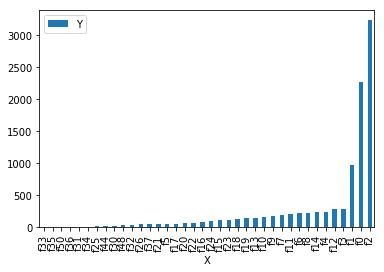

In [193]:
plt.figure(figsize=(20,15))
fscores = pd.DataFrame({'X': list(model2.get_fscore().keys()), 'Y': list(model2.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

In [216]:
import warnings
from datetime import datetime
from functools import partial
from pprint import pprint as pp
from tqdm import tqdm, tqdm_notebook

In [218]:
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [225]:
pd.set_option('display.expand_frame_repr', False)

###############################################
# Declare Global Variables
###############################################
CROSS_VALIDATION_PARAMS = dict(n_splits=5, shuffle=True, random_state=32)
XGBOOST_REGRESSOR_PARAMS = dict(
    learning_rate=0.2, n_estimators=200, subsample=0.8, colsample_bytree=0.8, 
    max_depth=10, n_jobs=-1
)

BAYESIAN_OPTIMIZATION_MAXIMIZE_PARAMS = dict(
    init_points=1,  # init_points=20,
    n_iter=2,  # n_iter=60,
    acq='poi', xi=0.0
)
BAYESIAN_OPTIMIZATION_BOUNDARIES = dict(
    max_depth=(5, 12.99),
    gamma=(0.01, 5),
    min_child_weight=(0, 6),
    scale_pos_weight=(1.2, 5),
    reg_alpha=(4.0, 10.0),
    reg_lambda=(1.0, 10.0),
    max_delta_step=(0, 5),
    subsample=(0.5, 1.0),
    colsample_bytree=(0.3, 1.0),
    learning_rate=(0.0, 1.0)
)
BAYESIAN_OPTIMIZATION_INITIAL_SEARCH_POINTS = dict(
    max_depth=[5, 10],
    gamma=[0.1511, 3.8463],
    min_child_weight=[2.4073, 4.9954],
    scale_pos_weight=[2.2281, 4.0345],
    reg_alpha=[8.0702, 9.0573],
    reg_lambda=[2.0126, 3.5934],
    max_delta_step=[1, 2],
    subsample=[0.8, 0.8234],
    colsample_bytree=[0.8, 0.7903],
    learning_rate=[0.2, 0.1]
)

#reserve_features = ['rs1_x', 'rs1_y', 'rs2_x', 'rs2_y', 'rv1_x', 'rv1_y', 'rv2_x', 'rv2_y','total_reserve_dt_diff_mean', 'total_reserve_mean', 'total_reserve_sum']

BASE_ESTIMATOR = partial(XGBRegressor)
# train_df

In [229]:
BAYESIAN_OPTIMIZATION_INITIAL_SEARCH_POINTS

{'max_depth': [5, 10],
 'gamma': [0.1511, 3.8463],
 'min_child_weight': [2.4073, 4.9954],
 'scale_pos_weight': [2.2281, 4.0345],
 'reg_alpha': [8.0702, 9.0573],
 'reg_lambda': [2.0126, 3.5934],
 'max_delta_step': [1, 2],
 'subsample': [0.8, 0.8234],
 'colsample_bytree': [0.8, 0.7903],
 'learning_rate': [0.2, 0.1]}

In [232]:
train_df = train
target = train['Upvotes']

In [233]:
def search_node(**kwargs):
    # global train_df, test_df, train_input, oof, test_predictions, best_round, target
    global train_df, target

    ###############################################
    # Unify Parameters
    ###############################################
    received_params = dict(dict(
        n_estimators=200,
    ), **{_k: _v if _k not in ('max_depth') else int(_v) for _k, _v in kwargs.items()})
    
    current_params = dict(XGBOOST_REGRESSOR_PARAMS, **received_params)

    ###############################################
    # Initialize Folds and Result Placeholders
    ###############################################
    folds = KFold(**CROSS_VALIDATION_PARAMS)
    evaluation = np.zeros((current_params['n_estimators'], CROSS_VALIDATION_PARAMS['n_splits']))
    oof_predictions = np.empty(len(train_df))
    np.random.seed(32)

    progress_bar = tqdm_notebook(
        enumerate(folds.split(target, target)), 
        total=CROSS_VALIDATION_PARAMS['n_splits'], 
        leave=False
    )
    
    ###############################################
    # Begin Cross-Validation
    ###############################################
    for fold, (train_index, validation_index) in progress_bar:
        train_input, validation_input = train_df.iloc[train_index], train_df.iloc[validation_index]
        train_target, validation_target = target.iloc[train_index], target.iloc[validation_index]

        ###############################################
        # Initialize and Fit Model With Current Parameters
        ###############################################
        model = BASE_ESTIMATOR(**current_params)
        eval_set = [(train_input, train_target), (validation_input, validation_target)]
        model.fit(train_input, train_target, eval_set=eval_set, verbose=False)

        ###############################################
        # Find Best Round for Validation Set
        ###############################################
        evaluation[:, fold] = model.evals_result_["validation_1"]['rmse']
        best_round = np.argsort(evaluation[:, fold])[0]

        progress_bar.set_description('Fold #{}:   {:.5f}'.format(
            fold, evaluation[:, fold][best_round]
        ), refresh=True)

    ###############################################
    # Compute Mean and Standard Deviation of RMSLE
    ###############################################
    mean_eval, std_eval = np.mean(evaluation, axis=1), np.std(evaluation, axis=1)
    best_round = np.argsort(mean_eval)[0]
    search_value = mean_eval[best_round]

    ###############################################
    # Update Best Score and Return Negative Value
    # In order to minimize error, instead of maximizing accuracy
    ###############################################
    print(' Stopped After {} Epochs... Validation RMSLE: {:.6f} +- {:.6f}'.format(
        best_round, search_value, std_eval[best_round]
    ))

    return -search_value

In [234]:
bayes_opt = BayesianOptimization(search_node, BAYESIAN_OPTIMIZATION_BOUNDARIES)

In [235]:
bayes_opt.suggest(BAYESIAN_OPTIMIZATION_INITIAL_SEARCH_POINTS)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    bayes_opt.maximize(**BAYESIAN_OPTIMIZATION_MAXIMIZE_PARAMS)

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------


 Stopped After 199 Epochs... Validation RMSLE: 3552.293750 +- 611.626897
|  1        | -3.552e+0 |  0.9406   |  0.5108   |  0.9499   |  0.2141   |  12.61    |  5.914    |  6.926    |  8.687    |  3.217    |  0.6894   |


 Stopped After 199 Epochs... Validation RMSLE: 3500.650635 +- 618.826632
|  2        | -3.501e+0 |  0.7659   |  4.393    |  0.8164   |  4.554    |  7.524    |  5.674    |  9.0      |  4.322    |  1.768    |  0.6246   |


 Stopped After 199 Epochs... Validation RMSLE: 3529.863086 +- 614.802149
|  3        | -3.53e+03 |  0.7353   |  4.97     |  0.3218   |  4.954    |  7.151    |  5.666    |  8.826    |  4.477    |  2.113    |  0.7246   |


In [ ]:
sub = pd.DataFrame({'ID':X2_ID,'Upvotes':y_pred_tes})
sub.to_csv('data/sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)